In [159]:

import numpy as np
from scipy.special import expit as S

#  neural network class definition

class neuralNetwork:
    
    #initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, leaningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = leaningrate
        self.wih = np.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        #activation_function is sigmoid function
        self.activation_function = lambda x : S(x)
        pass
    
    #train the neural network
    def train(self, inputs, targets):
        
#         print(inputs.shape)
        hidden_inputs = np.dot(self.wih,inputs)
        hidden_outputs = S(hidden_inputs)
        final_inputs = np.dot(self.who,hidden_outputs)
        final_outputs = S(final_inputs)
        
        #calculate the errors
        output_errors = targets - final_outputs
        print(np.sum(output_errors))
        hidden_errors = np.dot(self.who.T,output_errors)
        
#         print(targets.shape)
#         print(output_errors.shape)
#         print(final_outputs.shape)
        
        #update the weight
        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputs):
#         print(inputs)
        hidden_inputs = np.dot(self.wih,inputs)
        hidden_outputs = S(hidden_inputs)
        final_inputs = np.dot(self.who,hidden_outputs)
        final_outputs = S(final_inputs)
        return final_outputs
    
    

In [155]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

In [160]:

import matplotlib.pyplot as plt
from keras.utils import to_categorical



#number of input, hidden, ans output nodes
input_nodes = 28*28
hidden_nodes = 128
output_nodes = 10

#leaning rate 
learning_rate = 0.1

mnist_network = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

target = to_categorical(y_train)


for i in range(0,x_train.shape[0]):
    mnist_network.train(x_train[i].reshape(28*28,1),target[i].reshape(10,1))
    
print('train_ok')


-4.327335953125182
-3.1282565787266465
-2.785144153864573
-2.2249904022497615
-1.706039415947661
-1.3408346336196346
-1.3712017208433778
-0.7163163186597832
-1.2072326269635278
-0.8831190178667758
-0.5727507049632425
-0.9929956206430002
-0.46188725198115527
-0.46734129328480795
-0.732071878251136
-0.3694113075791446
-0.41146665985014597
-0.14290515343955085
-0.5094573331653764
-0.25163904134626547
-0.1553568993874967
0.033994399029031425
-0.27561516147228693
-0.2864369695187161
-0.20714926465751657
0.036116997021041486
-0.4561055857016598
0.17061585661398657
0.025311922741479073
-0.32204769695147134
-0.22293885964402443
0.05288319149378623
-0.2548554884714154
-0.05707393404683225
0.15633062947163065
-0.23042143308636565
0.13722268182176017
0.15544391161923612
-0.15157427697313872
0.018299233533955683
-0.270787432083301
0.045456608408157434
-0.29122012340226705
-0.09013855944026583
-0.1821975359550162
-0.018343460255909272
-0.08724632684215233
-0.04543032786082116
-0.16696522318084572
0

0.14495082027012324
-0.49076269976912285
-0.06372513238826077
-0.15793792245412874
-0.19420033437748624
-0.34567538417075194
-0.39385833264010917
-0.06830623466432045
-0.36533391948110944
-0.09905464536369195
-0.2978139750708764
-0.07552947301855484
-0.4724331174959583
-0.537238248441678
-0.1614153504406347
-0.35125272158063775
-0.2564812990121571
-0.3587748854134085
-0.023971255794323867
0.2842570291084142
0.04018427745508668
-0.08474776936913547
-0.3307809903930776
0.03912323094160308
-0.3863971223724072
-0.24014015406105002
-0.36528116314872044
-0.4983502982536266
0.01260444312417959
-0.5382343337045932
0.04528053143567981
-0.17188414400401925
-0.13901759784140572
-0.32726590110449116
-0.15098207763193353
-0.4107199253324203
-0.18117549334953387
-0.3219823664364172
-0.2169052670322108
-0.1919063675338157
-0.2709191327387472
-0.17317243612753053
-0.2803931374052411
-0.06123767502551835
-0.5535008072358237
0.21371061492155707
-0.28963415261695713
-0.4029380119470205
-0.398764487038552

-0.26860924784670837
-0.26285842318674524
-0.12475754688393359
0.10494120575363189
0.3658446723391087
-0.36674333620269306
-0.15877510339481887
-0.12225059958300918
-0.3019575099489314
-0.2580223992324261
0.00422453824877312
-0.25150460505460615
-0.0404566493324502
-0.10030085595310767
0.02734538688424773
0.08793608266301953
-0.2036720122570024
-0.19404681617469863
-0.4035696455115193
-0.23885302435305394
0.20588116036873727
0.14244451632426602
-0.526923810785594
-0.015398511950990956
-0.39768745696164487
-0.1585986028095221
-0.6662228117997601
-0.04694541344617212
-0.006615285615298408
-0.6030510088079536
-0.29856341016939814
0.06580376137601555
-0.12390605394129672
0.06617532591192055
-0.2630794578475514
-0.43688393004453474
-0.18748299830371384
0.12348211161814002
-0.21547712259025614
-0.1590694429758681
0.1909651411559533
-0.2575853266756285
-0.26500509593404936
0.29122652701230606
-0.16475909481565287
-0.024077344856222982
0.4024123193690747
-0.45311936003811504
-0.066277914274523

0.07007158273262215
-0.21313180146590283
-0.20736295345554792
-0.13704824167566224
0.22489062845108687
-0.18593637201737057
-0.17662925048736258
-0.17939806470735137
-0.09308202349310413
-0.21886516265112907
-0.1440266297922798
0.14512884159136988
-0.4205705906834914
0.5058349110056828
-0.2734311369038905
-0.1723854136466172
0.5465774471049688
-0.38344028158472443
-0.1385159416830667
0.07653278145048356
0.265113930497328
-0.03420065150681857
-0.2582537962288543
-0.20370563462704586
0.05534131530714764
-0.24094900732500285
-0.4317568820915815
-0.2901944608310357
-0.22509710367303637
-0.14534303206669458
-0.18800277815325253
-0.09606420027766761
-0.40030264654996106
-0.0619627725610286
-0.28346561822238747
-0.26367895436147626
0.28937480030439067
-0.29866228923739246
0.23887544600200006
-0.3359147162934848
-0.40770347706977517
0.4080809007320201
0.22298419550629844
-0.4978377809761265
-0.15900888274222588
-0.23418838245804008
-0.3849444769162182
-0.11364057159315835
-0.3408679291938462
-

-0.15957634607125584
-0.24532777332924546
-0.2554805913856871
-0.11166221267867012
0.4228421521250736
-0.18673823704044587
0.1111579626461423
-0.2036713791315643
0.09635771874730142
-0.33871487817756696
-0.1864946606856995
-0.18421420915474407
-0.1865018604642339
-0.056140153036931484
0.24310965692830064
-0.16586183221878725
0.4350643963855157
-0.15263855406013394
-0.18164052375077938
-0.4076834745134114
-0.4405995445396057
-0.2980061308652018
-0.05423399759015003
-0.22528752106732342
0.15991705900611072
-0.22493750005467397
-0.41123840093574393
-0.08228904463523092
0.21592153828794008
-0.31273663780798283
-0.18119611887864204
0.11671302185279836
-0.14657881601058834
-0.06006515875582624
-0.015859120848779926
-0.03160795923455165
-0.07418176146258885
-0.20094967884842832
-0.16405261543099825
-0.08896935757547031
-0.27827442293781546
-0.0983736594263773
0.0241300713254559
-0.14158318987444263
-0.11587095654383447
0.07056227240489235
-0.1282381594201931
0.24634604806996807
-0.11195279752

-0.16117573196415885
0.07824124772579075
-0.19401922865300533
-0.19712101701660328
-0.09388660570907206
-0.16905810477418395
0.3319288387338634
0.18228931345699
-0.20903435602212606
-0.07581392351574459
-0.20148734951969444
-0.4103805098611815
0.07295790069677403
-0.14663141573783608
-0.07596108750761904
-0.1925740223517102
0.09591518337541695
-0.22419445588272396
-0.10615677616089592
-0.09151842695286877
0.08649931239414219
-0.13351147423827497
-0.14038407941562178
-0.1444263713893152
-0.20174404981537464
-0.22888736298314735
-0.08337003652327324
-0.07266188007798276
-0.12674054994999664
-0.13643556951755847
-0.06661811621165696
0.09396040846090728
0.17871803369650785
-0.16832840073507735
-0.23516973809403827
-0.15887425898432095
-0.12525627275264709
-0.4432421223726145
-0.2624560978792075
0.03210255562348094
0.08120467359914985
-0.21860980318038356
-0.620621726477818
0.026064977336294134
-0.07671773558496955
-0.14270019781374915
-0.18232574514103914
-0.10243068903188612
-0.3165889718

-0.22330634785008524
-0.24003103488280242
-0.16650872715511017
-0.11602731039443807
-0.2848633278311421
-0.30980109211496354
0.28969090812752635
-0.11474183205768111
-0.11747795701111868
-0.04146856244912725
-0.0986956205668242
-0.1131291319022302
0.49522468836172073
-0.08421931952742795
-0.10251221496913702
-0.10998364130391489
0.10700120099623067
-0.24881421784726387
0.21855361576754173
-0.25180207229102647
0.16503173892150458
-0.16905827870491433
0.05840263648105116
-0.11605667066700731
-0.4466221232312228
-0.11985749665968336
0.14767193756043065
-0.11520371867964453
0.09208654771527648
-0.15670011275096596
-0.09039850898976354
-0.19523742751662565
0.24472242472315106
-0.11439880669631272
0.09336410303791826
-0.0623816181401588
-0.026172890628419352
0.3027810094055364
0.03997620627478137
-0.23683417524285474
-0.2033589205569098
-0.05366953021163012
-0.20827987536826628
-0.004449762893844515
-0.228469367776652
-0.1787831796218387
0.2567921028582274
-0.4634893442918045
0.2108263850483

-0.17448122917975306
-0.03311194636464432
-0.23384575186247222
-0.35817899393895086
-0.20970620844151852
-0.15941307096969673
-0.17779085468006867
-0.06248639450414876
-0.06207054824551707
-0.1336743095469147
-0.1968545681492829
0.08976565961520432
-0.14629109043355032
-0.13439068380347513
-0.09728514320066328
-0.12474411319879966
-0.09386009255198086
-0.3856710325956046
-0.19211810992597964
-0.26354967197534657
-0.07260568225495814
0.4929071688492226
-0.10465464588855981
-0.04728080910358878
-0.12491547456750648
-0.0841680954180054
-0.12394692176469604
0.029006467985457918
-0.07362903266142061
-0.010298821271892689
-0.18410168831327534
-0.0681929800579113
-0.49050019136426837
-0.06761868044119573
-0.08883583222755952
-0.057956960729748104
-0.0814017308842912
-0.16436725394324925
0.03195822704033098
-0.10051340172827067
-0.025937131619940233
0.09613363572346964
0.11261771685559113
0.21805896744083425
-0.017158739473703607
-0.21167528917171546
-0.08798317418270625
-0.2273084192726293
-0

-0.14623519609323524
-0.3905635603570188
-0.17328925299131184
-0.14892306203590414
-0.13141622143076864
-0.07642019064809769
-0.053822428070654224
-0.127986204918102
0.34198068920430247
-0.16900567709569975
-0.21140331949625354
-0.1695167422492535
-0.06812679085694656
-0.16415617838744548
-0.24774070269204068
-0.23041695709603147
-0.3611598319703925
-0.03184156992032877
-0.04966196941919765
-0.059516307773121016
-0.5799408979006326
-0.5924520751840834
-0.054053063495320505
0.13599742891796837
0.21632978603189618
-0.10393711617823055
-0.12190847338731302
0.05562431681522305
-0.031580067255174135
0.19118582312065413
-0.208957842974881
0.007175431913541137
-0.4933628292784691
-0.24763313250400368
-0.07488052676407375
-0.09300818544580612
-0.17538844248378913
-0.07966578873609434
-0.03311810602280991
-0.1437001382665098
-0.1521801641850202
0.09742881326736308
-0.06886866099147945
0.29725231489601617
-0.08138459115859459
-0.08182150614692155
-0.1332947182896786
-0.10312169469561003
-0.09941

-0.0400524900142615
0.012753516230241351
-0.06910553001239067
-0.04427101120492801
0.25660699617784744
0.008552637879497116
-0.10399063048325818
-0.12251347544757112
0.08355345770936273
-0.08515624927167181
-0.07996213545019748
-0.016118828536743207
-0.13323686356634445
0.2577621878365732
-0.07775567211004214
-0.11686380995007398
-0.0935078696164109
-0.22003709276269615
-0.07443428353596589
-0.10725835762776492
-0.045802292501344634
0.13699525402744236
-0.053487603619004856
-0.25765556031063847
-0.21184906460024394
-0.07178085057273291
-0.16639433248358002
-0.09816705764733136
-0.08116220689261693
0.09878147659247336
-0.18659726917172506
-0.18156592417536407
0.015787257811805996
-0.08353286439084541
-0.1726928149521941
-0.09525175587283859
-0.1124242323510225
-0.09505788141532628
-0.01630783867303659
-0.014550946190371323
-0.09389078108883292
-0.09264205878973703
-0.1280446618675231
0.00832434075532413
-0.2323583090595492
0.26647777955482377
-0.0687405036802643
-0.05245402578468385
-0.

-0.1109343476511725
-0.039697399493043316
-0.12842749174267326
-0.18603443467011008
-0.08129408582480846
0.004504020511071707
-0.06318247326555719
-0.052632443266843944
-0.12433158231431812
0.1293609432229468
-0.06831938411506794
-0.03622992756067629
-0.0578162299583775
0.06181575492825927
0.09975825713006908
-0.04142938565669066
-0.05777469005985885
0.0670989896644481
-0.06525572850958405
-0.019472954557073454
-0.09694251792443627
-0.09091306081035892
0.11889536332648917
-0.05026102738283078
0.39633369448621725
-0.2600852992513217
-0.09891802802882492
-0.1178676949084889
0.07461174309420435
0.43993140508242023
0.11994891421631829
-0.06287156900926037
-0.21877843036724498
-0.6055267144141396
-0.21175481223633252
-0.26736267231251304
-0.11695837150027513
0.025771692660114552
-0.1707857269172155
-0.07617886882538043
-0.04898485085029872
-0.24023467101121718
0.21626072221954354
-0.05737109579791395
0.0448886488053144
0.25776278981897127
-0.1997945526115728
-0.2976153530093364
-0.025143774

0.20020876690602463
-0.07049848269414997
-0.07622131528323084
-0.17315567383695812
-0.06422613823680028
-0.07780107992060495
-0.01760654235823165
-0.10500506120117674
0.004568424447742508
-0.03764179789583336
0.05586109407480333
-0.036289948601242406
-0.07082832114471838
-0.1403807480546835
-0.047149449535417484
-0.025164136200887047
-0.07464513896582338
0.07856050974484677
-0.06940545032345193
0.27546401483388916
-0.047840319811087266
-0.05138062833214756
0.09701393304649573
-0.07159785795594656
0.3748814871709671
-0.10525806919717867
-0.03799016284631698
-0.3233455981648444
-0.49447550734255724
-0.03658059006533179
-0.08011301680584301
-0.0955645304522113
-0.2128369643102781
-0.036886494219306336
0.4159178455225732
0.01745624416902836
-0.1014805855209398
-0.4255728052857592
-0.08443951647573184
0.17729034595418489
-0.05448509259325093
0.4316009928556026
-0.05090272906582376
-0.039809232119843975
-0.12944968016961966
-0.07013805852282876
0.12620768387757972
-0.20298754898974988
-0.098

-0.038457901508081246
0.13770340645418652
-0.7307074657829424
0.09546763135066849
-0.005896344739995494
-0.46431392024037
-0.029238888679552787
0.15151267857945463
-0.07180540684485755
-0.08471204569605809
-0.0017823139552619605
-0.05998682441496269
0.33277928424271275
-0.06558097107919807
0.2572856657142892
0.04836420371479349
0.3777165436715891
0.04194393604301572
-0.08312356879945021
-0.04966090068271785
-0.1352905413817555
-0.07683171820240035
-0.128727127652543
0.3252091129958983
-0.07889998969026345
-0.0630355872986374
-0.04330427037150676
-0.20719967038833154
-0.37825254874385955
-0.28938462822712535
-0.09366818446091131
-0.04818509480174314
-0.047834390064617864
-0.05178219542490254
-0.044138939318295746
-0.0007181970355449106
-0.011916694484322362
0.12965701395463242
-0.01769269460871803
-0.1170439041984075
-0.07169425523568843
-0.12734410823253683
-0.18747949493955926
-0.09595053965134565
-0.07597538956503283
-0.0956402902693335
-0.0636193246915176
-0.01666276475346651
-0.063

-0.1042628615636439
-0.11375678310467746
0.16673326744633835
-0.06164263516722829
0.3341483744232302
-0.08186362854745421
-0.24705587716647517
-0.09310462893670186
0.2607116058011355
0.09222364308118279
0.6686525655824178
-0.039083462112653865
0.34414653520044713
-0.02704104054065689
-0.0429554588958539
-0.08347794991659867
-0.40272067684205315
0.14789784083124516
-0.17888219385657456
-0.017428865315024626
-0.10090390672175073
0.08615918842859743
-0.10178857961993269
-0.03430103875075215
-0.2511957210004023
-0.03125846015647572
0.00030401155811033906
-0.06927862045247467
-0.04482956539609671
-0.2005998969800193
0.0856751539335082
0.02405200744709922
-0.12196782967385886
0.23789103309828377
-0.09811466016460493
-0.00800350276244358
0.2983674485186216
-0.06047602433376008
0.1260631506251387
-0.09617804971924582
-0.13633361142325875
-0.11603501188386532
0.40786410406241735
-0.051355981076279804
-0.3516476140652265
-0.04537675206240407
-0.11287141356295372
-0.10598171582468313
-0.029053437

0.06468393755719576
-0.04845163404294031
-0.20867146549563698
0.01602385171950173
0.49986193573680526
-0.09697349319614257
-0.0840993926657295
-0.1264493128786962
-0.10069849830206094
-0.06536543425777988
-0.09986971341681357
0.005130098552928242
-0.09633087502646741
-0.3595095293297516
0.5931407695913644
-0.16917560678474503
-0.1902001318950725
0.06698614916061886
-0.4212346139646109
0.2569385168731206
-0.0493761364282848
-0.006654441459725935
0.449948921360756
-0.09400761689727069
-0.11764451990299951
-0.14781118532106394
-0.24906925190737364
-0.04447373560660936
0.3723835395894391
0.01817828857063153
-0.4897409398423797
-0.28643030221448457
-0.02359416992877563
0.000196494137110572
-0.059288479909405056
-0.14682722010918955
-0.356978745111926
0.04237558002122195
-0.14449161486095213
-0.006166920035098349
-0.1333665277298425
-0.0007967615917741974
-0.5300098943082875
0.22553075538545853
-0.06481829726776735
0.016880009455369605
-0.01034876389481291
-0.4237973345993704
-0.094480832857

-0.08238584596816419
-0.0695368409406055
-0.02318287891225121
-0.0795268064081238
-0.08072311264979308
0.031670799138379946
-0.00029409623841652327
-0.12404470875200266
-0.07735302527527926
-0.09765557654912917
0.7466466515715526
-0.041457676567800576
-0.13121414259568126
-0.04906929904667652
-0.18872071394195297
-0.05852609583484217
0.3599524415592594
0.11583439203151963
-0.0293858651699879
-0.1471191321188027
-0.41797558000771967
-0.05180426770343348
-0.02465983603048119
-0.06761674041298714
0.15971649131506196
-0.3731277831495763
-0.06525025000479667
-0.08527209579700101
-0.03297077646494961
-0.11454489503997307
0.37767155669786573
-0.16175103931113669
-0.4094552663254196
-0.05954226729441045
-0.07073467826124517
-0.024253031954772124
-0.15860001402343918
-0.12479493747903753
-0.0931859883422682
0.12244543291770796
-0.1661441614722009
0.03276759828564544
-0.0649458981106508
-0.047831039643884514
-0.4097298001255937
-0.15278050257795212
-0.015796434811560088
-0.10390786073243809
-0.0

0.2148469474975726
-0.012944801424101702
0.08149394802766198
-0.13072496331174083
0.021000539383943598
0.33046638900076103
-0.06703217426159688
-0.017924584024528345
0.29372846112776324
0.7709031720715576
-0.14674680281032396
0.2322735518245311
-0.30633350129249387
-0.12215609613567778
-0.0714339183567477
-0.039836473268304744
-0.02797083987126864
-0.16724763624083988
0.39853762590203756
-0.08500969060027323
-0.10660987757482157
-0.23341182368218338
-0.03708760427543909
-0.08522859497634286
-0.023209745164847355
-0.062473065007164166
-0.05434564927747088
-0.025199393935169578
-0.04908458912565776
0.26649468785609
-0.09650062525444277
0.011953838389961474
-0.09044636229529009
-0.08558822693296046
-0.05733037105178837
-0.039163114506413854
-0.020284130888123676
-0.054450676874402526
-0.01879231215482093
0.28284095442907503
-0.19380934628259633
-0.0541921759451279
-0.06017806090677597
-0.1323768855581676
-0.07781206733800602
-0.025028039824223778
-0.08406599133049437
-0.03878117979619337


-0.08685640416200921
-0.09856991523454253
-0.0830490090210009
0.30671802346464566
-0.1314493940143036
-0.12249062829039756
-0.05191356667609999
-0.361424102206638
0.08355334441925835
-0.08577206035250168
-0.15169812704822253
0.3818357443937481
-0.1385415426808706
-0.49462103543182423
0.1407237243981575
-0.05331714770294223
-0.1981133174184855
-0.11294023618618274
0.14264200412113892
-0.044284571297942305
-0.4387876890931902
-0.30074828848843893
0.28415413908249254
-0.16236583277382607
-0.26891826249605033
-0.15320803058137675
0.23359047106422107
-0.08556886081817514
0.007469128573292738
-0.06026163525394433
0.5158055549349705
-0.12230439233843167
-0.06214090700515675
-0.08020831348869231
-0.0387909860286955
-0.05761636224926046
-0.04445017495584303
0.7140466364593886
-0.23616614528801444
-0.029643970746602823
-0.018446127994990666
-0.03486914995293613
-0.08135445628562955
0.1382421014127834
0.25769902187757615
-0.026693431743708286
-0.2555368275658577
-0.08534085765505861
0.16299028816

-0.42237258637719244
0.10419893478061718
-0.0545856635988138
-0.020191983778313057
-0.009881360285768265
0.11270549354652801
-0.07026530653232019
0.48158786554641664
-0.041698966861221196
-0.013853024995410957
-0.0461115851966163
-0.033376912192906436
-0.030283921220792043
0.22620145463059083
-0.025450310092674403
-0.588939600433274
-0.025282950813920648
-0.03432600886899646
-0.16981336193183708
0.08931070408659235
-0.028931015013892083
0.0359635471972525
-0.023221772148510844
-0.021740411234294696
-0.059403441471340156
-0.09620416718638532
0.06457267407753975
-0.043896106925387736
-0.12552914895182454
-0.0898536782484297
-0.016029169743512685
0.24346765672861292
-0.03170825157114965
-0.027622247021360933
-0.10349177265681678
-0.07006064359918796
-0.03959910464912392
-0.026795205803058456
-0.09034669763356845
0.1322321086118406
-0.04432363381986267
0.1000634688352239
-0.050029566401709524
-0.02663460680360288
0.09166981446473244
-0.023261951997489472
-0.05989213190549164
0.062941265163

0.2605193903311643
0.18780654148525194
-0.0537102679745529
0.14546988752946102
-0.05512234142729698
-0.05747245519158195
0.17775093157232807
-0.04366188816727328
-0.02696205608343325
-0.04063490646401183
-0.06541987248355495
-0.36529821360334
-0.09889722148156993
-0.03452150058683573
-0.09786576358483114
-0.049355315251073464
0.12179707460040884
-0.17920929760802326
-0.04168749923286665
-0.09695425012802622
0.5217655538169257
-0.09806000746011005
-0.020526975088824766
-0.04370469014041804
-0.04452704502443389
-0.24984677472628952
0.09115042542923035
-0.009847435357118869
0.29060715231775824
0.07577502037289288
-0.01858647799186309
0.17260043657085375
-0.29735311141961407
-0.11710647053583745
0.16143230516063334
-0.06239357318485484
-0.01912298244320164
-0.025471356283468236
-0.015084066249498797
-0.1273446098517621
0.2182279980252566
0.2899969899032872
0.6100257790883478
-0.08137587060188983
-0.05320795169118226
-0.030308372225340177
0.15771852357342658
0.12813713656769773
-0.065387259

0.03623824061531715
-0.03574739269176192
-0.043887024591931056
-0.0955957858876989
-0.023874874330804267
-0.051441609458587355
-0.08428529241679845
0.013503531014403197
-0.014741453222507568
-0.023117991735651468
-0.01934948303329256
0.8436646354684927
-0.07283682530437172
0.050607590723863234
-0.008849764273274986
-0.11160285066159492
-0.09569885326438073
-0.04587746760471318
-0.0086191444471574
0.337671245676145
-0.027905089706490846
-0.04130757798542037
-0.06327279592192663
-0.04435307699526464
-0.09810398242420804
0.2714483640781006
-0.041836150251331604
0.379621056603873
-0.04172206929951719
-0.06438986957891413
-0.015103628180215472
-0.23800489475104378
-0.0601429191217057
-0.026069770924143733
-0.049368503287248455
-0.06349070917942028
-0.2395047765137508
-0.09023425342273123
-0.35462389240896075
-0.27160003345157385
-0.054649815194284426
-0.03675338077445588
-0.0297286635013477
0.03198489147662874
-0.028683989563780387
0.33674152178365707
-0.1294848803955003
-0.0632100415920787

-0.04743188783770231
-0.0716610223654967
-0.03719733089825256
-0.1234927225267691
-0.025709438797348397
-0.023181991726794988
-0.04560937081414284
0.39874450729140315
-0.04954744293361705
0.18425337563468702
-0.04096359646560711
0.04274808785110007
-0.08927346329934187
-0.06101752756159737
-0.04285260540136056
-0.029295925024804128
-0.000773579700456023
-0.09831917882176891
-0.15265845014875515
-0.08221336996004058
-0.0709465365047579
0.1784369120766294
-0.024954835163428522
-0.13227866879247868
-0.0670180479692442
-0.13633771873435205
-0.03481767700734534
-0.04694859305686312
-0.24281225182657967
0.10153549776843203
-0.2686819038732785
0.1507508024033392
-0.04891945079752699
-0.27952713611419067
0.3011317888385227
-0.036458142154803364
-0.03478880743276239
-0.0701732590334112
-0.16623637554462586
0.14493233723016843
-0.07465502208854036
0.09545765134281942
-0.11661634858883438
0.7345658207417206
-0.08325904465448358
-0.10664265677079927
-0.1613776904543528
0.022893391962117926
-0.0320

-0.024302152521143077
-0.16026038181284555
0.17716584012141484
-0.03600548193562057
-0.0605595825343793
-0.018983032223512178
-0.005829923384616991
-0.1454850911243141
-0.04578987717921653
-0.10910392755098158
-0.21803347227273487
-0.03957485045850613
0.05065677106380297
-0.12858526057494626
-0.12196159931108597
-0.025230039997925956
0.2538312310442418
-0.12054056235886969
-0.11307661688905551
-0.027048670195028972
0.05653440782927575
0.014641209330500428
-0.0688551942724682
-0.045201630641861626
-0.02499406689186023
-0.18342713897778806
-0.06515746355525737
-0.01824833746552881
-0.0534809154566234
-0.02966807054494695
-0.015003172357119616
0.03063068850669986
-0.16388255234157478
-0.042508335659156876
-0.06870257751913862
0.058025034266131724
-0.02846571523833985
-0.32731413803903026
-0.2925696437736789
-0.02094391012051307
-0.011373025477644865
-0.055211744235827566
0.04324471539521432
-0.02475084332037472
0.29786356387140767
-0.029147651003461863
-0.018027197646973782
-0.06112079423

-0.04780074528963174
-0.20475159590067005
-0.02855917970288413
-0.0442379452410106
-0.02687256058944676
-0.12924203520035057
-0.03830366602525215
0.06977019086342659
0.2641120280438957
-0.06176721867512373
-0.04914755507475392
0.04514682548431226
-0.1746536501284904
0.012423994852102922
-0.04468099486505396
-0.04470767391508935
-0.04564968767029903
-0.05682244273537656
-0.07251424364252836
0.00543653311400949
0.8950093339968379
-0.018519629354582345
-0.1095525552737151
-0.06901055818843202
-0.026499814265120197
-0.07844625118221742
-0.07812486853332842
-0.1197247097065881
-0.022650456090390788
-0.0020531482720245334
-0.23053431589086326
-0.021969128627222313
0.06441995474192005
-0.02567476744498478
0.008386021049396439
-0.1123226766022741
-0.07160086121283826
-0.02637265199546633
-0.0917262177716559
-0.03222876492092168
0.4553990429055994
-0.07348083190885833
-0.06325623480669912
-0.04921766199699981
0.5944371195744352
-0.45605924225955935
-0.03869662123393863
-0.2100160675941652
-0.01

-0.02561998404527165
0.017106761030899604
0.0005184938287934195
0.49951462046174505
0.56918170996724
-0.03432700666676858
0.019282936568045386
0.01757750822832387
0.048617991319612905
0.01582153032573034
-0.0110069109884003
-0.08272513175748732
-0.11052136203330316
-0.14921508257647254
0.47028148534130776
0.19877146402295012
-0.05594158970654817
-0.03179490965787421
-0.022787956969020015
-0.06288460890913966
-0.13066430375123322
0.6066046061258892
-0.033652474832523614
0.06262083889435553
-0.06372501421429946
-0.10355738102922123
-0.04519601230143695
-0.24734720759210338
0.09873962322118979
-0.14625592819254377
-0.435972773709868
0.41211212702642874
-0.07138831196677828
-0.1872750362054432
-0.11001265591107909
-0.09143655926276234
0.19264115010219163
0.07028477749524198
-0.01928113155145533
-0.07368176336285133
-0.21877403955193656
-0.07507931871952794
-0.33363982093933764
-0.033014258788360874
-0.027847487460920237
-0.03332880370341736
-0.059122940786827456
-0.03896756463326467
-0.101

0.25484999757345517
-0.034045630949956024
-0.2599079443723095
-0.0380904851672437
-0.34658992876122313
0.23350790269596697
-0.16890603693943138
0.14306117282807407
-0.03660942093550897
0.44014751306415667
0.3549622429831306
-0.019845074779218336
-0.08141148166927473
-0.14101511646880918
-0.12665067298425334
-0.09863386595328878
0.17526024520418537
-0.042799642855461444
-0.11181140720182972
-0.03464805154707009
-0.20518449619105725
0.15678759835351386
-0.046490868159691195
-0.10589382246379755
0.2981949516696533
-0.056918699778563106
-0.12643458278801317
-0.02461552709713768
0.7154566283920196
-0.26012733333939797
-0.030933548056503533
0.39947033435637586
-0.04302989421465157
-0.025938467095800107
-0.05836939899282167
-0.025437129423865314
0.17226600238993028
-0.05832929117710579
0.04255456447364067
-0.05916398519853254
-0.19109352406892272
-0.0609987445090118
-0.08845533723129641
-0.037912872474201595
-0.15549988226367004
-0.1300834872725859
-0.060712145401080275
-0.05499306100583786
0

0.1422829482774341
-0.06605518385817767
-0.46036066792412256
-0.23023465251461225
0.00404064558410484
-0.0573227474867919
-0.007251028067101385
-0.05148127508968609
0.4752783584996487
-0.006153352167667731
0.09592602087826949
-0.13801039852238575
-0.13403434679168597
-0.05109575665465513
-0.04999000025322016
-0.052126774731653204
-0.05312543367490494
-0.06782164120090362
-0.1763260357195368
-0.1182651631255777
0.6756540379868333
-0.05217435509080921
-0.02822937701205604
-0.14637744998874508
-0.03853407828049474
0.017121740226470908
0.12303402632793206
-0.1361678279347272
-0.2777044445674714
-0.08803663102918376
-0.07226510262795949
-0.020695860130821017
0.45312728537266217
-0.06734739655272692
-0.23792783296477737
-0.3468051570270646
-0.018758477002822915
-0.05997013179076943
-0.22519013651660827
0.22389694582173392
0.24922336044272325
-0.02058177163921741
0.03282750989683736
-0.04596248195343548
-0.0707693846400925
-0.0418815706828468
-0.25955906795543016
0.40852488319864294
0.2641340

-0.030246360178378298
0.039074678448167394
-0.003790155138488153
0.14276331931889003
-0.04218653463493155
-0.017853541206549497
-0.07230917555479138
0.14325633202921875
-0.04289113336613597
-0.09978758617235531
-0.04922070820354197
0.1668017392552751
-0.021857388049512986
0.26831856988892516
-0.02906220111421908
-0.06704256546586554
-0.04956405276414299
0.028485651358675215
0.0638249377443603
-0.12202671117672141
-0.026367869387083038
-0.15522407846857955
-0.19486063235831505
0.02216941761037056
-0.0592468948364601
-0.11597067633220352
-0.12774965856595827
-0.35959721608110784
-0.028342455876624602
-0.06770023517760655
-0.661837703314176
-0.055792864774251515
-0.011242962490731145
-0.1719959598923858
-0.06130669456489752
-0.14278437226966267
-0.07776213554551414
-0.02282966276825099
-0.015462477377323702
-0.026215261542819234
-0.08151764741174362
-0.061915904375709555
-0.15679651282967022
-0.058012128799187095
-0.0226513261267631
-0.11081567698166284
-0.03962381506315201
-0.02795362435

-0.041783816260033635
-0.19771602336479993
-0.10106600023397894
-0.014881271444329833
-0.04054232775092532
-0.0331103036013858
0.032614038609340784
-0.07124722320889093
-0.10453822744376061
-0.18203529262071347
0.36952093315279533
-0.7124669301894114
0.08955663033067177
-0.023270218526515972
-0.21287514023714565
0.0025137171644510903
-0.037581290863925004
-0.0412324954600342
-0.03233838114035907
-0.09034279218664187
0.3318509912674152
-0.16451572514139137
0.6210019926829982
-0.03283501873969401
-0.04167120038294492
-0.13547902923748373
-0.06024739713930405
-0.2855219459423648
-0.0710275369335145
-0.02251432174285298
0.17729974149608352
0.03300141008501559
-0.04217386115594187
-0.02861516556572804
-0.04696869012986275
-0.07174851462625392
-0.06577855437832013
0.09066941098106063
0.12420463474148877
-0.06527151595903002
-0.06393784883297433
-0.09640405028923077
-0.25902152576170756
-0.05725728664794383
-0.1400308180434522
-0.08455175329923835
-0.046878301786709195
-0.2589967622590136
0.0

-0.0029423531529778864
-0.023774596262801935
0.13129313211829496
-0.01903207717863496
0.2921807707242518
-0.0466507389166205
-0.08093127819536411
0.6475165262358904
-0.025299096731057312
-0.026362399086566367
0.4337942828342516
-0.017189267264483006
0.7603671512431042
-0.15754205196115056
-0.03628272653357798
-0.08329569858698886
-0.08429946997680818
0.09923334114022474
-0.02931690742839486
-0.045729495458432065
-0.08656384782002895
-0.02696493148719906
0.015807268137210746
0.3421420602095179
0.027407623489764082
-0.2357677108791614
-0.026929345915134205
0.2176090029382836
0.2919612742609794
-0.007256555211469192
0.02749454748560068
0.551897202909014
0.3644490870357505
0.002295447013540501
-0.08810662808889007
-0.07351868849368143
0.03085717570248327
-0.39117395339498434
-0.07615593972309775
-0.15585995019936286
0.4431541975215343
-0.05904610153097759
-0.04728144618286975
-0.28453205151260436
0.08038551304197915
0.0378825096169037
-0.05820832427757147
-0.0884033339880154
-0.01473850876

0.05095337975097144
0.1931715545852474
-0.11462279569809727
0.24327236341456987
-0.04486932207472791
-0.021745867292159937
-0.1005854320709686
0.032947689490832294
-0.05669402942486056
-0.08269096597115168
-0.0318660652622137
-0.06665146617827356
-0.03467965422511446
0.047325349706939586
0.005926945629405337
-0.05972361805266605
0.09329101838100787
-0.058197129013475034
-0.1499222956744263
0.1650333256663379
-0.07009730114276519
-0.08242742510563976
-0.06415106079707507
-0.05232847442621462
-0.05545118893416409
-0.06306434111912768
-0.12372624457723981
0.06348723846554616
0.20751729179433825
-0.04772882403906836
0.24760064242614394
-0.22232039900647466
-0.11668560234322985
-0.013811804942985898
-0.06665852495826727
-0.05922693304818921
-0.048094003657562515
-0.07448114756676114
-0.06836462556447895
-0.014815694149995732
0.5237097032572252
-0.10731404847150255
-0.05037530506472138
0.6176035602160643
0.04167938290335818
-0.015954071430763783
0.05665273653512261
0.0014102194593130848
0.34

-0.02474545349342579
-0.022475813908791217
-0.02970396441793577
-0.0801348675079352
-0.03648610658762932
-0.013054569997545553
-0.08181954019799463
0.5116579795868135
0.4209416478147309
-0.06580773344194421
-0.17380375672496617
0.016523900577718877
-0.018692472100353293
-0.06507228870492784
-0.03761059257960326
0.22859356397439318
-0.02116403628139024
-0.07078933715723135
-0.0673428539929232
-0.021439842375822166
-0.06435260538240267
-0.08343771138059468
-0.01830948120512994
-0.026973411247603784
-0.05585892397395513
-0.10295711133343492
-0.035303789887362894
-0.04922411700687465
-0.00812272078300943
-0.03091141613595473
-0.14307416120565136
-0.027029631354342585
-0.04866430967172436
-0.17951515348178473
-0.016853112613844444
-0.17834398513070657
-0.026228868529555756
0.48401034193114006
-0.022783068876729765
0.43874804458079797
-0.09492364030267503
0.005858603227074767
-0.08218048037317933
-0.07956768622924407
-0.03973727574452333
0.07071916410565626
-0.02997134642959286
-0.0242933498

-0.0112740218735714
-0.021252046502409368
-0.03853382207310735
-0.029290508765209333
-0.12199726484351393
-0.01236379854570103
-0.2473845290474335
-0.1465902886514099
-0.05145799175167036
0.2392408524830543
-0.024003722841942837
-0.015024864216509603
0.04064749886340835
-0.2802142867854616
-0.16787724069841012
-0.016551716068291564
0.44008984694759773
-0.004796687328681645
-0.05840320994472467
0.05053504201013966
0.1088238023325567
0.3072197565014976
-0.08756879256595806
0.49971952386578217
-0.04439338246473824
-0.03308340394321514
-0.12479709290966896
-0.023283896882332157
0.054270491392914996
-0.015882582054826493
-0.07209565612640367
-0.05087861523877631
-0.19911509728553495
0.07729328099576599
0.17426797353951484
0.8704764252520134
-0.050361243884758086
-0.03751457699850028
0.19845964497159035
-0.09732466787777883
0.14727505181972878
-0.04275193346533104
-0.057913681133793735
0.31283629487760595
-0.002615213427582855
-0.0432545815206187
-0.11291600736596877
-0.5603442969247127
0.03

-0.045878011198385894
-0.08078380644180803
-0.0874345592202213
-0.032219501982187516
-0.023141794031746155
0.6801417245056749
-0.05472775599309016
-0.49677539095941203
-0.04557576471555766
-0.03384200573136345
-0.026196765068334956
-0.08532455850134912
-0.031765451501981165
-0.03606004397318766
-0.014185636120547313
-0.05983222757212714
0.016379346411302897
-0.11868423184342941
-0.031226556368035643
0.21475811434849723
-0.036066647375226156
0.16017739772728992
0.20621008863040907
-0.035866008937530815
-0.14805107531105827
0.04375076194794375
-0.0507700070510767
-0.1758159709375343
0.0381731164444782
0.0172997931160145
-0.02843679012349956
-0.055442840592284666
-0.034958918651909664
-0.1605914260137308
-0.11024846746399067
-0.19549606909466916
-0.05496007145313971
-0.03685194301026823
-0.029391792265088645
-0.00713451866199357
-0.051579012852664786
-0.08530756764523154
-0.03769005587302329
-0.04880967523275899
-0.09007403383976878
-0.03335462646664304
-0.029523773258946468
-0.0296565882

-0.03329546738448609
-0.11617460769246851
0.4045792715909431
-0.18691433024501106
-0.06747683468983492
-0.30573071706284227
-0.020303594716340658
-0.026576520565315058
0.317757514134859
-0.035753651054834704
0.08148747979218107
-0.040220395488427915
-0.23475915283821613
-0.027810591681613938
-0.1666875404341895
-0.13748864051293505
-0.021620124134752026
-0.030465709602341757
-0.05393284956067333
-0.03667783778935262
-0.16669847511620595
-0.007482431896326303
-0.061340435878292104
-0.1072507863921955
-0.06637661971268216
-0.02727986999055851
-0.21978533050890803
-0.31578674877878415
-0.018103532416761117
-0.23692061017300992
0.3168077663186807
-0.11340386253602631
0.1183772667034122
-0.0003310512388874989
-0.13424907550857995
-0.11170453456631058
-0.05191172379271122
-0.02675499862854055
-0.11883328705855481
-0.09727921636463896
-0.024741853510147866
0.01915931665587437
-0.0185783233902357
-0.06303956003346665
-0.04933986724046282
0.050375369849276874
-0.021782311788445204
-0.0198538155

-0.027928426925677277
-0.054726155908978905
-0.04658738945074142
-0.08824496532277629
-0.01962443373851745
-0.05022615409674383
0.20397711937179322
-0.07035386383991675
-0.16483356647712102
-0.015421572835954384
-0.10252512359749706
0.008564601439091636
-0.20423973746397633
0.13927245214172096
-0.09020046661691145
0.4148919170641403
-0.004578374450497129
-0.024710567394785075
-0.016073636793371378
-0.02030914408136596
-0.0402720805961514
-0.053495865533719156
-0.04565006147919351
-0.07202833744646298
-0.0446350299352537
-0.020333390863627836
-0.07807530692095399
-0.013713812527787582
-0.2874188899222358
0.12008953338059675
-0.014812883184736758
-0.0455915741277188
-0.08562948155197235
-0.031610016976503084
-0.011326126855805713
-0.06457867576971026
-0.08427033906406771
-0.08670875313412521
0.288668305533469
-0.02288671848972661
-0.040995801531401324
-0.02355809590579022
-0.010192795163543352
-0.05288213968554339
0.31711523673397096
-0.04879936883805551
-0.03722358557500027
-0.043417303

-0.04957102297480495
0.04760177936707659
-0.028612981848826165
-0.03204910987512329
0.19104030192613683
-0.43976051214560885
-0.13451221039862568
-0.06363044179184418
-0.0395277123554579
-0.051712994604792104
-0.08181865799270077
-0.016000250912262065
-0.08252548642264727
-0.26072463178297683
-0.045976514615782255
-0.048234328138295215
0.010645334274960542
-0.12435778878468667
-0.2079077713734393
-0.04032267263880119
-0.032205822357993574
-0.01800759625870626
-0.03961366963475332
-0.01385576100369576
-0.020746618870157864
0.291657209109164
-0.1981861557997886
-0.06552811356742425
-0.06911988281697633
-0.07390318233535702
-0.046043976046533194
-0.059811678107271636
-0.05795947581259599
0.2056356490730723
-0.17228216450075964
-0.17355131267534074
0.0382026792567996
-0.15787190997010545
-0.0022835100966782486
-0.15643427815143165
0.30654388896990786
-0.05903928853844277
0.3759527769347018
0.04000112742881335
-0.10300051913457871
-0.030092107519342496
-0.0782210226644783
0.2104131821904672

-0.013345336536298534
-0.06145343191964741
-0.0387259003376131
0.37811959326273004
-0.021039862080716995
-0.023070299776546385
-0.02149111298030522
-0.008749283399088571
-0.059592253103141306
-0.026763308868980575
-0.010971770500403936
-0.30408600377061384
0.03431047305861485
-0.03771910786611681
-0.052903219015554365
0.03902318816957197
-0.01827054401783682
-0.030425748553400342
-0.038391800043129365
-0.040944500706586034
-0.027936443879865915
-0.0389931619844731
-0.025746305612137598
-0.04223742474734676
0.016356259684195372
-0.015133422550664978
-0.040120698010792176
-0.023290209035270373
-0.05148431333486371
-0.03358496674072243
-0.058297636007327874
-0.015329762603646638
-0.011161901790318661
-0.031073259285442478
-0.015096191845876749
0.2816492577045621
0.0011846299806220935
-0.02024035462402064
-0.03227990959365952
-0.007549501429386091
-0.07377743765123088
-0.034386119339843604
-0.01084436928594379
-0.0315856355150019
-0.10980778248986026
-0.04592720074991241
-0.036952804767104

-0.046631410187993626
-0.3275486427044431
0.09722624092061627
-0.5696849616204283
0.6489602921429009
0.016225764273847032
-0.04782547716030738
-0.1820014663200224
-0.019088593689961353
-0.16627147818053825
-0.03050109117507155
-0.025839618144667634
-0.035105150751401554
-0.017287488494895635
-0.019664447708718558
-0.037133102498042275
-0.024649322619502746
0.32430581386068935
0.11099205979061962
0.04317647525022656
-0.12304929682091499
0.033470378216410204
-0.03414623163556095
-0.05707864648705663
-0.04800812082521737
-0.02381142038760999
-0.07612264996571588
-0.05670723962430308
-0.052118080080171776
0.015963619707609393
-0.060761386234943975
-0.49289091378528366
-0.032119468644560896
0.030456150342796137
-0.018486659082512066
-0.05602683725920281
-0.04129002792751591
0.38070881428597325
-0.017505962818823717
-0.04463455059604706
-0.11513933741820359
0.0006366492863136902
-0.050529813938453426
-0.028454628711415512
-0.05640514286706043
0.21223870698972547
-0.013086544644963486
0.04088

-0.06547997874488762
-0.052782737345210856
0.05685162076383307
0.14390766313658543
-0.0654517886556191
-0.04696749061137849
0.10183753981779738
-0.03765203904583775
-0.08165382641523328
-0.069693732211991
-0.05145539105598787
-0.039638695946673075
-0.012442553767479821
0.24345670151004625
-0.03698029855102148
0.373471873366114
-0.186429858861438
-0.04657286251166756
-0.05222604111491807
-0.07644229949401943
-0.046312131985041236
-0.05282566343219688
-0.015695823043127843
-0.41005111495484636
-0.18644384810976475
-0.08292624442520874
-0.09856143253439692
-0.045928225801852504
-0.26105956952008175
-0.06808957620709821
-0.0042698445996830064
-0.15751093990333231
-0.037668996271308826
-0.027873487219926482
-0.11427615433451117
-0.014195095872360019
-0.016356171433366148
0.08412115523008655
-0.07061232521812684
-0.03822148177411857
-0.07681934097743562
0.30839273252110544
-0.019693333811654504
-0.057602689189320794
-0.014655859829046694
-0.032913692222496876
-0.02606482125314077
0.046546145

-0.05122274054898569
-0.33549865798779793
-0.022530194959543653
-0.030403497622164787
-0.009509924353590573
-0.09789809941909786
-0.05873812691617481
-0.3116536998091959
-0.04270329436014954
-0.04050944504379199
-0.03113330785496441
-0.10615813635572481
-0.10824708040520747
-0.14027594652209507
-0.0460638619611093
0.15877565159107618
-0.09754918440310992
0.038615301171286726
-0.009270280574482911
-0.04241338867124363
-0.07175102771042668
0.0039238025494713336
0.7198709929245978
-0.6595421674126861
-0.02491818091195019
0.5066761768215209
-0.017660532066949917
-0.03962416984394372
0.11551134758034212
0.21370252336911955
-0.021295766433594054
-0.03830115221206068
-0.10739119455600318
-0.027301406309449223
-0.006307428565583727
-0.037094745305497695
-0.3488920303845876
-0.01024272779044458
-0.012207219466740494
-0.06573596379667764
-0.061354450724062246
0.3569542977700028
-0.00988274764079792
-0.0573762773247572
-0.012821274204754363
0.11317138251382565
-0.011368357316681885
0.004947334859

-0.018439788584697508
-0.022793701555553558
-0.0512920737009054
0.30504675960874766
-0.04009810342743868
-0.05275835576536518
-0.0900979901163951
-0.046470457352159975
-0.06752956096716592
-0.04024478943572157
0.6617466113715037
-0.0391156429942702
-0.572901510594223
-0.16494209323060485
-0.07643449240548701
-0.1176347235032468
-0.15448168430091566
-0.09747934919773857
-0.004393658623550675
-0.16325418510733583
0.47808543472395915
-0.024569499668206714
-0.022287721833909598
-0.11216024633728039
0.1742280712741134
-0.24490271493841356
-0.031840965661955566
-0.040002930964903434
0.043725786976873605
-0.06704334894632477
-0.03631188777194914
-0.03959709471192468
-0.029517236320211995
-0.0696076592111262
-0.06949733814460994
-0.011037306165586985
-0.048929683394886875
-0.11599527664226053
-0.012942939351845787
-0.5145992067253498
0.24002582021336913
-0.01576423472589035
-0.09691337762441807
-0.012527670499856366
-0.08252519835472916
0.24144840512909174
-0.027033778417243304
0.1629524889748

-0.03217878301116295
-0.02714192608406579
-0.05608452044300973
-0.11322205976562723
-0.06363685620735607
-0.029568440401061904
0.12629352160360097
-0.0796278922100105
-0.05808884054746811
-0.06524852789378663
-0.5472031035660727
-0.14098631548620139
-0.040427948036247836
-0.022280270045264484
-0.07255571412216334
-0.01847598070089242
-0.03297797379366221
0.0010533849684358776
-0.04037605365863085
-0.03984271779593219
-0.20883792077806682
-0.03560838477789381
0.10081637553144696
-0.02292606661606406
0.006193347631404472
-0.042259995376454945
0.015859433058143815
-0.02471677782998633
-0.016064422828489456
-0.01467453629490287
0.3959120098693369
-0.022132561764117962
0.02421633405391284
-0.017868023913251898
-0.23388441306225183
-0.10370834222295801
-0.007028509662767515
-0.01468661951770808
0.2849850852323103
-0.0655201252048713
-0.028719088475641707
-0.030154236641675464
-0.02323645641594555
-0.04238519081719792
-0.024064003912377854
-0.020965316121646003
-0.033458368808228174
-0.016592

-0.05594985308419825
-0.020669637242536582
0.062472643284928894
-0.06970795562777672
-0.07018191857684346
0.2711227379183683
0.1250007278653221
0.02330361497550597
-0.0872559641001898
0.03057384440497336
0.012991521383710486
-0.05109056725081132
-0.14553061079762356
0.5405847667171537
-0.06766940032306633
-0.021457658900467146
0.056558038265742516
-0.037315127224831844
0.5210178707473768
-0.15133103340900553
-0.36047864388770756
-0.008901408464460785
-0.19047284298515482
-0.10885868886870291
0.24285425362036056
-0.05261233153743138
-0.12923169284863167
-0.038658117131405684
-0.03778328762960521
-0.011850844163862442
-0.012512356625253874
-0.01761776125907035
0.024365857775561835
-0.0035585038846721803
-0.018989685368647705
0.3253371805272114
-0.06013914273906109
-0.025382641891595597
0.08281823891967757
0.198034359046179
0.030875065011242257
-0.0374731702812043
-0.0516501448456029
-0.006020173894388739
0.1443461965724473
-0.07963099757421045
-0.0694994777431519
0.08478856110994729
0.01

-0.12375806823915947
-0.03178358288805127
-0.08910350949383347
-0.015104087397324543
-0.01882307260591451
0.022449208911011903
-0.17089405240577193
0.018359383436358668
-0.004592077912211369
-0.031121493631491807
-0.034723293674284166
0.4505911869427326
-0.042024242644255895
-0.04549722778384285
-0.35132681636600016
0.02118404356411171
-0.07884859739008522
0.1819587305151537
-0.034114356124333604
-0.05835256521380535
-0.04475586690081143
0.25305344016470854
-0.008060364357639273
0.07226980272730472
-0.17094567422980902
-0.010418622800365027
-0.20865677717231604
-0.16193646445781013
-0.05546355199900598
0.21964462181854105
-0.20625910910680745
-0.18547807820598927
-0.04474991725207958
-0.2146995143310535
-0.04703398552406247
-0.05945288141904542
0.7975166772820836
-0.028308503582143554
-0.18271730738857203
-0.05590769734620298
-0.27443653461249984
-0.08606250179564598
-0.136893695984823
-0.004430355939674686
-0.05992570085081607
0.00247522595927379
-0.08013004665461389
-0.08409903034342

-0.021546737942558857
-0.027320655788138914
-0.027032884967470635
-0.02590300632646456
-0.02151054438985064
-0.10736889299572741
-0.003992266269086672
-0.02854853773550982
-0.0168357294784341
-0.060169774756041246
-0.02282287328872696
-0.06585697647568152
-0.06713791369237597
-0.036514606453183246
-0.043933794633064384
-0.020748181256182344
-0.03533349217098129
-0.07057934135183531
-0.03052141471552636
-0.04448391888119676
-0.01868576880910827
0.16890009639992956
-0.03900109939823948
-0.03859907003376122
-0.021357006688498704
-0.03616123746202145
-0.021457734220446112
-0.030193567788489195
-0.006085272933953037
-0.1722616589974668
-0.02985734171474916
0.030828903746448873
-0.023803854341365234
-0.048003518083623305
-0.026843168381795575
-0.16085347645066417
-0.022296356600602626
0.09249337093104391
0.1550338936955381
-0.3740691958997651
-0.005970900365102629
-0.21384312061960115
-0.01639750237725077
-0.12104819006315498
-0.016573150569357802
-0.021869821381705488
-0.015269040169605461


-0.018444877260357203
-0.06056430856583835
-0.032130991428267745
0.7244391408074543
-0.033706261470852816
-0.05056592349376905
-0.02432244267452354
-0.22727138671746977
-0.040333328941352366
-0.039264420831244026
-0.08860310501379816
-0.03325930939459831
-0.06049687660875035
-0.1578945422877159
-0.12108764118942694
-0.014054824704466808
-0.04647727939257356
-0.003619508423969686
-0.041717946053418456
0.01744473467133053
-0.08157205676345314
-0.056353516884744694
-0.018144101067014487
-0.019054022109318874
-0.02771123509605253
0.4606702466614803
-0.024049132105141372
-0.01642513798392924
-0.028389044188164014
-0.0721716412504422
-0.058493685666650315
0.44911091698703237
-0.16369732528768977
-0.03615059098149505
-0.026519902846070514
-0.2536431882124418
0.018753224876162725
0.6311341684217784
-0.027759301955969512
-0.026822307721703353
-0.0162974369257724
-0.07004855264326754
-0.04162445663964337
-0.02431677701946336
-0.017272449251991413
-0.0165773195082136
0.1439814649926608
-0.0693493

-0.022301784718803404
0.0249422180897384
0.32537171596745795
0.060141404091493
-0.053391154398562124
-0.03468297723606104
-0.01636608683688657
-0.08020289154998805
-0.023003195529422014
0.10628471111343418
-0.0859078297180209
-0.07069073149990979
0.05118122817992003
-0.11149389854700209
-0.03529966221865799
-0.08406570900606286
-0.02426929293016483
-0.08217910229425228
-0.015330451471114373
-0.016643492510341966
-0.019249508570924737
-0.08116153234104179
0.25226815689484305
0.144865309023155
-0.06879018397823367
-0.05784928640349703
-0.050521559478143255
-0.03755602045567068
-0.02241283587179193
-0.0229347090764025
-0.032007364980147536
-0.0391677472499455
-0.061195595125769345
0.26212482830143274
-0.04676716742216251
-0.02326240331657265
-0.08976391473866818
-0.04903384053448972
-0.01146706206836508
-0.031596260970266125
-0.15255788143517543
0.534737133475511
-0.06338817768456151
-0.022972447607328167
0.0034900291015055574
-0.10304816148201976
-0.0533464107748883
-0.04085441396427968


-0.10274544718686895
-0.02329296972937284
-0.03929597382392999
0.32276046367738526
-0.025464338905079143
-0.0310690783028864
-0.11276327549873046
-0.018382213448994773
-0.04849776627349581
0.24117937412003915
-0.3334749674624858
-0.09291056472026968
-0.15147560728073564
-0.017511858606784073
-0.015500295324620456
-0.030303991355854657
-0.06014959393332233
-0.025693832272209192
0.23032958646182208
-0.04811750304885139
0.0304048712087492
-0.043431416430480874
0.03543695577713809
-0.13458986382425558
0.07259562694297164
-0.07544261412420852
-0.014657915171183745
-0.12405236826296992
-0.06407321961696211
-0.030423114558038606
-0.012753124575981312
-0.10640651330272156
-0.2052632518653344
-0.055389697898499186
0.12451973108855532
-0.4700617035087609
-0.07975340739778393
-0.06476594316873376
-0.040809435137666654
-0.016094730178587938
0.015408420583261665
-0.04589241232933079
-0.09440870212784697
-0.1631428759536349
-0.03616786700207058
-0.02169019390111939
0.7618841368649972
-0.545876733186

-0.17073541315123883
-0.04914187719368743
-0.04344054736248326
0.026207695168773564
-0.01446736495022124
-0.07913236775167255
0.2596962818508069
0.00618647263642625
-0.026982386902449026
-0.03512362888013855
-0.05624143380226962
0.026530684022286373
0.16282447366427583
-0.05728916717829001
-0.01344025281942851
0.3408489122163823
-0.009677674568879966
0.04442648577394433
-0.030734122838295685
0.3394806025823107
-0.012494848488883612
-0.0844266087638771
-0.026141144498614724
-0.016606369657201768
-0.02533196076383345
-0.07048733279407092
-0.02265263617151861
-0.00833941267694863
-0.0446825233440242
-0.14115421514372092
-0.05555322913331487
-0.05411451439888601
0.007154628230763122
-0.045959135900408066
-0.016927981374594905
0.04318476568400535
-0.010052537636357113
-0.06643658653220214
-0.019932281417003775
-0.0152437053166
-0.37707870947312183
0.32022485494941844
-0.03672989472507798
-0.015714473686371265
-0.01621272049300388
-0.07890618229188724
-0.009059682452486643
-0.121544000316431

-0.006740757395348899
0.036937522418384
0.11379232249627727
-0.0029357972702799655
-0.007535653108284222
0.28757175969726667
0.016321322291879273
0.033066344022338885
0.018943398239075867
0.12212498288980907
-0.012623066771856392
-0.02602524747966788
-0.059271284943895206
0.11778329429418562
-0.057899554257858456
0.6097411269433144
0.00111586372324489
-0.014712935320823108
-0.06686836550772476
0.0011472260728894266
-0.012760403974314678
-0.007366345486717537
0.0377047807854128
0.06207583676095207
-0.06255122986406025
0.10873021199328661
-0.01794800503576786
-0.0029085846700300454
-0.020637107659888475
0.38252764523536975
-0.010193045858067143
-0.041148224450783796
-0.0129446271854704
-0.10984038346354336
-0.009079834299414934
0.8756030659015749
0.09634439296183157
0.039304485347734265
-0.011977690594562433
-0.007981913425789609
-0.015130389156608123
-0.04044116153192842
-0.01072084858215073
-0.16227825552772351
-0.009635097147959007
0.3879284408951603
0.01359104952369404
-0.00983376962

-0.02348936555720439
-0.019369998530590238
0.26458193849406336
-0.009119173185902872
-0.007966848757328183
0.49284092888410946
0.024526860977401102
-0.06986644517272225
-0.1407710548017735
0.5947009805877603
-0.13611678018827356
-0.06244460972762825
-0.034079011019431504
-0.08327684199985039
-0.01087138128062354
-0.02116595130847942
-0.02804207201918365
-0.0403907949572444
-0.13763875883804758
-0.24981317615550436
-0.04451651213140981
0.6483808442171619
-0.03836535120620241
-0.046116809487110895
-0.08102690021341297
-0.1057733463874133
0.014192337860597759
-0.011519358152883958
-0.0007509442387286526
-0.03382232076917756
-0.07463995998389138
-0.02234498746168669
-0.03880926227850977
-0.06806332265982823
-0.042360660386816046
-0.02287299807836054
-0.11500743239031563
-0.027633886838289285
0.29252914401524777
-0.05446775975761878
-0.08068087347558837
-0.06557330446218324
-0.1060508438479548
-0.014294330076337094
0.11434534077062693
0.010478620268063048
-0.056210187993308396
-0.1306909031

-0.03974354767993463
-0.034976180740024065
-0.03238933144687273
-0.09553731507786341
-0.041060039447844754
0.21519850373051264
0.0006207189985147077
0.00846139972721467
0.32665947233787057
-0.14463662285459353
-0.0334706328491748
-0.06998562650867272
-0.06545482057218599
-0.022960716437018452
-0.061934917698290876
-0.0613582928461544
-0.04453733599624499
-0.07850999381836195
-0.0463623184157465
-0.10747838536336499
-0.03857961583830763
-0.15365725287415272
-0.024880403489041563
-0.2865759572049676
-0.008423056911315207
-0.012429426432380208
-0.020673460309786455
0.12334382254996255
-0.02525206387102314
-0.07194154839016352
-0.09732951109388698
-0.016908286472590742
-0.020501602195291034
-0.036109361024166335
-0.045728439348669526
-0.03481146260548002
-0.03061424300604277
-0.24183202817258612
-0.024947144197231604
0.35916321801749534
-0.030880503416487674
-0.03331014398031699
-0.03153152900290394
-0.1879427808895206
-0.03753662200619581
-0.029720588598470113
-0.1108690424204569
-0.02868

-0.006269632008068973
-0.012306210161683871
-0.0411509545090745
-0.03535558364143804
-0.1030569985905675
-0.11510404317462745
-0.08049261572723576
-0.023149328382115607
-0.015601735542582495
-0.07174647037112847
-0.10295788327508618
0.00017678596660991586
-0.12868117348125355
-0.03870677293123273
-0.0582686735518478
-0.029612791203154996
-0.006460862071182067
-0.06882156018533706
0.18539964014311497
0.025347889001319235
-0.027035960341480127
0.04136726871809528
-0.0054067636434855185
-0.025624599302106185
0.05040035398277032
-0.04516651648493259
-0.06899651519071305
0.028732102241602175
0.015232765797530363
-0.25128611334104384
-0.052708173379097646
-0.3247066231637265
-0.023129249379374744
0.5775287307653565
-0.03411184799164776
0.011821940713722291
-0.07764638763125939
0.024552032794667552
-0.023218416732248448
-0.027116901512145682
-0.008467392065508962
-0.03277237184488266
-0.0217160284362643
-0.10271061895095346
-0.0369852035218137
0.033658770574340274
-0.030472753610970835
-0.044

-0.03426883669681515
-0.02834979626667767
-0.03430315088805339
-0.0062318534749321525
0.048248676280506816
-0.016467845371570814
-0.05501989676967814
-0.03483847188577989
0.026564207409268237
-0.005037687285465732
0.04099952732392389
-0.013802736861032977
-0.044809023657073926
-0.013897143353942765
-0.10598226646070565
-0.027761258879811863
0.11348320175692968
-0.01515005685151642
-0.0076039616914870475
-0.026094327741912577
-0.15057558701234386
-0.225512578045182
-0.031992964890613075
-0.01794021275829821
-0.008679012517515993
-0.0058602158546844155
-0.026053934897350584
-0.046790096675190906
-0.010012568198610758
-0.03629125016479455
0.43077876332677806
0.0240519011746421
-0.06757700082166043
-0.014598365363617964
0.4338770091117861
0.08634054854863436
-0.025224633546474973
0.05104351827257419
-0.038554269134937015
0.21376339211869166
0.05797028815507226
-0.05157988908268254
-0.04296842070528389
-0.022966805895675603
-0.026627486383300338
-0.02257470888806819
-0.0006041596465331395
-

-0.0677554429555391
0.5771319864874108
-0.02640455938176172
-0.10347518815357558
-0.060094472729701226
-0.04275009211717029
-0.01580652649154717
0.116181946376232
-0.028495915601756003
0.08379815264396584
-0.06944153061366755
-0.02750453256892673
0.8114272385416565
0.08867817926357618
0.8090395259821436
0.0491993139439781
-0.0529614065346985
-0.07651791962250251
-0.021784146464915957
-0.060056171676748454
-0.040295880600888095
-0.03131827112270048
-0.03039938738170032
-0.016636997885173043
-0.015199160933312627
-0.027214670294498654
-0.433177463099618
-0.2916694131153526
-0.0380420011288775
-0.04735228241076922
-0.015115149618633783
-0.04153839774674804
-0.023381777130943245
0.018265601448118743
-0.047081251256375856
-0.049734536062660165
0.04403936475438435
-0.028330268129743416
-0.01898401987893706
-0.17303329797778785
-0.03188755807176599
-0.0611578867243264
-0.15903123966448124
-0.015363303968414224
-0.11892074778574005
-0.2550464630809582
-0.016973845790506096
0.6244830163564062
-

-0.012308475955980518
-0.017093081027484573
0.12434084883990013
-0.018618037899563934
-0.009433394099533476
-0.01789146459396936
-0.02653258938002623
-0.08087943105403918
-0.06459830611805245
-0.05232724616884393
-0.0024890993925972458
-0.018572309236877464
-0.027907421402241426
-0.09623276823312796
-0.004323206530474407
-0.069852562807852
0.23716293676713704
-0.02843958499438616
-0.024729977801350757
0.41701849400659596
-0.05723943319688091
-0.09496894172454634
-0.022069887910397136
-0.11532732373967036
-0.11243491662774124
0.12565807366930182
-0.0027310797572641446
0.24831424718801332
-0.08861783354757748
-0.2279370971787401
-0.021370683539037122
-0.044322026694545075
-0.25088399162436636
-0.0313277581359536
0.0003269054137741306
0.03892142936281498
-0.046546864166874466
0.14702350698548658
-0.167132299438277
-0.009356183530881513
-0.1298804925110943
-0.2626292732681987
-0.019424511883629147
-0.04817047947194783
-0.01977542659039125
-0.17891912327371515
-0.1672060103890527
-0.0544466

0.524281706650847
-0.019217229281778277
-0.013454043813128182
-0.2201749842826805
-0.04413545534368445
-0.0003856673942773843
-0.03779949892063985
-0.014652253405878024
-0.025662370129022092
0.05078173211643815
-0.02097427270739874
0.08873490148952394
-0.0933720469293894
-0.050652990517256476
-0.05938344887058585
-0.14690901936447387
-0.061396719863689386
-0.08032207624099753
-0.07442515981056931
-0.005090700600368462
-0.006119375997041359
-0.029244515774107166
-0.02261111465318306
-0.11270658171867116
-0.03215351652651488
-0.0310413188664221
-0.03678757716304529
-0.016965175881998487
0.006009459519221252
-0.1431050933000442
0.003679172951178957
0.05957607256336575
-0.036509921820001026
0.06206434489504942
-0.06554158411366012
-0.04271111132426146
-0.014958724897385254
0.19785658489227526
-0.20188654785959226
-0.023934990092732675
-0.44329382798456124
-0.02759313187235772
-0.019188362469676343
-0.07967051982662161
-0.15482294006584832
-0.003945192095544453
-0.012482979004967127
-0.0295

-0.055811242372213826
-0.0019756032877914446
-0.49850231576600235
-0.02198606744988163
-0.07343461445908436
0.27779411909702967
0.7624798981202896
-0.1179686811974479
-0.023886436890129134
-0.028138807576568642
-0.15872893088226248
-0.02033617704784547
-0.030756227289410208
-0.055152922854502864
-0.00512987523915358
0.05163140195557478
-0.030742599306351183
-0.009101914615270755
-0.024758449404517446
-0.06698673233948885
-0.01073053523612465
0.0800390900160495
-0.02127707761705526
-0.010414423914633729
-0.027281487715713947
-0.010669537626029891
-0.119800620828432
-0.04661777135197093
-0.012689622086015956
-0.06546325122027563
-0.25582357003498263
-0.03490661134386827
-0.021407901462135843
0.0071663157358859905
-0.06772500685860908
-0.0038049496065588064
-0.05640235378143131
-0.003635772418731905
-0.07731786845827505
0.02468823509533657
-0.018442408662310672
-0.27440325882903654
0.041507474586104
-0.03637247103262211
-0.008125831083636495
0.021585320255738102
0.02718288613973818
-0.025

-0.06407750179886791
-0.04698452833851913
-0.02988249519856389
-0.07069647964282309
-0.2709489890390961
-0.10882348360802127
-0.0730992688906531
-0.024458706866611078
-0.10251993773510773
-0.020861989574678903
-0.11024979423456016
-0.038694146994485146
-0.41967207976847115
-0.03134786817872905
-0.023237304051288855
-0.16769979687506256
-0.02249295235396475
-0.08063926822997702
-0.029618162883740563
-0.010227838717379081
-0.023478663432784926
-0.0751641440993107
-0.07191115545992298
-0.009350372225175934
-0.058601034842853894
-0.13845510242754921
-0.015456349540786915
-0.14798446852200564
-0.030621046963480558
-0.0813358332483032
0.4105686421171543
-0.020102251141860494
-0.006927777309759528
-0.186804749652718
-0.21528172212926847
-0.08409164450541662
-0.05623483126176099
-0.038699556821363786
-0.11658537774857596
-0.2657366601701134
0.031067243099822228
-0.305050690215244
0.04792561959429075
-0.04854590251240625
-0.054489573330764374
-0.04629405694220701
0.38433494606389534
-0.00526134

-0.025776690821539907
-0.03150578264448953
-0.04499659543089316
-0.34962173920462597
-0.058076431239067895
-0.07171827642395023
-0.03568641960652136
0.15088561491320548
-0.009495487088050177
-0.013236830984249652
-0.006050147687596531
0.27940366441593545
0.3284542732060411
0.3061668065221431
-0.17388001428771493
-0.09829294136453103
0.433968294258454
-0.20455186393139957
-0.1565672580886246
-0.13877558088789752
-0.4330979922817709
-0.3024506063559465
-0.054548865617652355
-0.010439989622681731
0.29028439345734086
-0.03721290869682474
0.11188260463645965
-0.09037522730739037
-0.06567368772741862
-0.07088839377741642
-0.0009716984195658118
-0.21716019070723952
-0.07775558022084314
0.3502891251516843
-0.0256107438209089
-0.16788706596559205
-0.046638557558855646
-0.012323436622668734
-0.03302072170831364
-0.6697835230045911
-0.008420991282598683
0.04357691898732202
-0.2097927173430505
-0.2540102659504093
-0.015374069009856177
-0.12103623586111961
-0.008184566200848693
-0.16071482204305998

-0.03748718380928287
-0.023146884983823227
0.1377863113120709
-0.04153201961162632
-0.019581822743924393
-0.010642408956204472
-0.018173825430429096
-0.03087679536394069
0.7985695472670646
-0.08899951301692315
0.35803839893874523
-0.01583758509010607
-0.07399084671584759
-0.11026039272222851
-0.0971311309924597
-0.060670384665090143
-0.125395361589074
-0.021741728387428463
-0.01707693906205331
-0.0077049414278439286
-0.05787043064511845
-0.01771100672053176
0.05980555358685917
-0.025645518621598654
-0.18690702461472714
0.0026758106959171757
-0.12564726259186432
-0.01212812841983206
-0.02022929782166424
-0.03202704245427405
-0.019228289641571528
-0.015054641401704077
0.4902713383158428
-0.02998616304735848
-0.024767195160793523
-0.036894312750555394
-0.02998026116913727
-0.014916631593065291
-0.3653609521138562
0.06724777960366199
-0.07228480777051993
-0.009305514604462864
-0.02222401362696908
-0.06480356680157212
-0.06074587277914502
-0.043695159689955236
-0.031551037321842695
-0.02606

0.040462648137856376
0.11012249643961163
-0.02316115041279614
-0.004694083824565718
-0.25134708644850784
-0.05126013471115904
0.46303485290573065
0.004092262408144198
-0.04790064389684888
-0.023384529721876563
0.11712646111491831
0.14165355586091127
-0.067968855352301
-0.02442761198819377
-0.04327848798630123
-0.036211111269269056
-0.026640557210445167
-0.017383256895557243
-0.03295663305633778
-0.034193743077619486
-0.01945919624933798
0.1389305418551139
0.04820350770056391
-0.014071403381845508
-0.05192167579420373
-0.057589971418796515
-0.039827875379513454
-0.049843979415383814
-0.03407274812826312
-0.020052365930720017
-0.012921647149421626
-0.02693398853395149
-0.0182536475783156
-0.00931721876005576
-0.4691839228082367
-0.018366789923886524
-0.06715413770384634
-0.011874668040315896
-0.002620711111836791
-0.0017938830211430225
0.08191918676392557
-0.01768920072104212
-0.0659526819032315
0.1665054329401187
-0.016150048050774704
-0.050764203663138954
-0.0063795672672243425
-0.0714

-0.02487597086081595
-0.016951784751974803
-0.009000473144592966
-0.05283926424244646
-0.01904506168256006
-0.05352831460655117
0.8190869802636891
0.47685551265566095
-0.1611477591212653
-0.048703016162111284
-0.02894934096334925
0.07036838283234632
0.031181514941141242
-0.04341746933416652
0.038656630695755034
-0.02580083210825969
-0.038724969245694574
-0.0178334302796959
-0.14607437407216814
-0.028994970823306824
0.5979421361416617
-0.02441571520966829
-0.15404571448634807
-0.006620915603651176
-0.05588554818065331
-0.016189142283042874
-0.25705043268599675
0.011518062532255468
-0.0779294626490314
-0.11446868711340916
-0.014740986823037545
0.37510875390243104
0.16006672792216783
-0.021634037754571067
-0.07009701450290096
0.004762434532059034
-0.051597822583628314
-0.021932890796060055
-0.048640173321717925
-0.04441328271946565
-0.024609335003793083
0.034944328697662244
-0.11644101494069489
-0.01491354234164001
-0.1237196162511823
-0.048771018392340035
-0.015528896725265945
-0.1809044

-0.08013184191433503
0.02407655919830756
-0.02043749088288524
-0.006007941406239351
0.058239789252656604
0.0221585067796025
-0.035321490342204824
0.052522722428244094
-0.03972588317728909
-0.06374587961517175
0.0572306564709076
0.0006478768866930895
-0.01307315726246173
0.02691351345252104
-0.010516487298233821
0.3472194513743163
0.00688886553504495
-0.02357292530886997
-0.005874460274394334
-0.03647069627521572
-0.01712117369710809
-0.009539330789368182
0.3421330836029246
0.010401825090627547
-0.016221142790430784
0.6014897468863575
-0.12702077177056384
-0.04885632266697381
-0.124005114870807
-0.04377642237019248
-0.03944881387275457
0.0030106143926744216
-0.03212035309737163
-0.03348019216723706
-0.28657385318939166
-0.04818529105910127
-0.07850632667159387
0.46796997883461794
-0.0004632601967024452
-0.06559624090132332
-0.015082281864162737
-0.03544879979469232
-0.0009104898395238059
-0.032902977447218394
-0.047519824145342435
0.08153910194278352
-0.2374034403281869
-0.1032555077493

-0.06133466019179585
-0.02963693174773727
-0.02478935067822538
-0.03762705392366712
-0.10045334048819642
-0.08417137652019144
-0.05355785276054083
-0.040150440319915125
-0.019058119172380875
-0.09161969894969363
-0.26585299645492066
-0.3395913808883465
-0.05466069668873298
-0.003869367449433499
-0.03911422660636065
0.21588367509375378
0.10395032312496576
-0.1645847651441048
-0.21387503818400933
-0.2815700245698378
-0.2528549007474893
-0.1822753336343021
-0.05207223484503505
-0.16532630770295975
-0.1623164527087075
0.1795996544819365
-0.023473200918069887
-0.05869394496223136
-0.04171743085734786
-0.016546739047623965
0.16201093062313549
-0.03568788485317088
-0.0564413182787182
0.0760181647801215
-0.06518361961264907
-0.20737440281527136
-0.05261034840613933
0.6582786689030569
-0.07085832795046619
-0.04525841931033178
-0.0765566865498671
-0.03573651710006108
-0.027601501029278348
-0.0387868556925892
0.08078497228199844
0.12010919546153179
-0.005668064166722213
-0.025496329234616897
-0.0

-0.027151713410962647
-0.02591667626643446
0.027335209541997765
-0.05932052742287726
0.038475407494342306
-0.049552214220983756
-0.03618379027114492
-0.14815966963118482
-0.15623866333175496
0.032016595455864216
-0.22544107734594263
-0.027816283088344853
-0.01294338296959377
-0.06109324249425954
0.05122367603770906
-0.005799320817413735
-0.01023872461684031
0.07295893831104601
0.45541962546367853
-0.014181448346614946
-0.03513510976807027
-0.0319490120347789
0.058084155981818056
-0.10921306961909596
0.5150079229460466
0.0027860350184834015
-0.017446546947120244
-0.012667447043421522
-0.21933219278962493
-0.021858556944793682
-0.22739860442838616
-0.020248077632852735
-0.005813378438227932
0.05547999605522519
-0.01365510688422656
-0.04902859748198288
-0.039018138071045164
-0.023544171129401777
-0.022590258237950005
0.024260352725192582
-0.2055393186040119
-0.028988616475453963
0.12636882453478251
0.027747145619099356
0.00943575893808242
-0.01834564421903083
-0.11856752904791062
-0.04287

-0.03389977393824709
-0.06615264038522478
-0.08246915270339383
0.101863082338405
0.3944133486305747
-0.04438101473969474
-0.04246185395440288
-0.08716152298765392
-0.06441443554779798
-0.07639647484263076
-0.016242909242809876
0.4767381272697237
-0.03822750353425443
-0.13478435397059663
0.026158250129117364
-0.02949553533306451
-0.0371941810203929
-0.03840778837516651
-0.012744032088632404
0.024043506284276414
-0.03645564917618048
-0.021497596220278074
-0.03526424738015872
0.3058091190370833
-0.02953730370906487
-0.034951883595217746
0.0869012930696303
-0.011367965518958007
-0.016175023823584746
-0.04122949540915797
-0.018937563267458764
-0.08253556677767859
-0.2280673461906075
-0.014866279076868164
-0.05174908416724702
-0.014219834808993387
-0.015038275032489036
0.6446409440407836
-0.018351298698797692
-0.07407531515307175
-0.2564085240769491
-0.01230211908217096
-0.009859557264462308
-0.1320596070532931
-0.021099392056007894
0.009456604197852707
-0.027279519873782524
-0.0009485648479

-0.046077132180583596
-0.03585292839949706
-0.03212370773100157
-0.048865527084722186
-0.008628024620442277
-0.042919888745382835
-0.1654163382463296
-0.06914319874984359
-0.04163000414816347
0.029919883481552674
-0.08006158893836608
-0.03413156033713223
-0.06863442234930164
-0.028486311908611065
-0.029282600942357347
-0.043734484084398645
-0.05703500643208558
-0.0257930692113183
0.0023547485710551652
-0.05822886035575801
-0.03718083858252125
-0.017346272552874107
0.04376951990219453
0.3169063060862515
-0.07760509526590637
0.14784639459874735
-0.021904382522315045
-0.043954794528316875
0.08080710632540461
0.06781547219910783
-0.01482441041801817
-0.5110689627048675
-0.017639655470109275
0.1413863905431893
-0.019829883838208252
0.015464742037624575
-0.021973384205083102
-0.08906731520884471
-0.009681416534486736
-0.015529300969239032
-0.04087071818283014
0.47654138829335885
-0.01166456772449391
-0.03638097339083436
-0.01961881036129003
-0.013113600846522763
-0.39231200553224804
0.430133

-0.020953191280114285
-0.01921633886293413
-0.013266557437470367
-0.023654721701431777
-0.09305132304658514
0.19448553332866073
-0.02810780541845719
-0.11581528928544688
-0.01336410118353888
-0.1020699235905564
-0.03802031851595973
0.042376107739712
-0.07375418012692452
-0.07625002462862507
-0.030961413962588807
-0.045674846406699464
-0.0009517377681130625
-0.045498247727892425
-0.009642600314531282
-0.02974402267725531
-0.025919136660318497
-0.06680597549013717
-0.033237635572096066
-0.04585269602227452
-0.02763011478287319
-0.03293213497975065
-0.014582304966201064
-0.02602209224268305
0.1994990312833571
0.03422465309275188
-0.016728452667602922
-0.03356740861060266
-0.06190857000253283
-0.04054709297874021
-0.0327558797750268
-0.04756439994480451
-0.04804892458644889
-0.05651939726824718
-0.05515193970663491
-0.05003907109709481
-0.4041350760193923
-0.15013900603620284
-0.01917489474109169
-0.0314727490248059
-0.007455730080398111
-0.03261690122526556
-0.0295038198069193
-0.01252889

-0.03654682636127159
0.0007888553033137992
-0.007891575846533633
-0.007675092350352813
-0.039512278064561146
-0.028155344101616117
-0.021875124187948146
-0.052578119051898166
-0.03220985686370446
-0.010925355412677824
-0.027861025028752158
-0.03362568093640641
-0.15629467555032006
-0.039198609891517494
-0.04544320020776065
-0.050483131065452894
-0.042291424544144494
-0.05682290406069276
0.11166601549512063
-0.025357483502031087
-0.011476850490870074
-0.03248506666372393
-0.03810830756008639
-0.017905975919269138
-0.004086725783144821
-0.02687552628590904
-0.02730312423866986
-0.05012831055649108
0.18972298375108756
-0.008552585281602725
0.7278936310174114
-0.01194387533511225
-0.06810898323052574
-0.008168667577591802
-0.06289904946359445
-0.03275585338986729
-0.019128224913611946
-0.13309629632277953
-0.03749217112049135
-0.05316883643714728
0.01910805886063185
-0.05785857493093968
-0.046482536808520505
-0.01340217917529817
-0.09385253049027231
-0.01980804741003367
-0.4628815704419458

-0.07602648054449694
-0.16089999339474648
0.000491936622147136
-0.03199539757060875
0.529482903728395
-0.03715627436797497
0.215468478259558
0.008852209819687207
-0.028597381929700853
-0.03028357645599712
-0.25620455963825606
-0.0180224399086181
-0.07646219860095507
0.09296363690209622
0.00489754122841334
-0.016406437557562954
-0.027208867558211235
0.029713791996823145
0.5995762038460468
-0.0597015530397107
-0.013831160914390128
-0.014138025567622899
-0.015939391533168916
-0.02858413313524317
-0.013832423490892087
-0.09990453844726407
0.5569170848946866
-0.03585178507863228
0.007134628880366423
0.4218134274357954
-0.011758226128905617
-0.04166912337400806
-0.20918651686147188
0.09561260500484181
-0.03842515377009274
-0.42843510848932953
-0.05535163657071712
-0.023371158078908723
-0.036948539340164295
0.15872400966448647
-0.018715292610021503
-0.03051334469966025
-0.040240624119187135
-0.01514955281074629
-0.21458104848629356
-0.11196911814886688
-0.18376207712384993
0.5651186128468335


-0.023142305407497163
-0.014056537664200052
-0.02638546445904078
0.0394882606502161
-0.020652950414936852
-0.004722461522857177
-0.01245459407374174
0.06634307330608623
-0.09743347918667555
0.01247695000988756
-0.013383444521335193
-0.09056536566247606
-0.04162282353977
-0.051549836692619165
-0.014632772553637333
-0.051524824795574395
-0.019571539076849102
0.02449630922911207
-0.12940456876466847
-0.031292638897642805
-0.06895513131943966
-0.005145535068619795
0.2496827295357784
0.027970631853715608
-0.018764272371953914
0.0814932459969264
-0.024792314860652115
-0.10233196764449519
-0.036746789718961545
0.004428959183624714
-0.032063979693017115
-0.029659381312900163
-0.09492248328183774
-0.1946820439614441
0.4168558172697879
-0.05286375337859471
-0.055411463553063346
-0.022734751691378598
-0.1283405620946332
-0.01654120109362872
-0.009307181426731556
-0.02101067912154276
-0.035749496061294635
-0.10798676019975288
-0.014288419516128185
-0.007593781536735609
-0.0007148310905143713
-0.06

-0.025046616091187815
-0.039890465430049205
-0.03968226766030836
-0.02043926356855012
-0.021212234325949292
0.024511966486474895
-0.030435332164274458
-0.011375250358923965
-0.019149209570532427
-0.04675390843689016
-0.030966737137397667
-0.044014540949261105
-0.023686366428121393
-0.08373211674781665
-0.021994432164431307
-0.12122215925243607
-0.018584124058772772
0.6774519099805149
-0.35694349116410007
-0.03522878654525588
-0.06258773948727647
-0.04988970342702341
-0.014253606849266931
-0.020009170830814226
-0.030815569722724187
-0.02542804845417661
-0.04202394542226519
0.1552594053327093
-0.020141512438755615
0.46534915029338414
-0.06561575859882847
0.378152762234131
-0.010045483659986152
-0.27189113081810173
-0.3730601520728185
-0.15800664879547782
-0.0781882800094134
-0.10037880539393096
-0.1575843273951991
-0.19797063032405998
0.016886264959022488
-0.026754205133222343
-0.021981831488142645
-0.017538175397276163
-0.04391925181605918
0.27772020378277146
-0.02190555805168142
-0.061

-0.018980041895859293
-0.03948362480540804
-0.06385870426799255
-0.024669737678858113
-0.022201784586942455
0.11341167812458604
-0.052977974433157236
-0.061995711582116204
-0.002851253013467201
-0.021060464368408496
-0.044125058656642596
-0.15834168404170068
-0.01414193379681257
-0.11551922918557606
-0.06413846533222423
-0.04461616757093102
-0.01781571938149937
-0.03228867225389301
0.009302345414789616
0.4131028939068929
-0.02895745545699343
-0.010798442169288276
-0.05335751854431547
-0.0184102593170927
-0.027924174050300662
0.21928563972558646
-0.3169599049336063
0.023171584504485265
0.025266629531493657
-0.0242825794450194
-0.005326585077012587
-0.013227465341118502
-0.03355422384278482
-0.04610638484604801
-0.07455862695086016
-0.016099823865166576
-0.012418367104349546
0.003437634128043332
-0.009992270628982454
-0.20507947793880676
-0.06927882418682914
-0.022760533806824332
-0.02028758022461231
-0.07539996802915608
-0.023450042758618218
0.0987512560104847
-0.004884552217932691
-0.0

0.25395996827936845
-0.006389996948952449
-0.04379194549621568
-0.04071194363597994
-0.013742363364489344
-0.030905144120727677
0.49909154944907613
-0.15821276702153497
-0.04475787468877553
-0.015259510554137207
-0.11099302521841493
0.16611939389598476
-0.022474952667371123
0.00960139230878121
-0.04605395296864231
-0.06837639931919734
-0.0936035533918746
-0.033593282552613186
-0.1612827382390976
-0.05694984627301279
-0.030753297072120506
-0.012912923952111287
-0.05316099587786394
-0.01618357525916935
-0.051783392825305696
-0.03240080990375418
0.04502692209468434
-0.010600072051914617
-0.04942164672863961
-0.03166083793233232
-0.024031431367538787
-0.029746817605358675
-0.030645518155815267
-0.03977917586486025
-0.045187180306126215
-0.01166791147480463
-0.007528784907533469
-0.08056996859778703
0.034964849082888494
-0.012879030182752218
-0.05293129179481734
-0.033989297236462296
-0.019103431584088955
-0.013167156832321293
-0.18254332012099164
-0.036314681789975975
-0.06468484856317304


-0.03325313992104573
-0.031760845981988306
-0.2942951373874372
-0.014347243982412097
-0.07084438578602545
-0.10709697694384197
0.36171979282498323
-0.03841391569846988
-0.09051446308887064
-0.04028018554601967
-0.045134057162027584
-0.03204834505459073
-0.01816535670231236
0.3359678375277976
-0.09972292440544872
-0.044144927672878455
-0.01569924200623163
-0.01469012480717243
-0.013151765438681462
0.3360450362585613
0.545364255385572
-0.04308590730066554
-0.014881172722778252
-0.060402986536857294
-0.027273978665849255
-0.02615046441470167
-0.01997831119897677
-0.10584561344990143
-0.11314311407671744
-0.025393050686084544
-0.07975527613785685
-0.013215012120922848
-0.020495397463643
-0.029717263970142387
-0.00855148943133222
-0.324762706505311
-0.014195133265362167
0.4089301853334032
-0.06383189198940041
0.3947721650007531
-0.00042148555778810215
-0.06302145482049087
-0.02688992184285389
-0.0772159413060851
0.0952748229632638
-0.07656711269632234
-0.12356041792689976
-0.167774857161309

-0.014962513050655546
-0.055245922087564306
-0.1976870673755579
0.04463849989207735
-0.060932762416161086
-0.10991159070064528
-0.09575914619037713
-0.12543939869596338
-0.045557715496271065
0.48738927168542867
0.23805528491489952
-0.023531442757190723
-0.0727684593839634
0.14643313182781614
-0.007068606864637894
-0.021300931898363375
-0.21693997255341382
-0.0550516368973588
-0.03640747793582555
-0.09312571508178544
0.0010452802888017056
-0.06643125126405869
-0.046129855690130006
-0.007489923530736388
0.06229678167070882
0.4184539134596493
-0.05321833693733724
-0.013560615126184663
-0.05018287564853306
0.19000561696534662
-0.06131410566828565
-0.1375408820376441
-0.1324243904764065
-0.035594994599164355
-0.03273617549165945
-0.15003299416916055
-0.0266505150484793
-0.03645498869968491
-0.026756699312763147
-0.2307825600715656
-0.07695582203312641
-0.04529075007855017
-0.06381828535521106
0.09960024574570014
-0.0495363857472949
-0.09506702869691488
-0.039087620893664674
-0.0112343743169

-0.039047723687676957
-0.0493736973817365
-0.12193387196587084
0.2824513184730402
-0.151563709654772
0.3000767332177361
-0.32564299889527937
-0.028213989876303136
-0.03592730709306989
-0.02999383080425971
-0.006312237526976586
0.07148211827816946
0.5924060256959562
-0.19931656456689864
-0.019277201971740068
-0.03939745661324137
0.46123274763698197
-0.037984948807126814
-0.015394749421817717
-0.2716925979899302
-0.0945502340636998
-0.09024168129673146
-0.08335955079763793
-0.18468361775262465
-0.02032846083183781
-0.029912066103559582
-0.030818908582680105
-0.05934248196856642
-0.03744538668945744
-0.02018430386695326
-0.03217636968481458
-0.045617912253177725
-0.017448173669999987
0.0050253828474515
0.05832802286057187
-0.05596639937877301
-0.10350436718826596
-0.02810569617827715
-0.04118804867513419
-0.18505587336347218
-0.011483888644890186
-0.15698479217427516
-0.12718220580262352
-0.07986149377851869
-0.06152725772518076
-0.02917647955451706
-0.02288216135098694
0.0882032713674451

-0.01631937688091375
0.1200650172986763
-0.044872959948210604
-0.02172616360834663
-0.02395135208845918
0.6147887892306387
-0.3466541802805473
-0.0043980437827049
-0.0711229876673415
0.04612230344330073
-0.022802164749107047
-0.031594915500269195
-0.0022492236826790035
-0.20229580325129604
-0.012828211940101013
-0.021311405052460236
-0.024149808578087826
0.28220425610666555
-0.009594432554664793
-0.4073195202039506
-0.05588041698632519
-0.18296743363767493
-0.007230622681518409
-0.02654812094244056
-0.0059169489904729875
-0.01467626251379616
0.14034023618732583
-0.014216592008737238
-0.011076585539589269
-0.19598950655661868
0.03144173641199775
0.0009521337241140222
-0.045671135731161314
-0.008081408942803167
-0.029382045834705942
0.3901626653789941
0.5294898272859071
-0.24862698961201207
-0.013784536276419453
-0.03731389122589068
-0.014710690879625784
-0.04026251120161575
-0.0582071650644595
-0.04011914580372616
-0.014791525450960014
-0.03448844089953792
-0.13321208692566483
-0.034801

0.008174774592122389
-0.008990185281870532
-0.012196876144272688
-0.003366306156551447
-0.3111119694388256
-0.008883686857584398
0.5397250667604458
-0.01557023930936907
-0.34757506784171316
-0.010958335433949367
0.2129066977471265
-0.006795764661471853
-0.18779143654500538
-0.2400575531771688
-0.05210228100131139
-0.014698233945770342
-0.012800184564980076
-0.012841090070978868
-0.07683898401175554
-0.010050634204645628
0.8541663272221555
-0.008113820063822174
-0.015416087940724767
-0.0008103300129202989
0.5409977970883049
0.027935130874887876
0.1556218973332461
-0.024323859562576208
-0.03605850422382764
-0.012461479640709552
-0.01562850014296952
-0.011249952079605434
-0.06303335358641843
-0.013717434747978378
-0.005241144607658205
-0.03910412432838103
0.28956331549713415
-0.04914873515166781
0.004035870754289836
-0.014798754870545359
-0.007155038132028802
0.6423822710005838
-0.012483436752711994
-0.008340228500057173
-0.022635857907044355
-0.008498252089973096
0.12114264815311053
0.02

-0.01680637809528057
0.05848592052404104
-0.08441127484686767
-0.14516529831500283
-0.031605211363634304
0.2762743845998322
-0.019276464819062353
-0.011704874679452065
-0.033141135164170936
-0.08105674008139357
-0.019268961588016144
-0.018136497778513724
-0.05521729670168189
-0.011922336954189556
-0.057446796462298555
-0.025282580099286966
-0.01939206765062293
0.014065579350383883
-0.04808918714193811
0.1219094848817352
-0.05213077261096726
-0.2279345688919304
-0.06447957175078636
-0.02759013620084556
-0.015188624322330702
-0.029161815262132622
0.022845971879042713
-0.0072513946030070085
-0.21870568309954266
-0.02164774771475298
-0.04212316859596145
0.004435627485924947
0.3500079695598627
-0.015245732868996458
-0.0344967066452241
0.2615346357871328
-0.07727258060138262
-0.03963980762712678
-0.031335168091109894
-0.05713035527085103
0.28452092285099967
-0.15082793934155458
-0.03832317107976978
-0.0771549642369127
0.015920631615860645
-0.17407163962831193
-0.32393550347485756
-0.02654349

-0.011200922180503094
-0.015851783813200685
0.734773536665905
0.0029338910332993187
-0.03448270403093802
0.32900758194625246
-0.06403878855734914
0.14583383490098356
-0.05969737032195392
-0.02267824099142492
-0.0697746195454685
0.08126006094060154
-0.0280721908047395
-0.14747288532786357
-0.07469062438264493
-0.037079561124284045
-0.03103064486990856
-0.01201973781611522
-0.06972343520035931
-0.0356221801439117
0.002742030618325092
-0.015185078579011269
0.03971827174447153
0.058758295266742824
0.0331584447751387
-0.10411725065680062
-0.030444874875094428
-0.0864083397378865
-0.011588933887565054
-0.03397280630228209
-0.019967018967293276
-0.045159079461016355
-0.03760515737492843
-0.009661816982485819
-0.07135453725102586
-0.008650017665534413
-0.09719616442122765
-0.030192948937312367
-0.01460992289520167
-0.03021956804069763
-0.009481101618731861
-0.026937215415166502
0.17389842189345725
-0.003036828143624168
-0.043721149385078234
0.13470985302589944
-0.018408291281148473
-0.06063602

-0.03055694692509317
-0.04042175214831563
-0.04412606353531734
-0.017150439771249453
-0.02954771744989109
-0.013669701609002246
-0.12455254158403405
-0.02126548822376252
-0.04978131688868557
-0.03405402353275053
-0.029785248539115388
-0.056695660622085815
-0.039287793452988155
-0.032336316876368634
-0.2507395282338767
0.012879964503240568
0.2247557626188263
-0.13531474675878047
0.21859174175337526
-0.006633493584090774
-0.17206715614060838
-0.013887282566438829
-0.32302639730105237
-0.23529638963606125
-0.023005724221752285
-0.0825625234018176
0.32448830868494116
-0.024656878859198088
0.01791395546473447
-0.06015657067286777
-0.03084695541301039
-0.3302745611259804
-0.15334391166431202
-0.02321684563814421
-0.018788290237487962
-0.025372040287146007
-0.012565075002410862
-0.014903775666129323
-0.08657311934848118
-0.017401741761085793
-0.036432279586041436
-0.15795393237063454
-0.05855301537795219
-0.011484517060545006
-0.006715935005205981
0.29811864230844887
-0.004837673463349511
-0.

-0.019424175168122823
-0.002391502695894121
-0.01598261893707368
-0.030456740625563444
-0.009126777663794336
0.44498742411685566
-0.00739075339933975
0.16692961189840722
-0.019886119670586164
-0.01254622838116222
-0.03025568777324919
-0.043433287587316724
-0.011294790556642108
-0.023971771398122583
0.07383920416146639
-0.16058893984333367
-0.005429611073552821
0.29553443486317377
-0.049771002143793555
-0.04556309334800973
-0.04490709882592123
0.04483743929172572
-0.01431051965650392
0.013294862083534949
0.04573663346359899
0.09272192843928957
-0.04586405560423536
-0.02352526808274819
-0.00821079651383609
-0.018528388864853362
-0.019917963079648757
-0.004461576917552266
-0.005535707269566263
-0.4184621243364557
-0.017437516340168078
-0.053577866314546335
-0.0361615494186905
0.025316850955810034
-0.019613076490700293
-0.07325408542384766
-0.007865845135990422
-0.056893912506409794
0.02611788793987148
-0.3432059643817244
-0.004431863222116129
-0.031981231907085114
-0.06568649826320783
0.3

-0.03358911929809501
-0.012370578807862402
-0.025839021259454347
-0.02029056894277606
-0.04249094113780966
-0.008408908576119301
-0.07845288928200772
-0.007229022689384032
-0.043763794088370646
0.015491419962044417
-0.061262494966273784
-0.022956619548468993
0.37800347685529356
-0.03876474511584765
0.003569599550125966
-0.01641609580144855
-0.031040982078449093
0.01531912623723215
0.4597585101328044
0.04184025151032078
-0.025702346567473593
-0.09587520698276814
-0.03698293389442799
-0.0804949968478044
-0.06129593501235042
-0.030204323941279344
-0.017887022527031077
-0.0054688997181715935
0.4894275745134486
-0.037652149815329446
-0.09241022391694217
-0.11473177885798987
-0.06809400772443644
-0.06560649820715732
-0.11145057442856092
-0.04976581201890212
-0.03760792529593312
-0.018629322923215053
-0.0559593194583176
-0.03194151606340437
-0.018201246742180953
-0.1137095993994343
-0.03458487480462139
-0.07984403323339269
-0.04535268204585424
-0.05212500528347867
0.1519495487246576
-0.087739

-0.0389971051138117
-0.010819053220687533
-0.005975377017713387
-0.02760151958621256
-0.023834407992368613
-0.017569515979395784
0.396046080731101
0.019047728362331
-0.0024670360210965326
-0.248647507935781
-0.00697355259335045
-0.08956168942033943
-0.017068188883913385
0.03485791032198447
0.13155182602024096
-0.006772141289427382
-0.011740653637454836
-0.008110823946896502
-0.01372897929521746
-0.30415652475415833
-0.022474602907614764
-0.014230676311503479
-0.008111886096958449
0.01865078866237529
-0.17805730918890444
-0.18609498045544393
-0.08770986317501787
-0.0007860208916057302
0.282773890464967
0.09403619261697196
-0.05051942211111986
-0.008732365230829297
-0.008213033727488047
-0.020963368213797986
0.014852703530788616
-0.014741173819903352
0.4974578490476052
-0.014136878645976405
-0.004641477597003229
-0.0035145174822986728
-0.008447259555171536
-0.003128702145595621
-0.03470931104843517
-0.018503559843440594
-0.002047603323010442
-0.01711256319523872
-0.012280829379337367
-0.

0.6766797173242958
-0.020095828227631347
-0.015099999305295854
-0.053969340512307125
0.7057438238520048
0.07923502342013791
-0.01793003706540677
-0.01580543960863858
0.18996613647537022
-0.08842360464668456
-0.020459821520885012
-0.11474885785363378
-0.04284087370510094
0.0008375427070529309
-0.015935126796717665
-0.03382317949286848
-0.0003575921891591004
-0.04351145370541088
0.4711165974528879
-0.0053499435639223075
-0.03112843929733286
-0.012227013242682262
0.2737759919862529
-0.0049158655752844505
-0.0034904498767732006
-0.035077873580275344
-0.011749131311847377
-0.019755935249291895
-0.03770797728853195
0.30068618880553316
-0.032305035177624716
-0.016843425170012975
-0.0285434360322437
-0.01948148498141656
-0.09761692322811943
0.02365745842290182
-0.02016492324080262
0.051074011829249276
-0.02004311338166847
-0.03623316283305416
-0.004034753019228655
-0.050492407680034775
-0.008513151757536065
0.0019884906713414432
-0.2749066008822215
-0.007634154575361685
-0.022302422502977405
-

-0.024302913557685234
-0.02624723743588481
-0.01904541580210003
-0.011523071161528474
-0.0792190994949351
-0.040654479021457315
0.01971976094747538
-0.22848497580436242
-0.15917801163285752
-0.2685047183557578
0.062224695978721
-0.23587256256628364
-0.3633106650736526
0.3831758064329264
-0.12640364280569552
-0.02153164740546939
-0.018392378529678014
-0.33270838662685326
0.15606803061717409
-0.5522220841536964
0.4326558632310473
-0.016035388374549667
-0.056146020428177956
-0.020204971879030476
-0.01699590947296531
-0.05681661967638452
-0.012262492087835836
-0.013418854923843277
-0.011085029154590595
-0.03145850091034603
-0.12980227750806253
-0.03789183157654066
-0.004552426077039082
0.08329534867798044
-0.34011241092929495
0.004556453055787102
-0.04076308073192585
0.0093304447256108
-0.0008890597636529562
-0.19438407909067584
-0.04982501901202553
0.04606097928417888
0.005760715459083187
-0.026246069347946068
-0.01123247446127459
-0.028805521386965936
0.10885432789344421
-0.0141662971277

-0.00982857411888265
-0.05621715452999466
-0.006871911469243812
-0.02203374896948113
-0.01222949379832031
-0.0045731874186617965
-0.1273163673478171
0.12808057888249905
-0.06363903163074149
-0.011292972907137823
-0.011121627798269411
-0.018023624346203724
-0.0021393851934268086
0.017133547536978423
-0.13580138045447634
-0.03616905668477706
-0.33849609519938234
-0.000365035118793764
-0.03506132081073026
-0.016332355751289232
-0.021564956443380655
-0.021509615029032775
-0.014039046280262408
-0.04356882326604311
-0.03863232211507721
-0.036235230119275305
-0.0219735052295492
0.5841861777230111
-0.0283164557589825
0.015712200826809616
-0.012835798584426218
0.05033213165313061
-0.004322348868472153
-0.004069631806850842
-0.024046617996002245
-0.01060137229810879
-0.3759973175685557
0.37403669034057324
-0.007557644575359608
0.00524964070294032
-0.023026105406196137
-0.014014151323591252
-0.030307311946152993
-0.01087178723658399
-0.011189517733947225
-1.8310258153793595e-05
-0.017628313333230

-0.00636847218906691
0.23809710663312764
-0.058007083503719525
0.5006327431266767
0.031323190417952756
-0.07295665542644618
0.08921039737817729
0.0780881802081172
-0.05373909863765521
-0.12134739090515738
0.10152043199937866
-0.03691904920381701
-0.011403392832360878
-0.0779397071119852
-0.01735938494706454
0.006730704674061092
-0.006505708247446597
-0.0034586932520590187
-0.02374735242374797
-0.07029704478960674
0.002455977439872191
0.18145328229347127
-0.012975772591721182
0.008138609856953851
-0.03363104258090757
0.1350912979821038
-0.04355298916852243
-0.015083148074253105
0.06656739459863144
-0.012365681924605233
-0.09188203439668735
-0.015433285947743071
-0.02621697290069923
-0.058559709940959916
-0.031661433320412116
-0.05056143120304593
-0.014875983155132201
0.05688184421999177
-0.31643068042369943
-0.06760736960611152
-0.027718316428928254
-0.010360227137777785
-0.05197833172866394
-0.1337151202052988
-0.0036447828798215954
-0.043999431869991314
-0.464979016494645
0.0660814310

-0.019932413789858366
-0.2601493943371571
-0.07917340633784034
-0.00757928307340068
-0.018782143097617554
-0.0260011996715405
-0.03588909679047596
-0.028347339028586938
-0.011940885438729116
-0.01531630413493573
-0.01982982292356743
-0.2598584534246679
-0.02458934079496053
-0.005231081457686641
-0.04533694503101704
-0.019579814104225865
0.03608990157628103
-0.00027080112979891227
0.02186536137980135
-0.019022977722497093
-0.0035491345421484527
-0.01257364586957111
-0.027123709523649
-0.019706561119061966
-0.003431762916946363
-0.0037101867370239864
-0.006688115360217175
0.034162299084826826
-0.012281666122811685
-0.0629093447542575
-0.003745756847334328
0.35568963912008633
-0.008223290680713483
-0.013871940063727412
-0.0018208709376694755
-0.007192567391125792
-0.047483167847020544
-0.010690199999850353
-0.02280643316521709
-0.005751374374940423
-0.00013959262943122997
-0.017846587615094535
-0.02277300367299739
0.004633172910764624
-0.002718411329614806
-0.038135029644854226
-0.0107693

-0.0161711435066636
0.07416009164750141
-0.10141877348428789
0.4235709167643254
-0.04199682047177289
-0.06163948239285269
-0.05983216143489031
-0.013309345761062621
-0.026580847720925102
-0.03769155889100987
-0.3420948564455381
0.33117933197002464
-0.009987959149019851
-0.006492836211529586
-0.22865632637087377
-0.04702466268272852
-0.04732450494997124
0.011610840567614494
-0.03856041815365735
-0.030505446611221346
-0.11481734905274354
-0.010326979145385641
-0.512468563843471
-0.10776809764173786
-0.31075222392954827
-0.021413268991051553
-0.011504305406108256
-0.05337327647212514
-0.03053487502138772
-0.0065390292837326685
-0.04485716005012606
-0.017209781995120722
-0.00969588685995033
-0.00913113406885039
-0.03950445181540395
0.009477740296753629
-0.20185384340620235
-0.024636401760534915
-0.017050396319228875
-0.03703575171811145
-0.08123460823833581
-0.012830527048923297
-0.0029933701924013565
0.01848217289243097
-0.023795064034217772
-0.031219869308643237
-0.008376687710772919
0.4

-0.08754184394633359
-0.03783912665301671
-0.051819023268054605
-0.0292749106525545
-0.013459798684242932
0.47533771627808996
0.5936922169548491
0.0620000064393203
-0.012856293803478282
-0.022560195408344124
-0.01691706312160151
-0.4675594274046875
-0.05241931499756802
0.7142829627179735
-0.045179402872198196
-0.04875967961411598
-0.11602233047973357
-0.06607874739250086
-0.027723207253334915
-0.05422020107635065
-0.014900328206455243
-0.023191106631806093
-0.03509616968144914
0.08757025766317122
-0.2414732697042875
-0.1759203210959109
-0.03507445714582673
-0.002962450132160688
-0.49108388131152564
-0.21005028735203773
-0.06324347523549469
-0.03190021619521788
-0.039933576854233044
0.19203396991962413
-0.021482576247563608
-0.13340505775692071
-0.05061471004234489
-0.41553872793406266
-0.03332116956115324
-0.06176615169096641
-0.006208250693479222
0.13130538697718522
-0.4410244988332651
-0.0057541686704463205
-0.04479831297913979
-0.05129899010620246
-0.030731544018251303
0.01261056741

0.17461013155117566
-0.018028035029463017
-0.2603034405685991
-0.07067787741495428
-0.013656602290952915
-0.004980880915795626
-0.04237125301858376
-0.010415910436765076
-0.02753385170973501
-0.012881985780099909
0.030492582213728428
-0.07889504660704723
0.09164294376465693
-0.012111383921097202
-0.06977910537944647
-0.02011837496384125
0.23794412466341452
0.00361954523818701
0.12320520781004117
-0.014769468375903741
-0.015680269308971723
-0.04266198427959969
-0.016318385024242835
-0.23271986469546002
-0.3401328369278006
-0.04802120492050122
-0.032567174155074
-0.01651075446874278
-0.11262259458253371
0.07567670480149472
-0.04586302641253227
-0.0899671158891374
-0.28329955536226653
-0.027998507222366704
-0.01739367365071557
-0.14936807821100168
-0.014717698068575848
-0.0377765908503975
-0.19201568943937292
0.09208235746393117
-0.04586404593084192
-0.0064362990268195365
-0.024489414318834266
0.44554364852187106
-0.11459845328815443
-0.05037458748272679
-0.01687299672345894
-0.0601872459

-0.09557801079129116
-0.032166075775214895
-0.059208891771247364
-0.007289644222251829
-0.023050690190221428
-0.12033444287649667
-0.01869536138095176
-0.02684760738175612
-0.019503669434354193
-0.018055192757526085
-0.04023364993510557
-0.01908568604153882
-0.011150390238987557
-0.04713994640896808
-0.040852090811657006
-0.008520000020308735
-0.26677760893141583
0.00956073757681051
0.341714298729129
-0.02402362748863791
-0.016829205396207986
-0.01108538144400699
-0.0023904194019366744
-0.036561054976416145
0.014335969456709965
-0.05763387422982846
-0.0008716106037577106
-0.02972190702115829
-0.11562318419824238
0.00033958011411050406
-0.005222917159781342
0.05581445888280305
-0.012600060533568559
-0.01583114638540643
-0.24026512679136358
0.7601395001852025
-0.0071868511836341185
0.003428177110848498
-0.6272987331980693
0.1473876022485515
-0.3287427199299664
-0.011678623978388135
-0.021799492712244364
-0.04088534830742277
0.3675130171111574
-0.023713435276902443
-0.09020054896722728
-0

-0.007342620989386195
-0.07987883778841545
-0.02390463627190731
-0.058748306153464505
-0.01430431238928574
-0.04306413514467923
0.07065308159755324
-0.01065990360626552
-0.02938881719067114
-0.0455288823306312
0.020919485945299035
-0.006201765613784106
-0.007541262596801779
-0.00364942637503104
-0.011264715134529386
0.04626208384920696
0.04126815111529802
-0.019982532222226686
-0.01288352922756217
-0.013468361851537497
-0.009371399752961192
-0.015508778237173247
0.19192815022968127
-0.008532317992803271
-0.07813351639774345
-0.004094219622138897
0.3595311777550362
-0.015752759449856414
-0.006437860367416712
-0.004988772586979569
-0.013468264986039247
-0.21018342111696767
-0.06693885695954066
-0.016470019874807024
0.6738449218279277
-0.07238387399209922
-0.008797261551468125
-0.008600342350262994
-0.00478058020910469
-0.028843182183285777
0.5618047126782951
-0.0031385786219183605
-0.013082750650895023
-0.03163310910263799
0.041374937572469274
-0.031453678728422155
-0.4527898942528979
-0

-0.016484330245099356
-0.05932185463233306
-0.27945910410589314
-0.029245271074947073
-0.008481752169882116
-0.22776480073074895
-0.4631160735563623
-0.4018981280731351
-0.043249976730845706
0.008243167326116518
-0.03568647381578872
-0.2869347083285466
-0.028403434557121344
-0.022848369924209425
-0.08649605387177829
-0.0174766747138468
-0.01436363328034785
-0.01243278310948846
-0.013370002441500082
-0.32530909406510866
-0.026833899350665706
-0.07373905085041207
-0.04352616751822254
0.725747207529518
0.03825688261396551
-0.04478522454733737
-0.04532884152531595
0.3019985504967427
-0.15615826180243728
-0.07645730825633383
-0.008010612256833135
-0.06571743433532362
-0.028519787078749147
-0.01628616363219621
0.04798105435339238
-0.02383643709323211
-0.01997467839744195
0.018667254566276208
-0.026771883316276716
0.013954609337573864
-0.019890405927784367
-0.1179976790136443
0.3267225717105966
-0.030339792457287282
-0.04124652704664085
-0.021781205170660668
0.05805509898448387
-0.02643809407

-0.005746459325153619
-0.015889399071046518
-0.02624405363873994
-0.02336632102830071
0.15824094133645386
-0.009814614448708956
-0.042337209557198774
-0.008693218789103938
0.5122804433202374
-0.013799088564082986
-0.10869423672427397
-0.014524175681741917
-0.16005071224149947
-0.3088386969537909
-0.18593043379042612
-0.02220207263655978
0.45669155935944156
-0.08113366817838508
-0.012528297536868923
-0.016433698544703532
-0.03797025829024139
-0.0199031881683928
-0.3548701039722215
-0.017437150804149672
-0.015950301605485724
-0.00864576849528091
0.19227249181894707
-0.02720445836394963
-0.01757259291388129
0.16801629330720114
-0.019176624202106175
-0.008296356011173258
-0.0792375199831528
-0.017796640104547047
-0.13604425040803647
0.03134334364366208
-0.31329584375689484
-0.014666071903015207
-0.024364169477342778
0.0032655209251541036
-0.01071534453251578
-0.007183950546602934
-0.005406162393685001
-0.006651599365879102
-0.014056216806632875
-0.019142553677215027
-0.017599303672834864
0

-0.010879404921530918
-0.025839529399432196
-0.03118421594567522
-0.053320622327007544
-0.012794984106188664
-0.004854546407985091
-0.0933545177069359
-0.007155491864984725
-0.004529024913717736
-0.003760958228947599
-0.02899192981957928
-0.10069956630379032
-0.019826046883088786
-0.006194889354088601
-0.015493391507343612
0.03238155177775495
-0.02661402945755806
-0.006045928381902242
0.010284995818823866
0.0065394129880255916
0.0008203151805091836
-0.012526898150986173
-0.05323928759610643
0.03220534264765259
0.0042356682452920225
-0.04768487240094322
-0.14095147797097715
-0.008052117550633531
-0.012016172012149065
0.022678501747466214
-0.36286518369998616
0.005919337845517097
-0.02067537382129809
-0.0011699967807843525
-0.01711280561618011
-0.025743751577216357
-0.007258787259050093
-0.0038580722200378917
-0.24128406866083102
-0.009677171464624636
0.26710432586812993
-0.0016771016151977379
-0.11499840886649594
-0.04886684448880688
-0.008938714953191262
0.11653370877119354
0.081838874

-0.009066190158585402
0.050144422701632684
-0.017528812868000496
-0.008624901824580982
-0.010372762482868392
-0.0281084216308038
-0.012325325274541107
-0.004781729080164367
-0.04066031398229638
0.16306129349623646
-0.02505224760637236
-0.017098659298852032
-0.007038236258876662
0.3090715905268191
-0.01192651136864856
-0.05220867359407364
-0.01218788895135537
-0.19849404598065373
0.030977483294340635
-0.009283519021088184
-0.17829246352497258
-0.019543878338550244
-0.08239711108163433
-0.16166579851221635
0.01808429858922476
-0.21459074810209272
-0.6519697888707382
-0.02837403406171392
-0.007286871495980889
-0.04644947642902387
-2.0260606355688847e-05
-0.01668597719070629
-0.012718216320653165
0.29043519443090443
-0.030624392216568253
-0.044402750603138384
-0.02276316885995931
-0.12218739218181905
-0.021308837034141256
0.03326465930906302
-0.014799596416526794
-0.018945862747833303
-0.06046327434251175
-0.0025503738540763824
-0.01166255976006873
-0.08215948921493403
-0.01679683567796795

-0.034655511657012805
-0.056833730482292656
0.16730386105847117
0.10142605256072171
-0.20666257922741393
-0.4125700485398812
-0.02203279411595843
-0.170204566417686
-0.051047290658295885
-0.002436802832664678
0.02755830052826492
-0.008591332389774492
-0.005787764011931365
-0.010470855537221001
-0.022146920791157456
-0.010808944738670369
0.00864294211292493
0.4566153860013399
-0.01931661455948082
0.00015517689541453823
-0.06347871915657938
-0.030094680545722684
-0.04924997969185936
-0.0476415503699051
-0.11515513686404669
-0.047367671836628884
-0.02194744408001689
-0.011717432908201948
-0.026954779529194648
-0.12208071502554146
0.07001312158633896
-0.03528458477423552
-0.009537039335558937
-0.06155589289394612
0.003756366581907654
-0.21985756565556794
-0.07770074102979388
-0.017409612108611677
-0.023911735357395433
-0.034663474517677054
-0.04488107588157178
-0.25096132133413324
0.07499523044407372
-0.016777497483786253
-0.010449024562012212
-0.12909736689219742
-0.05781783276202895
-0.0

-0.034234654694196884
0.018418457519925786
-0.07318720939687262
0.5873631070660155
-0.09598316864609446
-0.10807907835497088
-0.08546595427105991
-0.02908770655988164
-0.05545139244585633
-0.1647775859097191
-0.009077768875492824
0.05095698928535461
-0.315105673116006
-0.04979382633394486
-0.016733604525871738
0.13229724608121943
-0.030084060393165277
0.34977325446096474
-0.016920730565179433
-0.21241772554231514
-0.11006956128933212
-0.05030411469709179
-0.09467391138697034
-0.01996420111644786
-0.07254567916305882
-0.18571658989946827
-0.042197850044358755
-0.09034033143001337
-0.02703167639281413
0.3086445668080746
-0.03528665280821834
-0.07426443399994982
-0.04415363206730441
-0.03673517832362662
-0.027638855319032807
-0.48939624608374177
-0.037078774430207045
-0.2384816720743974
-0.023786314156218295
-0.08636847385508095
0.055040081645018
-0.03323203801348607
-0.01195594651214053
0.38877724231094196
-0.11786495852569072
-0.21706016047259355
-0.014743171448706424
-0.091850665235253

0.018051802991117742
-0.0316047311929056
-0.020054738130989024
-0.053300745486071444
0.4423760886508005
-0.05406214511179362
-0.06566502793735825
-0.031100099024540466
0.08902622155881965
-0.05178446210854011
-0.04251130572422868
-0.027199034750989552
0.16048518430498526
-0.013155153828267142
-0.12464092280394475
-0.01404984476482692
-0.002165596085170772
0.00789861738316973
-0.015752370983018196
-0.19868144051251885
0.07061947895330799
-0.15674602125539436
-0.20031844945703528
-0.030431065859418027
-0.09241020707526691
-0.3073106459168655
-0.10120027729474368
0.061661671030308327
-0.004870436185323397
-0.011165652223944934
-0.02353975414455818
0.3739037877954773
-0.016843881901124673
-0.088323823131512
-0.018947271014937917
-0.026323328821037946
-0.018119823425935058
-0.04892880957915459
-0.020455179060961535
-0.0030648538156301097
-0.008421708952310897
-0.01955756493232933
-0.02639937744190659
-0.0018872287341100413
-0.11308036989490758
-0.004184461197907828
-0.026078103770672566
-0.

-0.11540247770732229
-0.08565312756449847
-0.0012041385391332055
-0.013889258701010003
0.018023134417698355
-0.11510753368968252
-0.3873867522394324
0.0890787661962289
-0.011839389740713961
0.06542208645571353
-0.023513395284423144
-0.016733054153308044
-0.026466546688171135
0.026434169232152263
-0.027334428902973988
-0.053371978132659134
-0.020985975239190064
-0.059767265295937504
-0.08830795586480385
-0.016141369681149577
-0.017730286368029643
-0.13869590738171425
0.36334248795553525
-0.012184464839449537
-0.014007183617180341
-0.08367628764144902
-0.12891290300722993
-0.022268926445772167
-0.046497159003252304
-0.008669111866868945
-0.027121846552331127
-0.0032043121893582382
-0.01966601926044703
0.2627952720016382
-0.02831798254089222
-0.037939612447395646
-0.27600116525959795
-0.029551756972304707
0.010599833207978762
-0.272124500577649
0.1225368736541096
0.1844464288423989
0.25999391060617527
-0.030307260371656347
-0.007322304239904062
0.004796280884439457
-0.008311470121000034
-

-0.013649220292219955
-0.05534545096239851
-0.022713172037173983
-0.01750587300685602
-0.022081759070777047
-0.21769849516768167
-0.027632365741527633
-0.04320437611281201
-0.09822929706060046
-0.006765525583377898
-0.02728959115140836
-0.025359623942420136
-0.06586176993043262
-0.6539773920944494
-0.008989120282664789
-0.0168718858118954
-0.02932203224120499
0.41235878865502734
-0.0178921699363218
-0.03823041403668666
-0.017555729812908163
-0.026132352963789785
-0.06174955562162226
-0.09718351763348793
0.0023364922882709235
0.20101638662474558
-0.08116014413136508
-0.012721419595217913
-0.011887169362851627
-0.09693540123535446
-0.05069548500915439
-0.03610173087582335
-0.21660106587068337
-0.00855806619786424
-0.025490111610953402
-0.017228366043901124
-0.12551468303481894
-0.06482549773073618
-0.1673893555566468
-0.07058186199589926
0.1616001538691299
-0.06129005101921031
-0.050581251398917414
-0.008269724021235946
-0.031174088010310727
0.015209468340588898
-0.02558364350510885
0.03

-0.06917771581015429
-0.0640229499575287
-0.007917966242001372
-0.032395872984295936
-0.07904342845713846
-0.03420396945059937
-0.018492757862430383
-0.041183928611017016
-0.18062380060685507
-0.036549468810783685
-0.043389944835117995
-0.027090775590153326
-0.02929036399450222
-0.044306842121515914
-0.3994481631560327
-0.014674771452402566
-0.05038709116829615
-0.01672482640470177
-0.15498777280471493
-0.020852386663380625
-0.011382327921361974
-0.02660432715872865
-0.02444526547531202
-0.013981062254781882
-0.028101457011485295
-0.023604386242955994
-0.01880400448732545
-0.017344832743048766
-0.01635047371747273
-0.009281652849677859
-0.3899049243608932
-0.009697328218231088
0.2655817101737694
-0.07541012019046825
0.05729859722628671
-0.014391043740019444
0.6386197433061683
-0.024348478909331728
-0.013034425188762007
-0.03258028336371799
-0.014563124750631328
-0.010911085605161045
-0.09486034610027345
-0.005956295601758307
-0.11651376892731632
-0.018896135524723398
0.0209335578333223

-0.038001034877001565
-0.045330926428756274
-0.023108128013559878
-0.46524733520960404
-0.06060102960889652
-0.023619686845677015
-0.03517163802935378
-0.07899098255846165
-0.026681063060522477
-0.017336751463784272
-0.014673939924211067
-0.020202803491612343
0.12101305520722819
-0.07377232159398688
-0.03710306399233506
-0.039700365314667745
-0.01636665822073284
-0.058542923626993204
-0.08130040101571445
-0.0536903929969738
-0.44326460250763483
-0.01313930230419692
-0.016824941065581047
-0.07629597195981495
-0.09180380967185739
-0.08432348117493431
-0.001962327385058472
-0.016472113345399112
-0.20173100556774154
-0.01560950924887309
-0.02496523219316578
-0.04110599802540046
-0.011956621887530149
-0.004586290416124512
0.24898819346045115
-0.0009350884116681914
0.2649999845285773
0.39429749273781
-0.024052674187707443
-0.2479771628583637
0.10144943011420983
-0.03603913682389355
0.2149839368414102
-0.25886435159677784
-0.03050472984938672
-0.010223567961868933
-0.014979722529146809
-0.037

0.23543283174208318
-0.024307812256805724
-0.002732612598987945
-0.03803644712241149
-0.025241753827003874
0.1801869184738983
-0.018364349187517847
-0.015841751735845837
0.09164224133583526
-0.13334873240250958
0.33969168032758235
-0.01550094341625503
-0.036385070393149255
-0.10743935354084433
-0.014314029098572628
-0.03317152763424891
-0.0034355009144471068
-0.0076532806720780834
0.21077756694687283
-0.020358153357726377
0.27540357938280613
-0.004136584273260111
-0.32886014151668985
0.04221551723170971
0.0760984464356053
-0.027518314062677185
-0.05216360576790834
-0.029425345862733272
-0.024625959094756133
-0.0001583659411764221
-0.03397087118137251
0.005526614268749398
-0.08264719373898903
-0.03309261943229376
-0.08689328520970287
-0.020650382193038525
-0.08794875956368697
-0.04170461170437838
-0.0042168061844961675
-0.025343041506820943
0.023129684334921744
-0.22478085060198305
-0.007450268760839325
-0.033228742127757935
-0.018162838828030735
-0.03350270945771138
-0.0359672276617367

0.11211988590089347
-0.10780045582997291
-0.3236865119614927
-0.2328665624380845
0.2318335636762524
-0.017625831040828398
-0.02955631332102461
-0.015150004072752224
0.14843052819327673
-0.005809556168143584
-0.018264748109550172
0.46549951171293263
0.10800784986263733
-0.1499183864840442
-0.02056510962681926
-0.13720743415820333
-0.006761514979694747
0.09518304799491388
-0.27787295885865215
-0.07134364388923466
0.10727919834511784
-0.21417756425039727
-0.012049121704978103
-0.014347001046666332
-0.02012553316387628
-0.03808052361116544
-0.05217862996979705
-0.015719037953287104
0.47107869589021345
0.08444095049818841
-0.012741650094821241
-0.36107893182040307
0.6210222521695674
0.5280643687013443
0.6035909139239284
-0.022987494442971892
0.09846236356298244
0.06762552344313774
0.02606731450182161
-0.052834741094507184
-0.049045935935455184
-0.24476499892998368
-0.026911781170835283
-0.02854612061405895
-0.08047371356252218
-0.028155721987313725
-0.03821087244147148
-0.029748459661477142

-0.006752056095846608
-0.02002025725568216
-0.115763599128252
-0.009054038175129153
-0.022269026000143775
0.00015222015338970402
-0.01390559784621645
-0.00416800116102402
-0.04474499798146224
-0.010845265503045036
-0.008111150908418099
0.014448170779196079
-0.020628662677556763
-0.013787078737294978
-0.01493324189507493
-0.006162466110161018
-0.026570862923253745
-0.016851748015836245
-0.03144296815537015
-0.007753268916334239
-0.05008604895461836
-0.017775947140911425
0.022440353432206968
-0.0257028571738019
-0.01899169290228837
-0.034993966143007746
-0.018673472803391183
-0.011644028505539538
-0.40876956235747364
-0.08288223041086774
0.294358356496611
-0.08171408283074201
-0.03169720781350213
-0.12266720356887367
-0.031175363147344454
-0.011184650585951611
-0.05927239263462646
-0.010134914168022258
-0.03084471628991849
-0.12148117712536359
-0.029833761279261593
-0.017324421028940613
-0.016208832335824347
0.005275839252298133
-0.0066065920265523615
-0.009033142068061389
-0.01146256306

-0.07878741869797376
-0.022708891526569876
-0.01265342428621805
-0.006217432196739488
0.3881648885313077
-0.02221437119395743
-0.18481156171846685
-0.017331149669217897
0.035365196947958005
-0.022947281177823277
0.016801649312452215
-0.004502924646271212
-0.011550879599114822
0.018504399441589083
-0.018892527724572304
-0.004267373958687537
0.4052353515431369
0.03663946520370012
-0.023588072255196078
-0.003988074076270651
-0.03862071882912042
-0.030084730353656504
-0.01295320979832669
-0.0026911339214093816
0.3315460105410919
-0.003105695598128032
0.11367899371912629
-0.00731438918986028
0.08506970818475201
-0.008100128002917472
0.014734319168913807
-0.04118217195627071
-0.031247119617422308
-0.010188426858893224
-0.03029399052569115
-0.013703989218146678
0.09013844409213861
-0.011967078400812415
-0.035384916097453235
0.31302739177989386
0.04548647902057623
-0.010522793654503456
-0.038694678439469776
-0.032515690762009226
-0.12238374334214819
0.392455867245157
0.17795242026168429
-0.102

-0.017210253512854955
0.009186023111701374
-0.03750534357149758
0.10129854508261613
-0.0062028678961941995
-0.022147046644348307
-0.029198292513007203
-0.010260290659034211
0.031906944864812964
-0.08280451052013243
-0.04047847791179594
-0.03207653454087525
-0.011208352241281532
-0.01358901255075929
0.042108789436688124
-0.02406625805694285
0.05099632481546752
-0.005178210653912353
-0.0032000979836858887
-0.003513153459730852
-0.020732778893453124
0.03813277655534167
-0.031833659435652875
-0.009257066122211152
-0.03920326411485835
-0.02222890296844434
-0.025844841999547764
-0.011427990169024136
-0.0288094888762053
0.22412009855390677
-0.014021636769961482
-0.046406057988526525
-0.08142874693527516
-0.03132979046075362
-0.05186364866645018
-0.030201721223243393
-0.019265839566421573
-0.029173836081965245
-0.030013956865672282
-0.01890529661449305
-0.01973948717140059
-0.017247580985651968
-0.017601188674442665
-0.05506792797868599
-0.05480167682359265
-0.05401343996631657
-0.046277713229

-0.5029782009949699
-0.018898083945596892
-0.027829731409494844
-0.07214609173279199
0.10178010868473347
-0.023654862621440172
-0.013715567057158009
-0.07195957421359078
-0.46564401955821216
0.0016174168763418244
-0.008800214922279306
0.28041166392411687
-0.03153112244832312
-0.015403600543546694
-0.0316204669571042
-0.0017713017340167693
-0.011379322127842048
-0.011265346616862282
-0.009468231924358944
-0.008589118298126006
0.29052897220983875
-0.0062255992486503165
0.00683806085879183
-0.0141573460750342
-0.0015141894553278709
-0.0006385322729220988
-0.0039161096237638575
-0.019371330126459772
-0.008348546837469228
-0.0016083243212282486
0.006145714498383676
0.05066834810704424
-0.016258244122902006
-0.026810086838949865
-0.14542275688750597
-0.015758945662428213
-0.015203549022218339
-0.022515895984653495
-0.18432484517611683
-0.010615605878130306
0.2438060623014637
-0.020816151243502726
0.587525102744875
-0.02336209914857134
-0.05017911752995239
-0.05719531958080184
-0.066947936515

-0.03177120741096128
-0.041349604565587256
0.17102025101981444
-0.033027492036713055
-0.1378435658072915
-0.013746053655300586
-0.05555086097731034
-0.007724722768340958
-0.04140464658441053
-0.014744917509553599
0.094302485904925
-0.009625202522074354
-0.06900929470917531
-0.013161462059747915
-0.014439834333544246
-0.014666194025301263
0.5299091875604137
-0.03830635527698091
0.7799681911446787
0.2831120443208642
0.05474844905822446
-0.014444729135021504
0.41376090396139037
-0.019582878654666586
-0.03131871719685043
-0.01848161352636267
-0.22957407667427987
0.033408144189548294
-0.083162879142109
-0.01645596848442801
-0.3521500074395633
-0.01272870390796586
-0.007888248967562498
-0.013260035176953304
-0.014378177621785794
0.005561367038657751
-0.03139576738907895
-0.011634862213133623
0.33246999802849697
-0.02630193859413754
-0.04466122546672079
-0.05952244329009948
-0.023419657792243982
-0.00877159135791124
-0.05610641653643791
-0.014332201016257099
-0.04677434755129758
-0.0160758950

-0.04831158143746844
-0.0014022224668349239
-0.007922393512393659
-0.00701943853872336
-0.012406966082650525
-0.07080707555301809
-0.01626099375402448
-0.0666155735138236
-0.012215460711859215
0.06498108427492646
-0.004993048211373778
-0.02142874046648245
-0.014704355442878033
-0.03352763462065535
-0.016650981796058326
0.039480667113135026
-0.03946741278607719
0.08699083133447533
-0.009951693581951998
0.017807857212856878
0.007941560220134774
-0.26955615364699237
-0.02174735966386865
0.09400753537084428
-0.04331127069093864
0.29487284002663916
-0.042812707347480466
0.13458852756790424
-0.011069646203346419
0.05715006864166107
-0.006993142405539064
-0.019338124917280836
-0.0027112436681191905
-0.10945038797062998
-0.009834578941483613
0.13150649773313183
-0.048388013435425564
0.7443144503443516
-0.011328648566743487
-0.007719044635475138
-0.04883853511213019
0.12836006582877707
-0.003180188231381469
-0.09451590690693178
-0.027823369331813327
-0.22248630654088294
-0.02166112546230628
0.5

-0.03777667799172541
-0.010035198967369506
-0.010993084416626792
-0.009795878803658214
-0.03419245165723718
-0.01375618618792018
-0.005996977948698354
0.00023435921381895469
0.0007428305569746334
-0.09831034326215987
-0.013055633070107849
-0.007794880643234223
-0.04599272858124337
0.009066891765919075
-0.0814851157855571
-0.004665447661834786
-0.023517192745964238
-0.08154217928206858
-0.03566434739965264
-0.008111424398350902
-0.046597899941962236
-0.019295479287608663
-0.053931890836001695
0.22573217451793592
-0.03657323853200529
0.6352758544402477
0.35959058802729205
-0.009773755054437418
-0.004192216388842432
0.06439354018569504
-0.1629538712985336
-0.02894493564139934
-0.03754865470721131
-0.0019109291934367991
-0.2886525021820857
-0.04155907060218309
-0.014336054283950841
-0.2727323742036532
-0.0040747084297114355
-0.045046536666823574
-0.0008484589611907202
0.09779513145443561
-0.0036369301185589613
-0.09392595584075208
-0.09931446262598662
-0.034630921962580795
-0.0083516839980

-0.0014464960981848583
0.07078495056064074
-0.07651073253810088
-0.015066941109416348
-0.010670336595901235
-0.06497652527038744
0.008824752682712041
0.02896556929525233
0.012129897860554023
-0.004643752347017563
-0.006634543087214991
-0.008564556190821523
0.1353954308432153
-0.021769888736144185
0.0221544183828307
-0.0010144477800315638
-0.046767208594883106
-0.009969796887807886
-0.012010285858390066
0.003227823608237439
0.05028384130786717
-0.01963936874958399
-0.011138928202116665
-0.03548045162822688
-0.00045119376449586035
-0.01229110337222482
-0.1762801741194091
-0.025415097212821043
-0.026722153758083157
-0.008948875915413502
-0.010301852762057778
-0.009913370113574547
0.14596787298907607
-0.010076265278802001
-0.010256989094805047
0.16668001206596222
-0.00977648729912633
-0.03278728075950668
-0.015305622667817882
-0.011394100232480171
0.027749803101526076
-0.1581292203770785
-0.03506531794727399
0.007258669082944758
-0.031786632147395764
-0.02162898354107726
-0.025943524413247

-0.015386452711947583
-0.0008758486059113476
0.01984370272382277
-0.1090657578559016
-0.1583663100695649
-0.11054930964065614
-0.017579873226618543
-0.013945507192656113
-0.010139869258633312
0.47573482285829444
-0.02116344907989115
-0.01525575638462168
-0.072248887373927
-0.0023346680963894414
-0.030210680071493468
-0.03431151766463771
-0.009780030650884376
-0.019183114811364203
-0.025228471209841234
-0.03129659583088599
0.03686328566643131
-0.025158804977545766
0.0012136290352365514
-0.06510944320137149
-0.012713779960028754
0.00040948499704556015
-0.013817809398701255
-0.101926311801001
-0.029519332322872016
0.005053314028528384
-0.021786873168561413
-0.10286456798321984
-0.06479694069728675
-0.010201247260397827
-0.03803080394368647
-0.0010253519177240746
-0.0034106287840990216
0.019322371507120087
-0.033207673268818176
-0.023778343786726837
0.234499461003303
-0.010437458004448662
-0.06969916152026279
0.3338952076687549
-0.0519759585931783
-0.00898915250678636
-0.01793965433574177


-0.02792868930096117
-0.028565046085074045
-0.07202571664121359
-0.019338536027130482
-0.05606982756731436
-0.03115428439690172
-0.010893296294178461
-0.031534594006633186
-0.005000168693678282
-0.004482202518521989
-0.0129847498359826
-0.011469345610912746
-0.01845956303663423
-0.02249956671566554
-0.04879522169377932
-0.010204207387886495
-0.01943789777164813
0.08806996726012405
-0.026893141867368756
-0.011657983314020556
-0.003339888252194939
-0.0219834637649644
-0.06742786774304514
0.001957358188212549
0.623577980133078
-0.008118418147688253
-0.14112895739867878
-0.08719915672784735
0.4045434390359291
-0.015949542795131267
0.15176645203741532
-0.03818377708897844
-0.07602551460559395
-0.03141176293704896
-0.028507188130243735
-0.04315373944472981
0.06158822692556348
-0.02663248501199416
-0.26624248021884095
-0.023512784788114097
-0.1135896292538226
-0.06832139376197181
-0.043836492196662635
-0.013480932239543067
-0.029810479361058653
-0.017910647624807763
-0.0075818540275798575
-0.

-0.013289912322492513
-0.0050126623697136
-0.020533140931585852
-0.006460170934210938
-0.00753465018224427
0.014946081846021225
-0.03517389950175004
-0.06490992073999115
-0.2884587588255895
-0.00865290792974736
-0.04352647670925754
-0.010051467460476167
0.011638844840481295
-0.012423191399332636
-0.01588504306938889
-0.008700379644874998
-0.3012493435818461
-0.00541476647779549
-0.027921465730233838
0.005672989061891904
-0.006835722286025602
-0.010645295394168607
-0.013872998965809178
0.03889626129684703
-0.00846779504785217
0.07430215785024902
0.03106580119439467
-0.018146554245675454
-0.017557047076800614
-0.01873216160033939
-0.08502011213319816
-0.0077972128506863456
-0.033927040072347314
-0.001265361579130968
-0.01002269211101388
-0.012256499317833508
0.002849122589368731
-0.12843300892805293
-0.013428160395127776
-0.027929014294065246
-0.011899111951721646
-0.023396909953510656
-0.030920038229790683
-0.003447811744364899
-0.01634005165220589
-0.03445274228652606
-0.02355298240467

-0.016475979556461098
-0.050716775129614027
-0.026048762193197295
-0.10574015289290462
-0.02557660785144181
-0.01637975667639005
0.013578369297069902
-0.014478329979791663
-0.021070908952394662
0.006159057611763569
-0.1091865654488362
-0.020176955854837152
-0.012071669247512419
0.010072920104909525
0.027224620585806852
-0.005832253564611135
-0.25166216126797186
-0.0252205842783691
-0.01625400570068567
-0.025015079887228613
0.5753732537583306
-0.016529568840453764
-0.013531060999671971
-0.017408174955627208
-0.04308306907362344
-0.03902406301124451
-0.013693176279530475
-0.021983064497610505
-0.0023359719418017282
-0.02933679955901831
-0.03448201434098081
-0.00560789136591564
-0.001188363128012847
0.01251727442322903
-0.011203656591293328
0.0012525830245905772
-0.027437488598087905
-0.045855834194423906
-0.008359781728262058
-0.010226250961680849
-0.014789955661062754
-0.012011198412184596
-0.03137004726738198
-0.04289163270081539
0.017002268142631772
-0.02188761411468888
-0.01911554567

-0.02137243555605419
-0.03286513092773236
-0.004192374132329373
-0.013605569364274601
-0.0011345013709878958
-0.012637171721990012
0.006621734698725613
0.008695739328792453
0.12558302380083197
-0.02610822907424052
-0.03437734841443542
-0.012105380263171091
0.14037362440712292
0.01670525773479003
-0.020785304563468592
-0.014263427814357839
-0.03239946871839521
-0.0247751565684347
-0.013219185099661598
-0.01152856915732237
0.0023091227262465493
-0.014770821917973668
-0.06443939028174864
-0.007885256929736857
-0.011514162192351251
-0.027607898023253353
-0.1644670208313883
-0.006902773841539842
-0.022459666120034617
-0.00692775925911144
-0.0691023158769031
0.0010337271112193117
-0.0139421686503954
0.025002566304183255
-0.04556789005124383
0.0065541094605506035
-0.0093271459479259
-0.08733349957911976
-0.024797407046896258
-0.015453658610042763
-0.019233622548023313
-0.031493531355256045
-0.004391133004285597
-0.007842039092415548
-0.009751863878446752
-0.030205219564702415
-0.0154869434316

-0.12520373137130136
-0.016687218545403684
-0.053554454909440205
-0.0013127640091908624
-0.012732698578527483
-0.14882674408568128
0.14222238383776126
0.015868430483711247
-0.054752017956081686
-0.05388948993120181
-0.01014373751955246
-0.019662458838372553
-0.0224638423149398
-0.017348226773867468
-0.013435929802229572
0.22296835168701717
-0.008960882439838348
-0.05124122949924947
-0.0175875711320414
-0.06155438101561586
-0.057811879046303485
0.618690673359707
0.22740901829077279
-0.026631277093125502
-0.05771087959736381
-0.02155303175030208
-0.0302124056859653
-0.008776551352298802
-0.286457128486924
-0.08533918586937005
-0.014758173872647261
0.14947200944877653
-0.0336612389591237
-0.06871993679435989
-0.03901758277708851
-0.049929003081832485
-0.028114367313067427
0.12671912637651742
0.4416415730952275
0.09530237630139651
-0.0016634899119284431
-0.01679658020957398
-0.19107712137049956
-0.06707695396381352
-0.025352138502005662
-0.022392425199541453
-0.044858831951019175
-0.041344

-0.024564158158883874
0.005875782188805653
-0.008407816679591468
-0.024797837851738253
-0.013753631028813926
-0.01797527838880978
-0.0026574636890435445
-0.03497402774175895
-0.03824716780700603
-0.010118556600567758
-0.012129900517736502
-0.0045233432113574445
-0.019959437996457455
-0.020442273081415045
-0.013874596923699094
-0.005870720194395667
-0.07281457084866821
-0.02537642141886436
-0.011019516704034366
-0.027357130805886566
-0.0047039117278972415
-0.07990639765115454
-0.054542550431116235
-0.0062280619172050975
-0.08151823253737059
-0.0031097332389120264
0.45941656983893614
-0.10186947192439005
-0.00622805929344301
0.20398864282988835
0.019373802198134032
-0.018205751649090093
-0.03699971084926326
-0.027466817235690773
-0.04588819472514458
-0.3024027886056795
0.37362977471532616
-0.011300992075766354
-0.050740388755970554
-0.22106516267099183
-0.009440559328485205
-0.024188572730603763
-0.010822889326936706
-0.1074853642847988
-0.034503379680395505
0.5913743543487149
-0.0044094

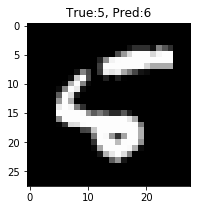

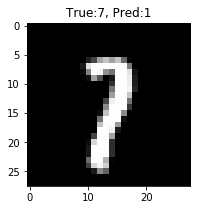

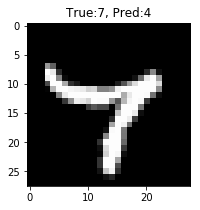

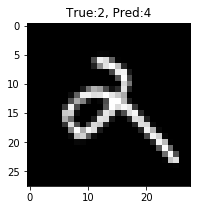

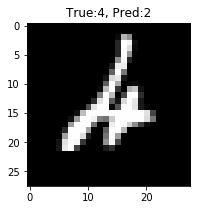

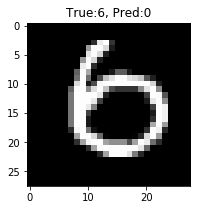

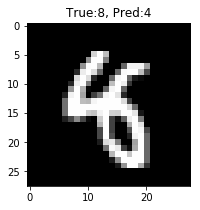

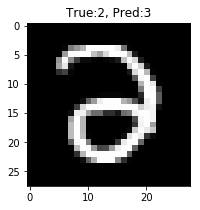

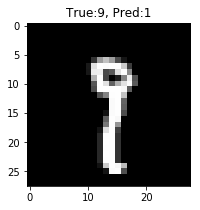

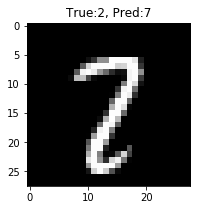

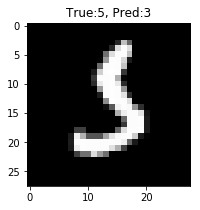

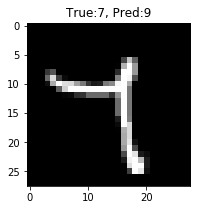

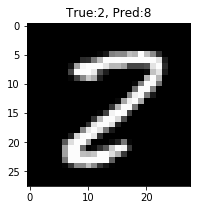

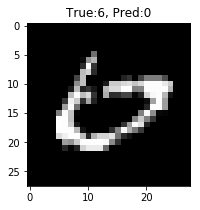

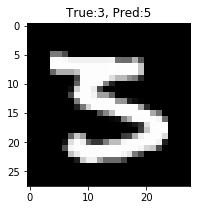

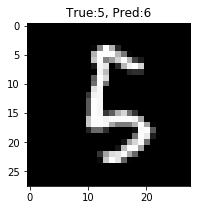

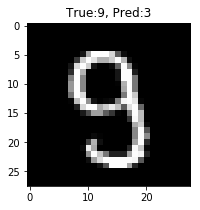

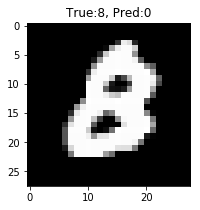

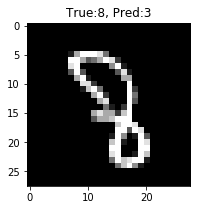

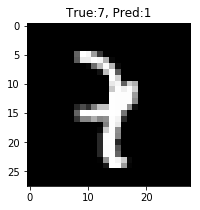

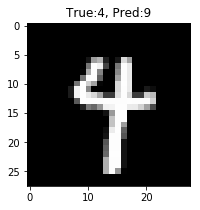

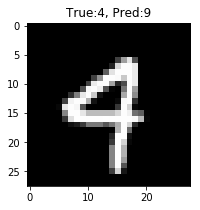

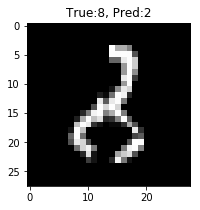

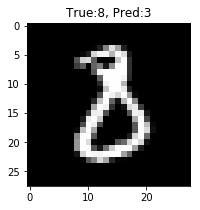

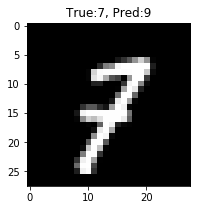

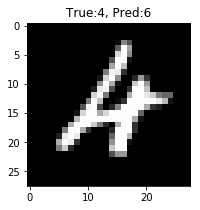

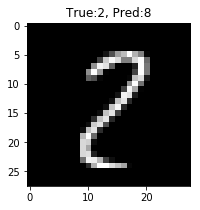

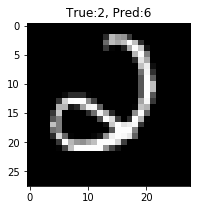

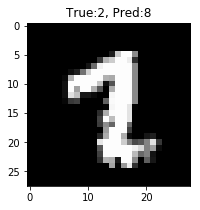

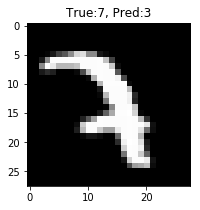

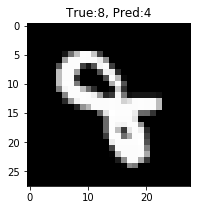

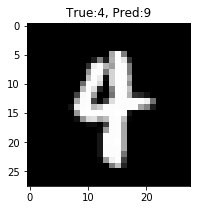

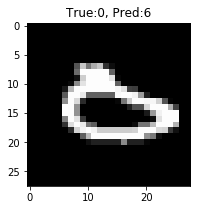

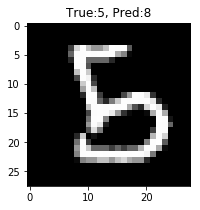

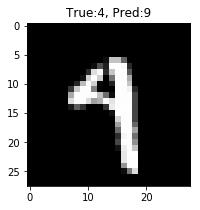

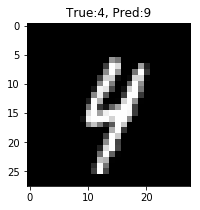

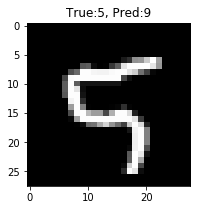

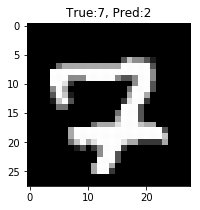

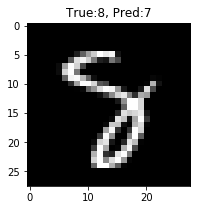

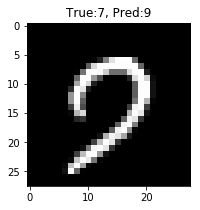

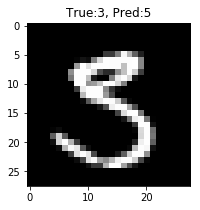

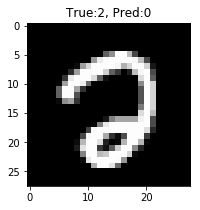

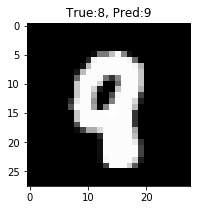

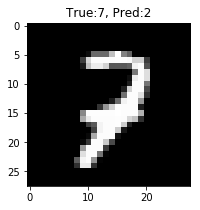

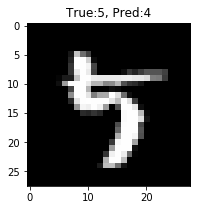

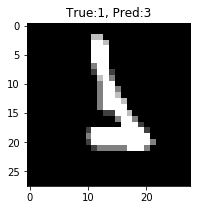

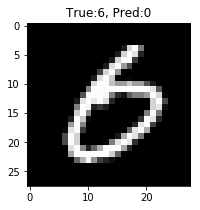

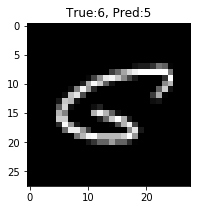

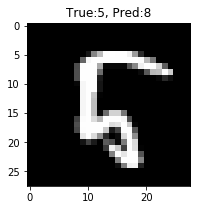

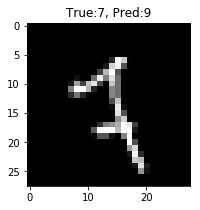

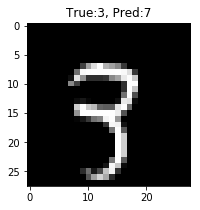

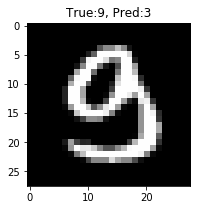

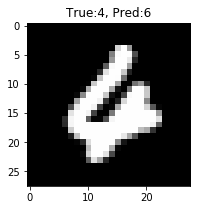

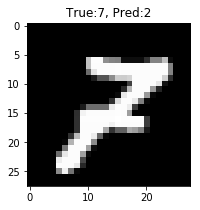

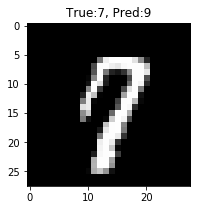

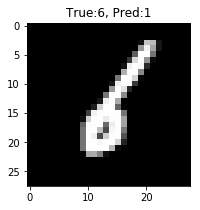

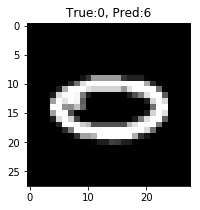

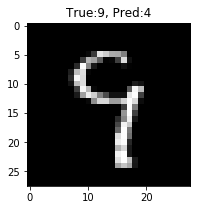

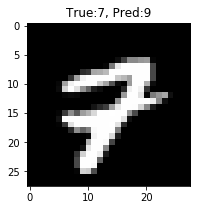

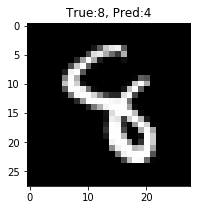

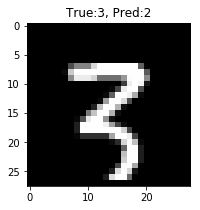

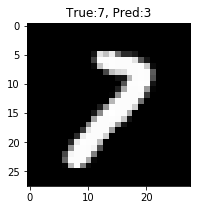

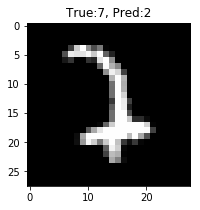

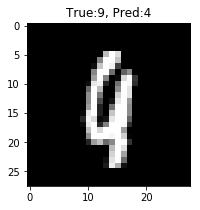

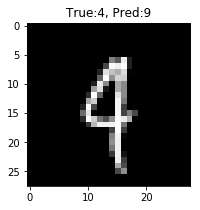

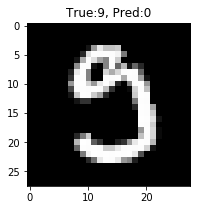

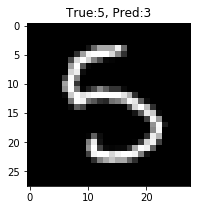

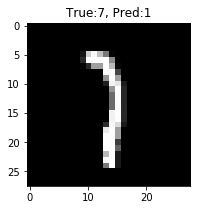

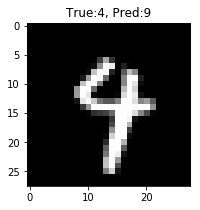

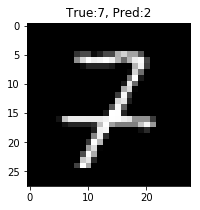

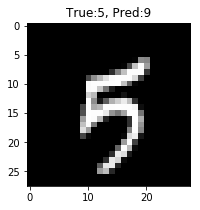

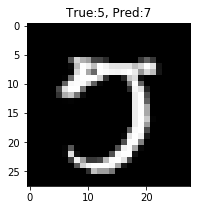

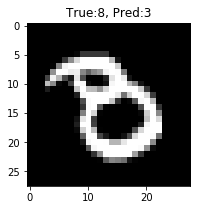

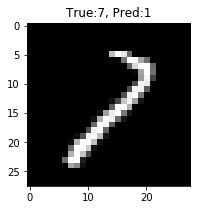

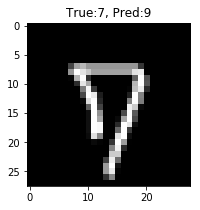

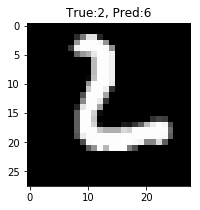

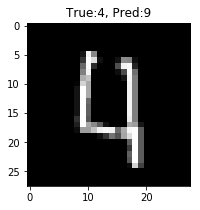

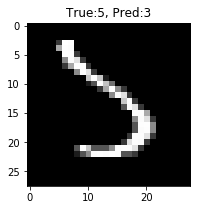

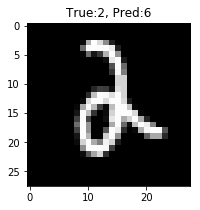

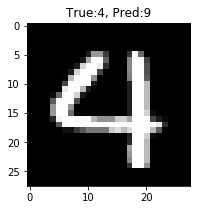

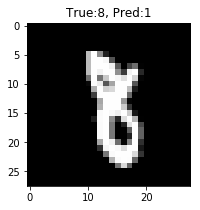

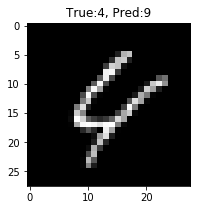

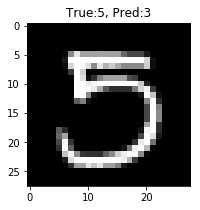

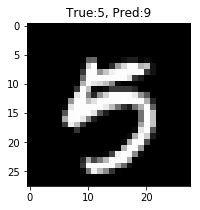

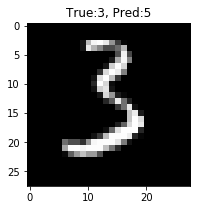

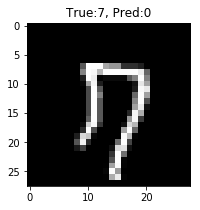

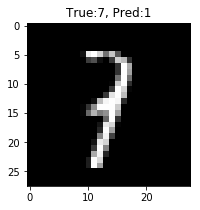

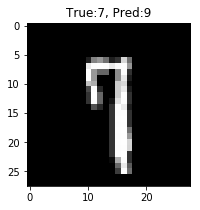

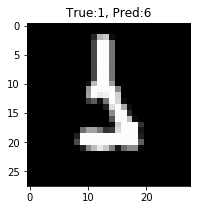

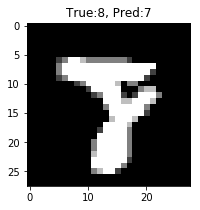

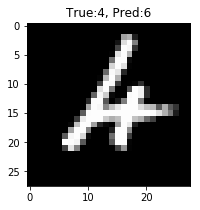

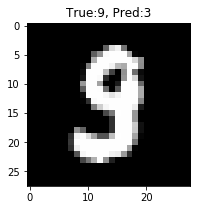

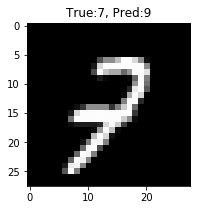

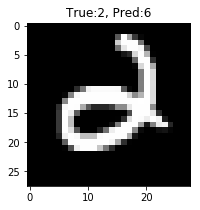

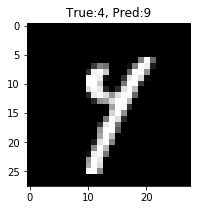

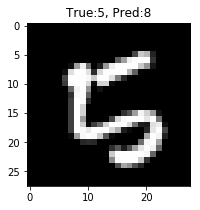

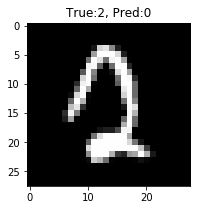

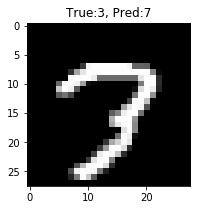

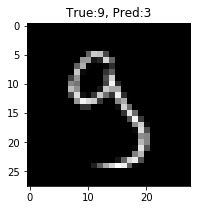

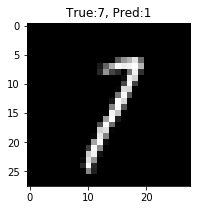

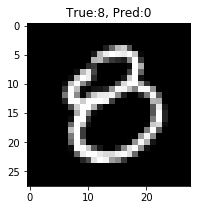

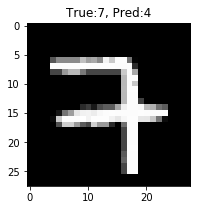

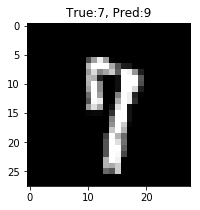

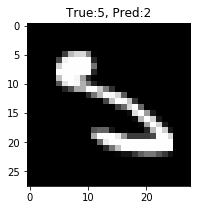

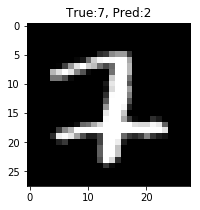

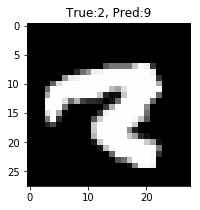

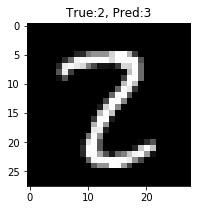

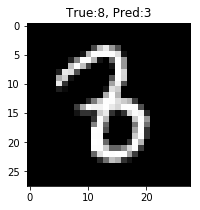

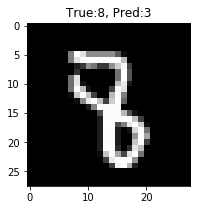

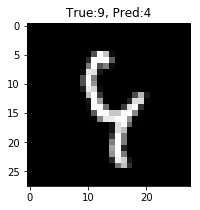

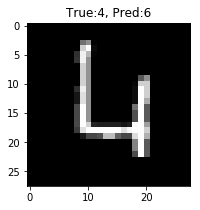

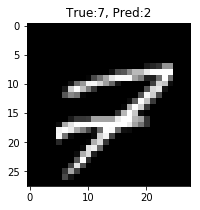

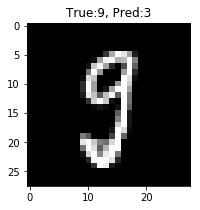

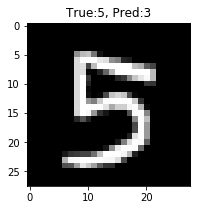

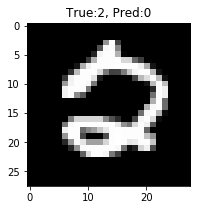

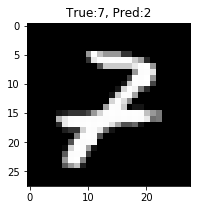

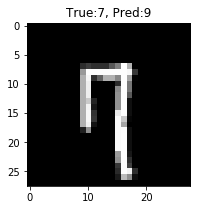

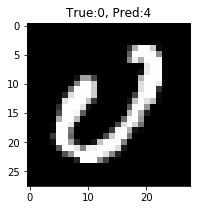

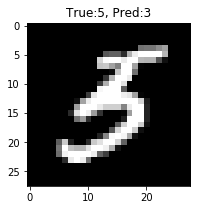

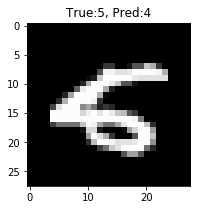

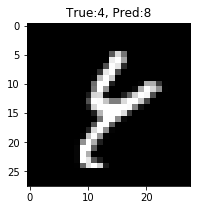

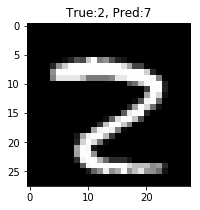

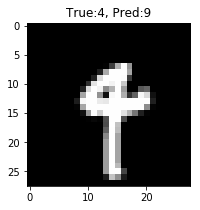

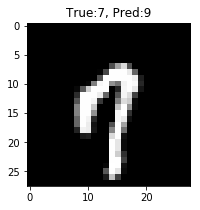

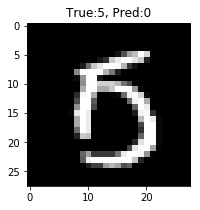

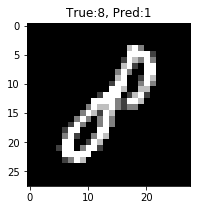

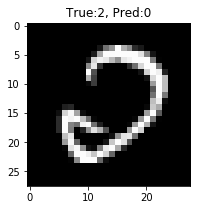

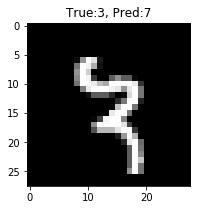

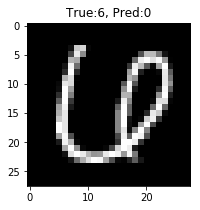

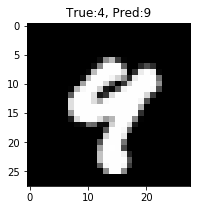

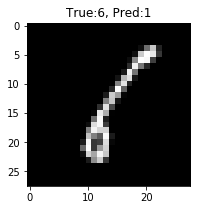

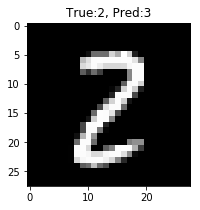

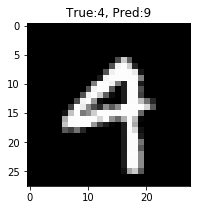

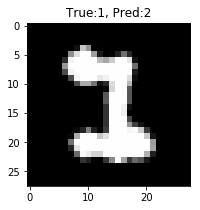

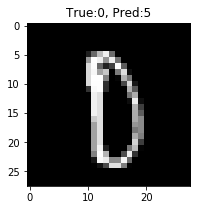

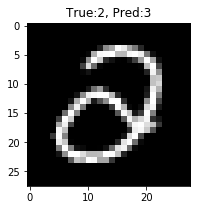

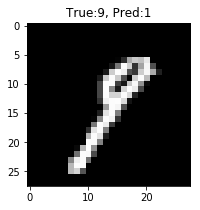

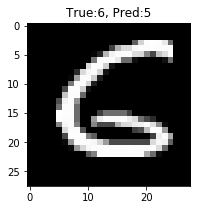

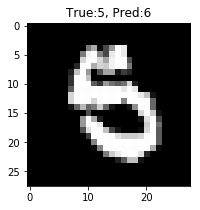

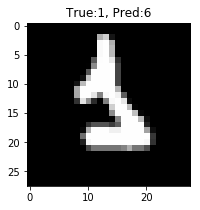

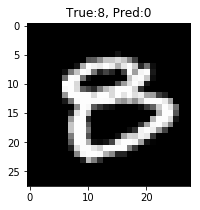

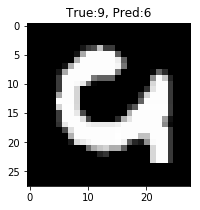

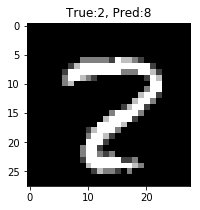

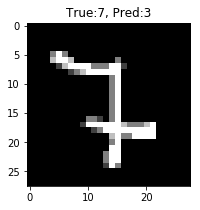

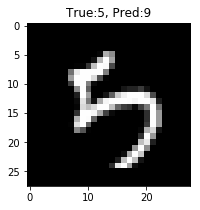

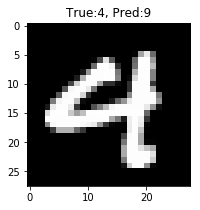

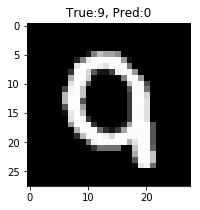

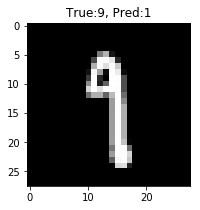

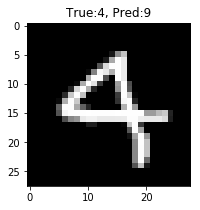

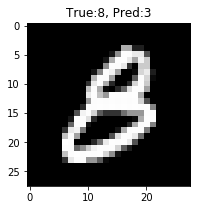

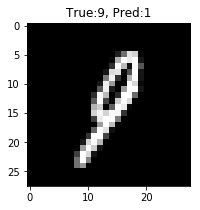

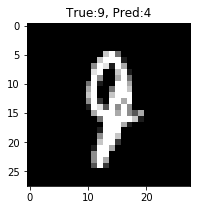

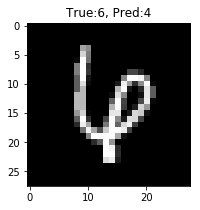

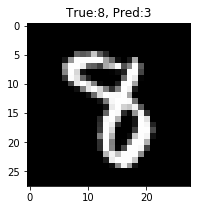

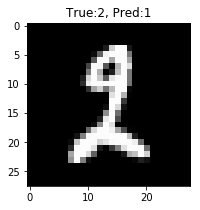

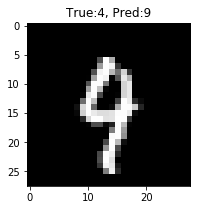

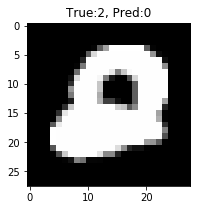

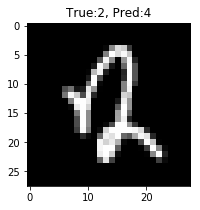

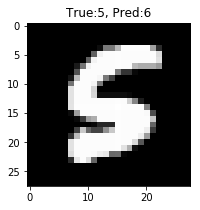

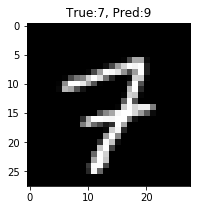

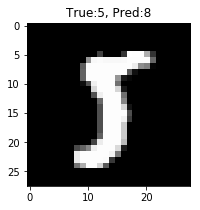

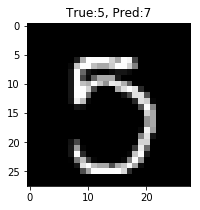

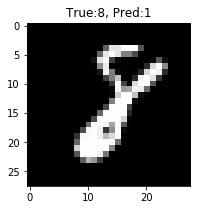

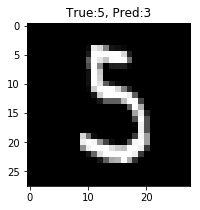

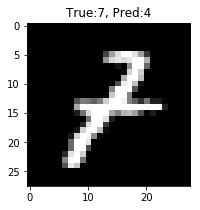

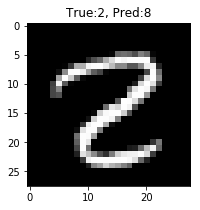

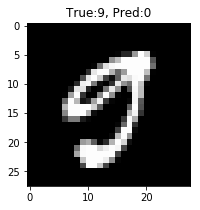

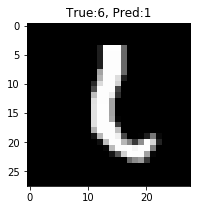

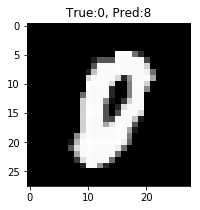

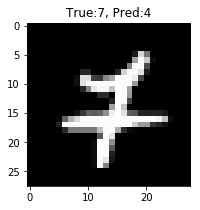

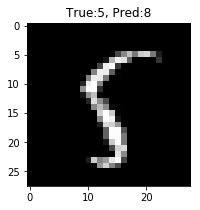

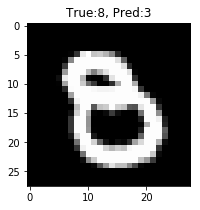

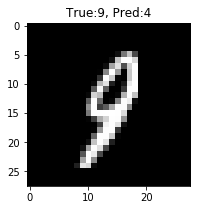

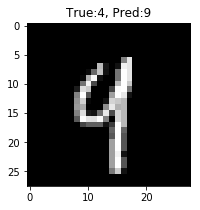

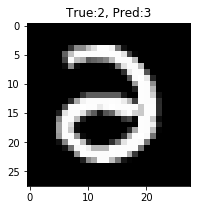

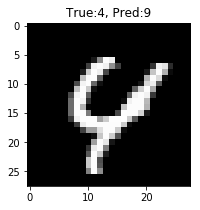

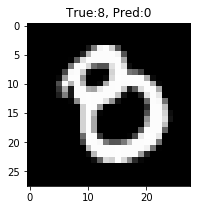

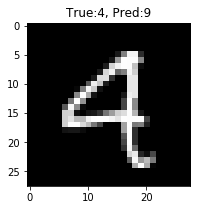

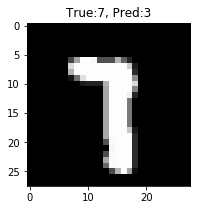

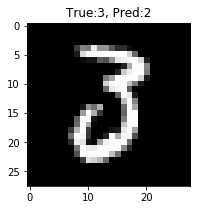

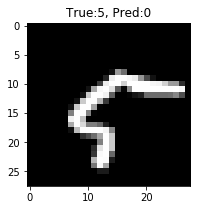

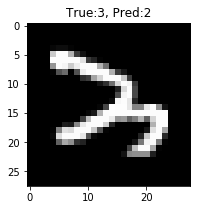

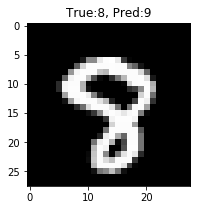

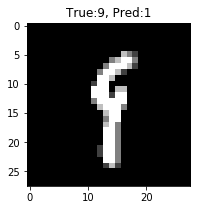

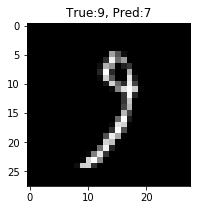

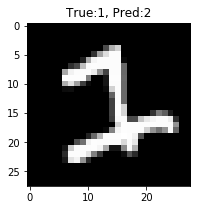

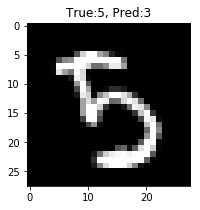

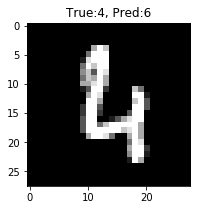

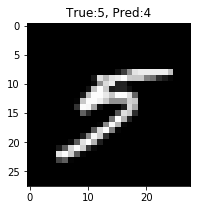

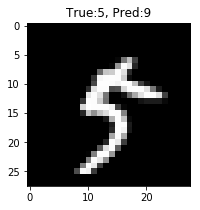

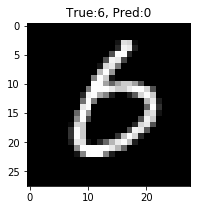

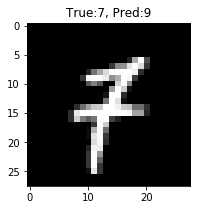

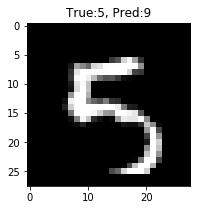

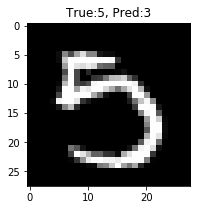

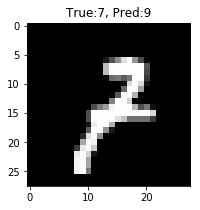

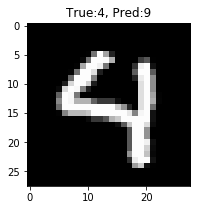

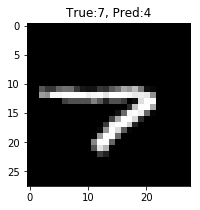

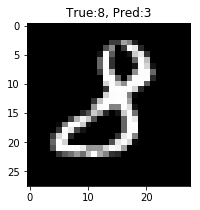

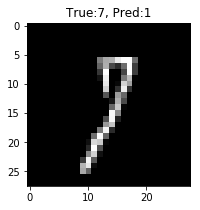

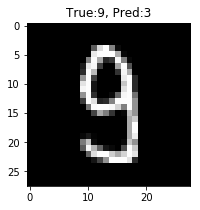

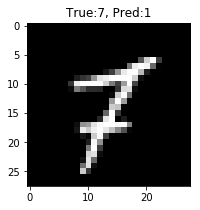

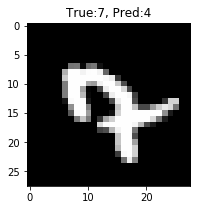

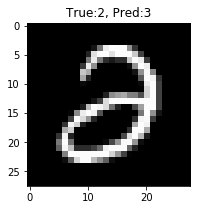

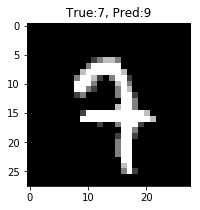

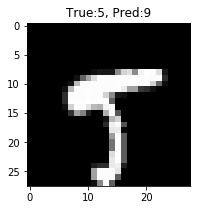

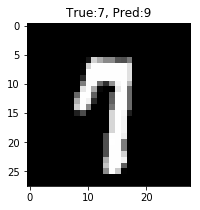

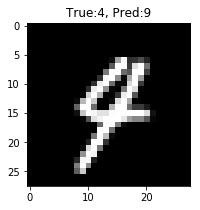

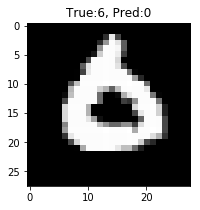

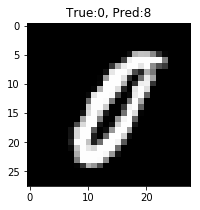

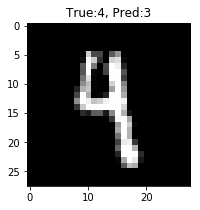

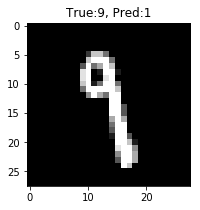

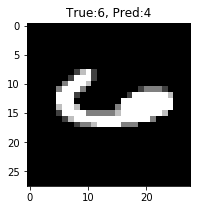

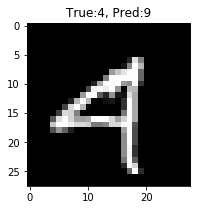

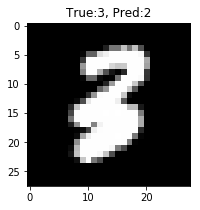

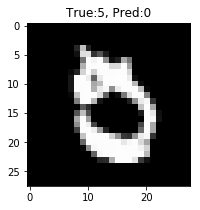

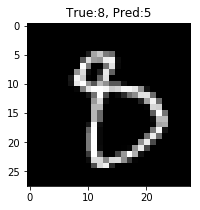

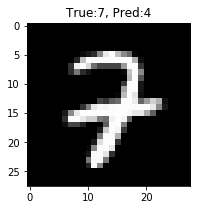

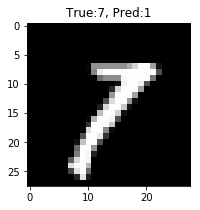

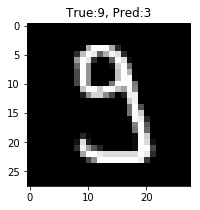

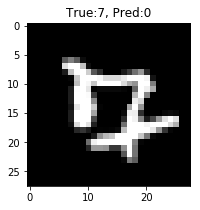

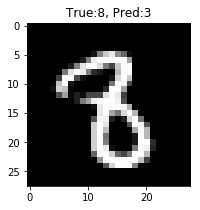

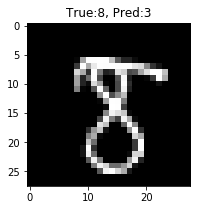

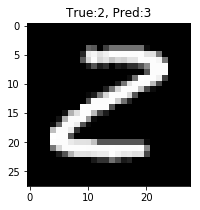

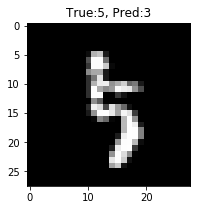

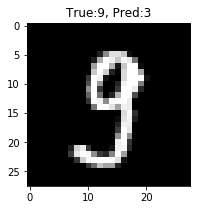

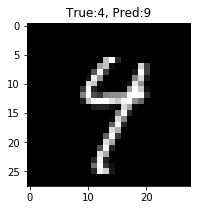

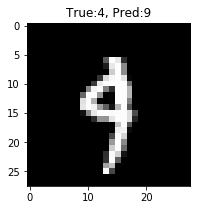

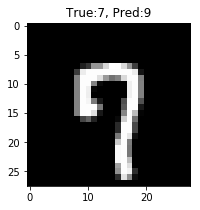

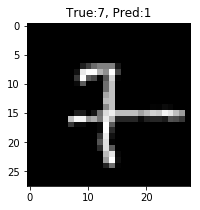

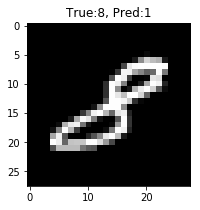

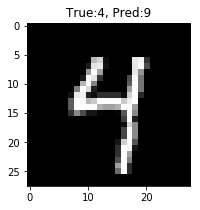

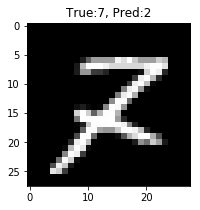

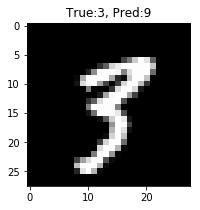

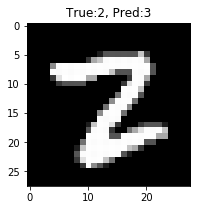

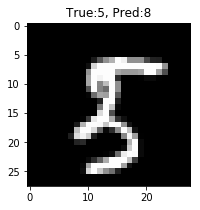

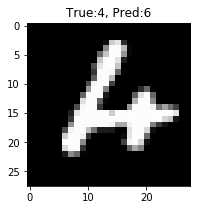

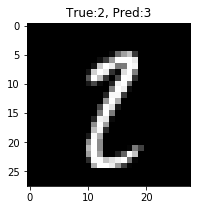

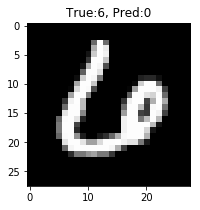

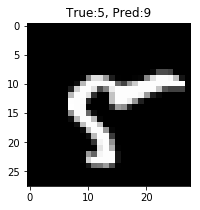

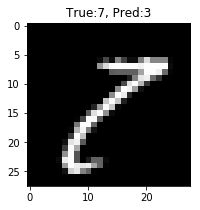

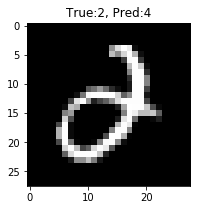

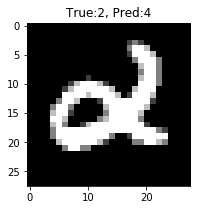

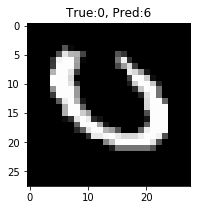

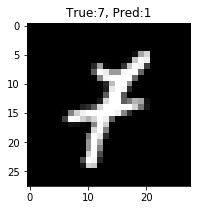

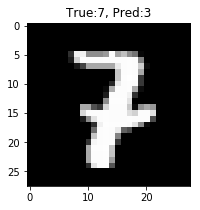

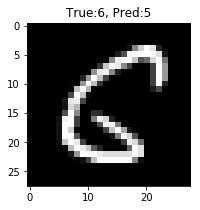

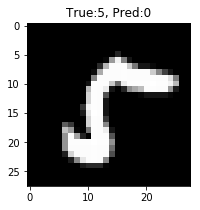

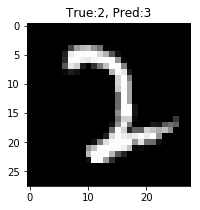

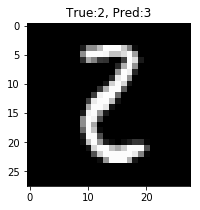

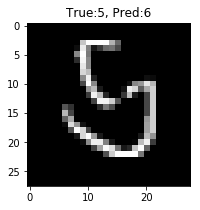

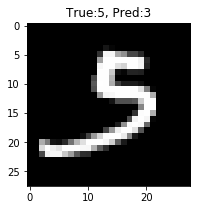

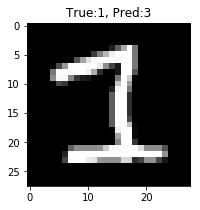

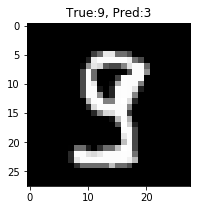

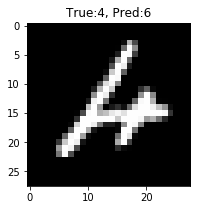

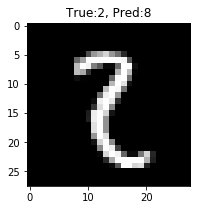

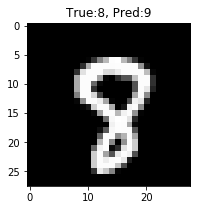

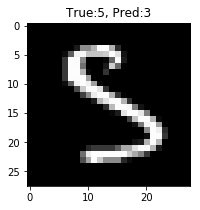

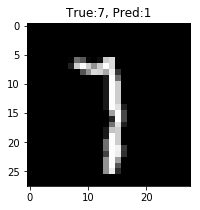

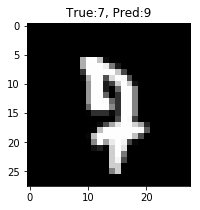

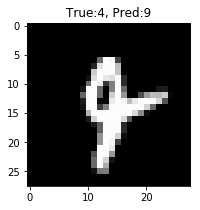

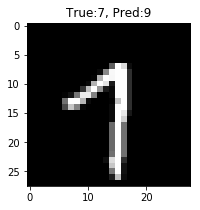

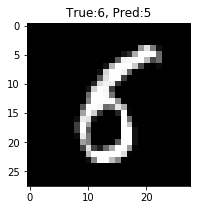

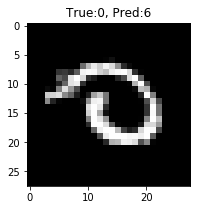

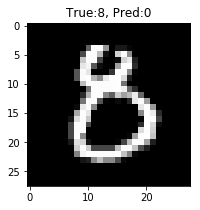

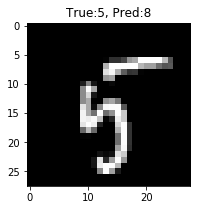

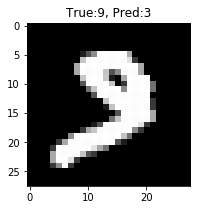

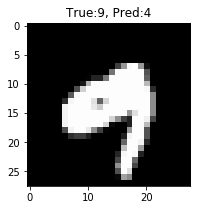

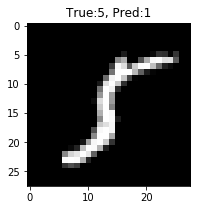

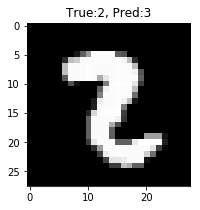

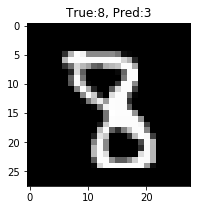

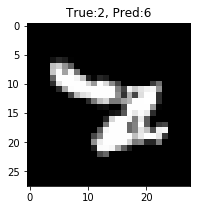

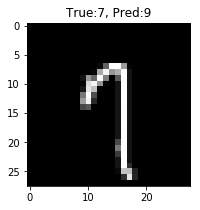

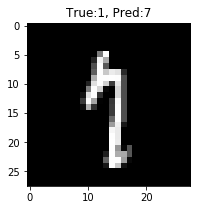

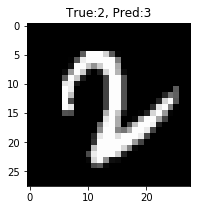

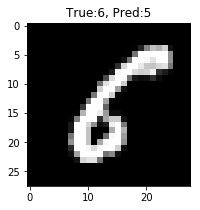

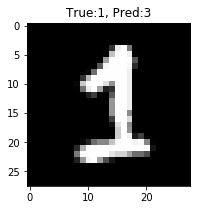

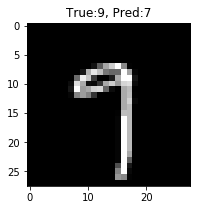

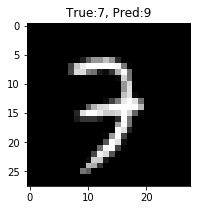

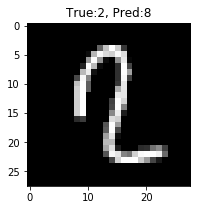

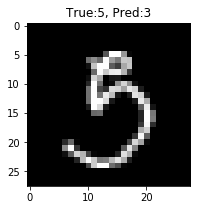

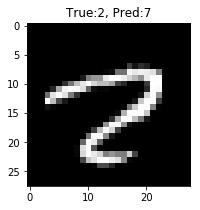

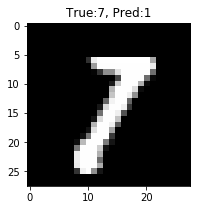

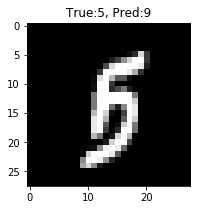

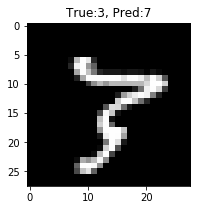

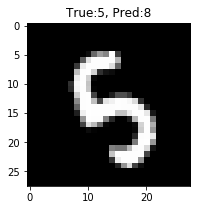

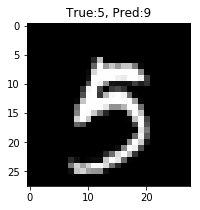

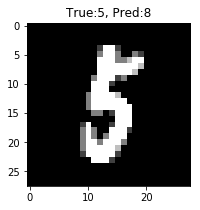

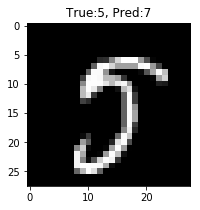

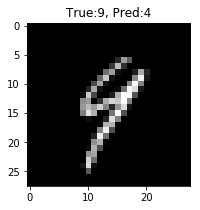

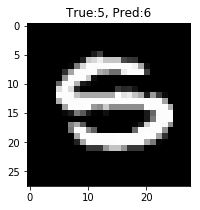

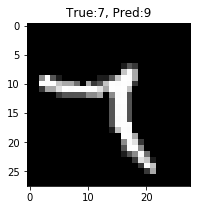

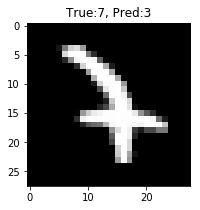

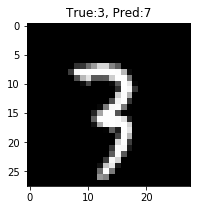

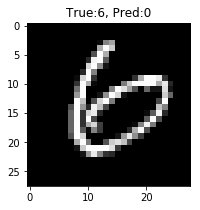

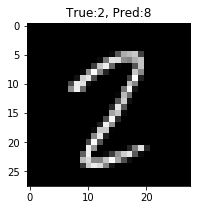

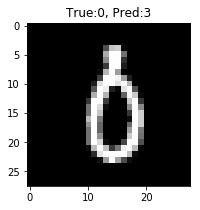

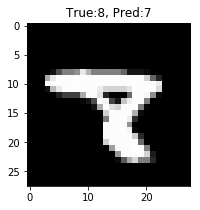

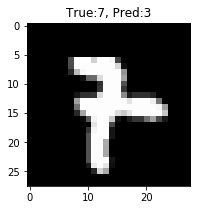

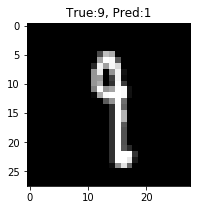

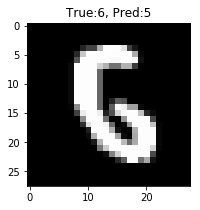

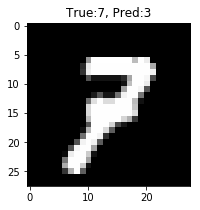

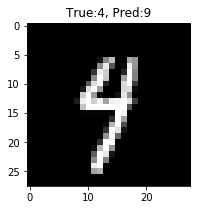

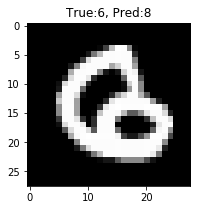

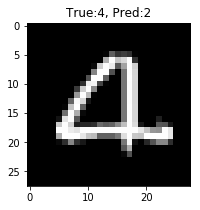

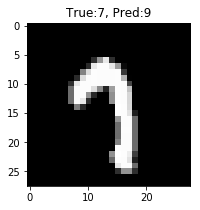

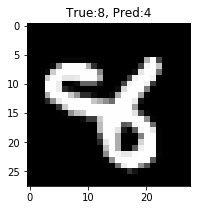

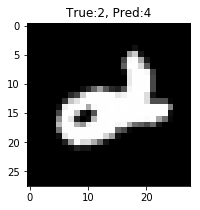

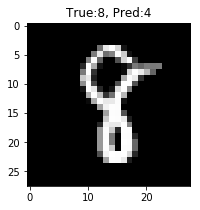

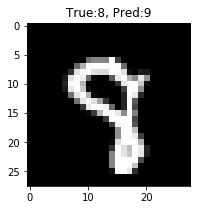

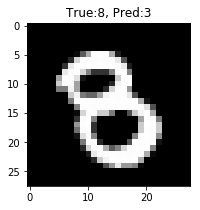

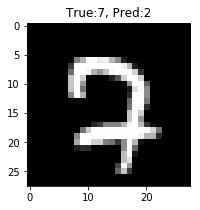

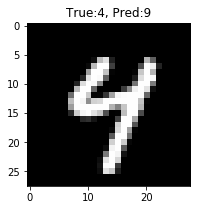

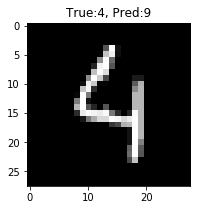

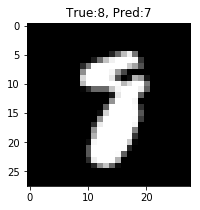

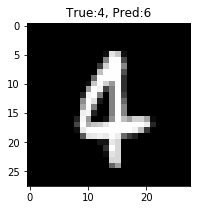

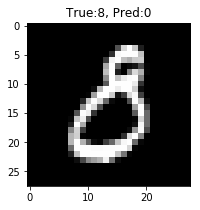

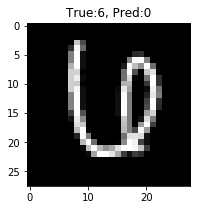

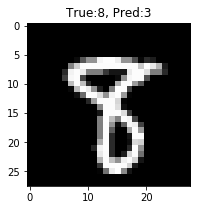

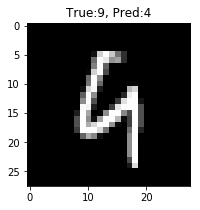

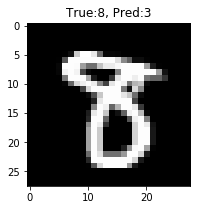

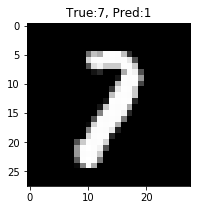

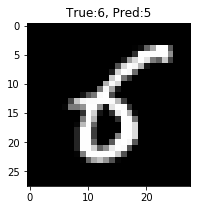

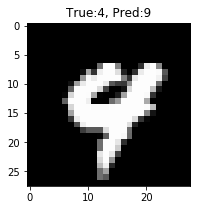

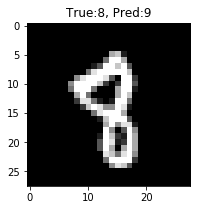

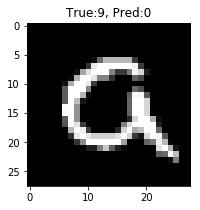

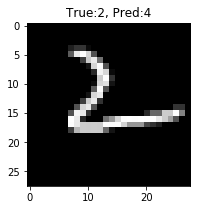

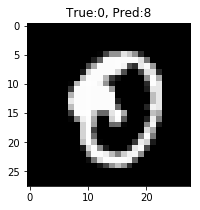

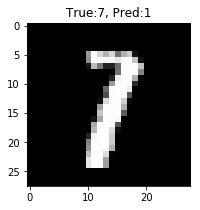

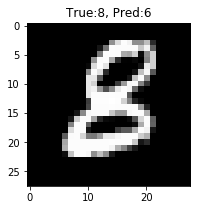

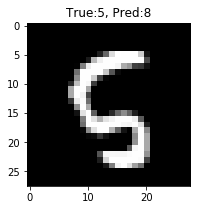

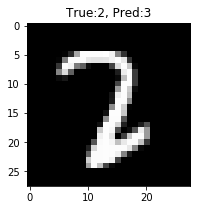

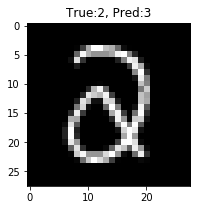

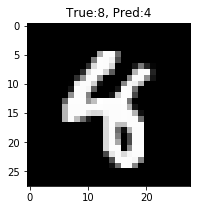

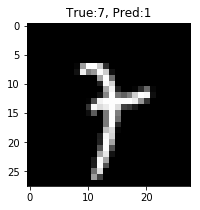

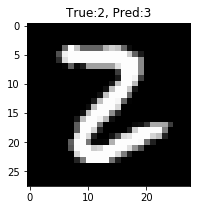

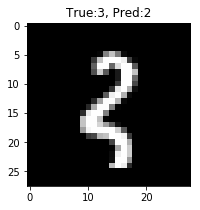

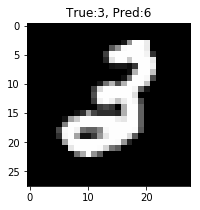

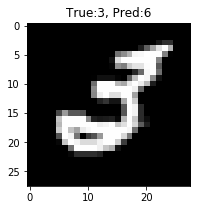

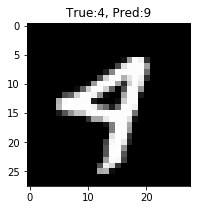

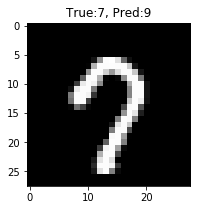

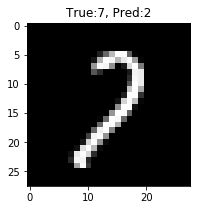

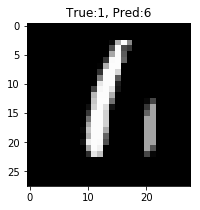

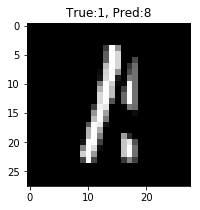

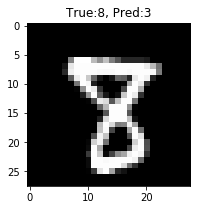

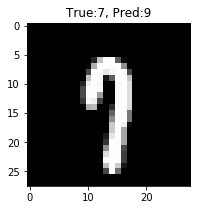

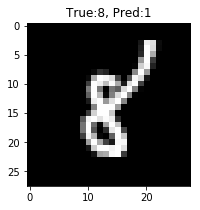

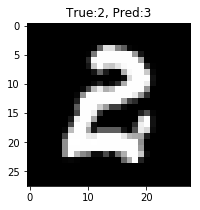

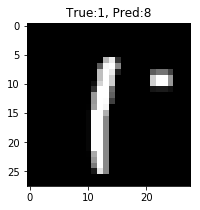

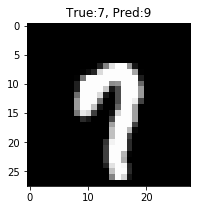

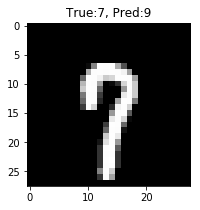

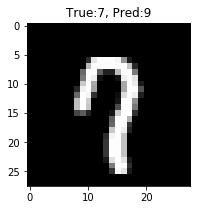

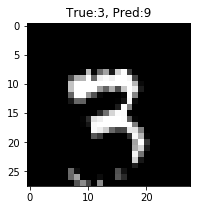

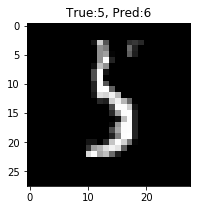

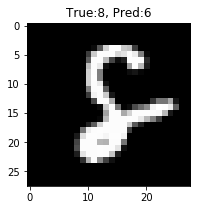

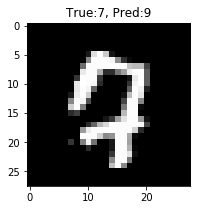

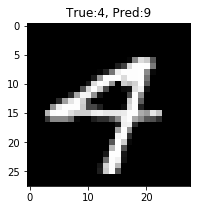

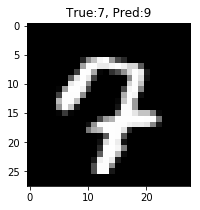

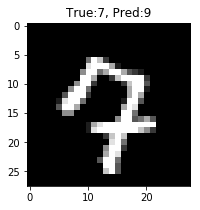

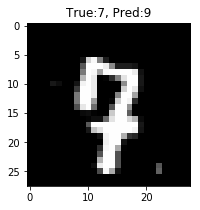

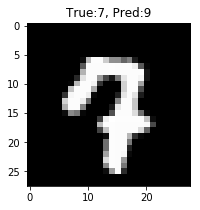

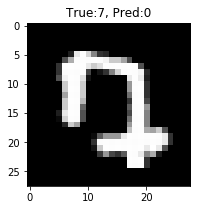

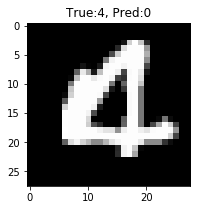

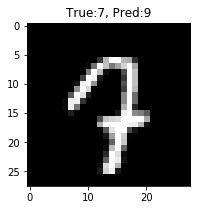

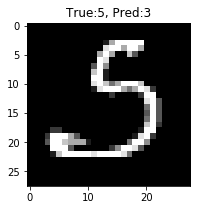

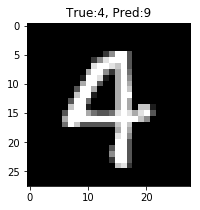

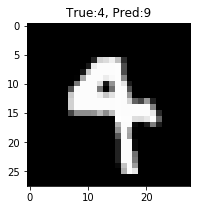

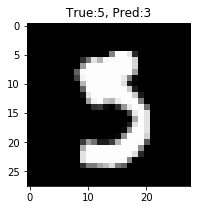

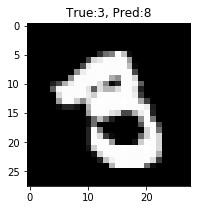

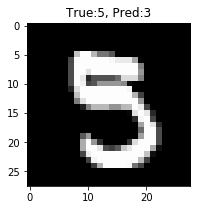

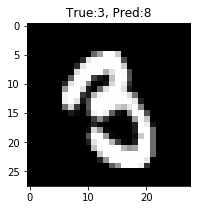

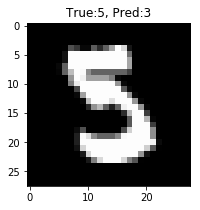

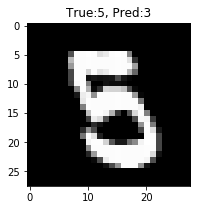

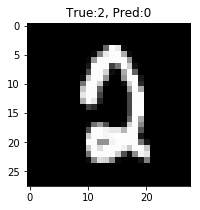

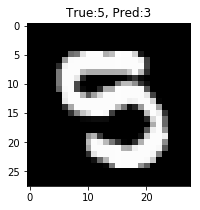

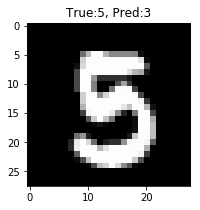

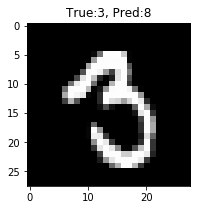

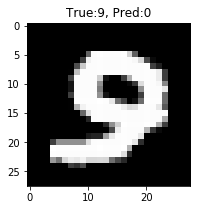

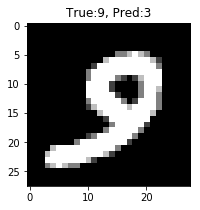

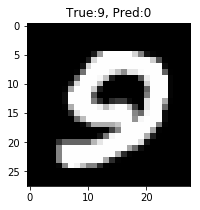

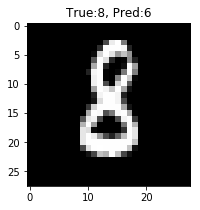

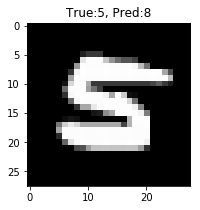

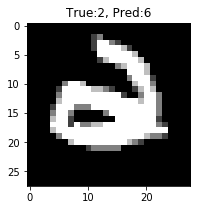

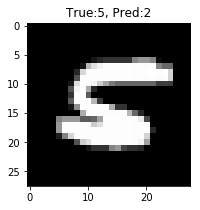

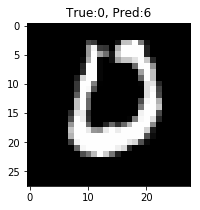

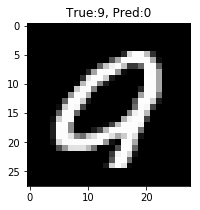

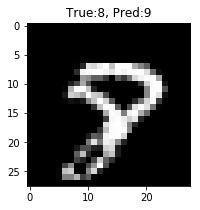

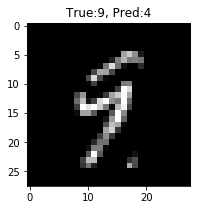

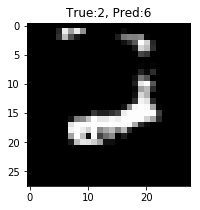

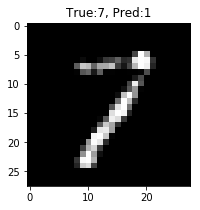

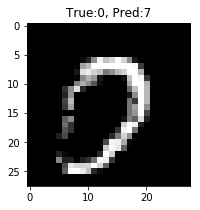

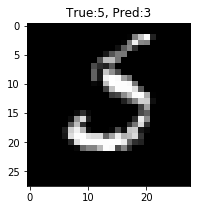

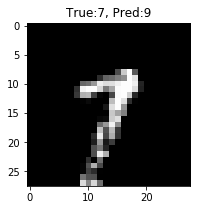

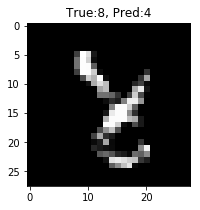

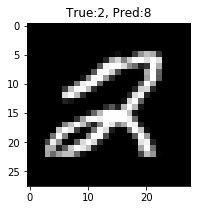

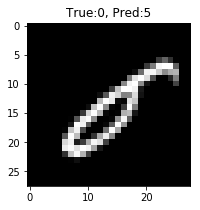

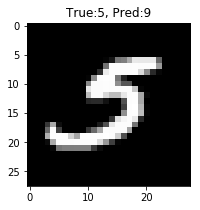

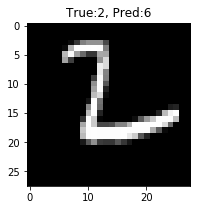

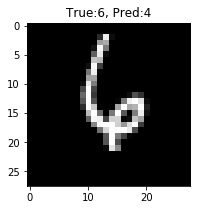

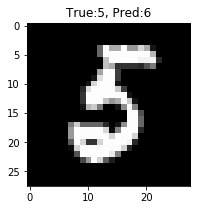

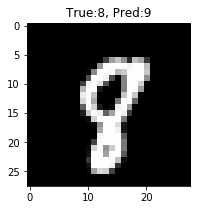

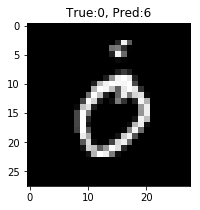

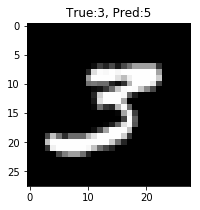

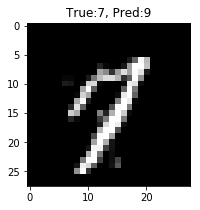

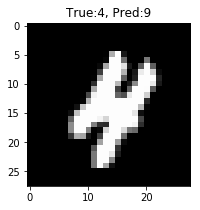

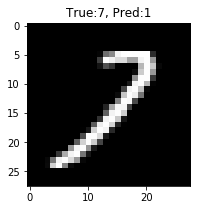

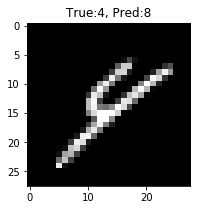

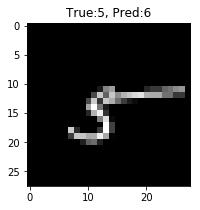

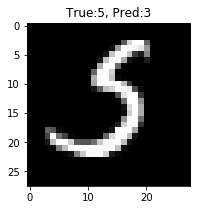

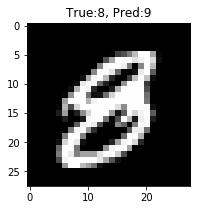

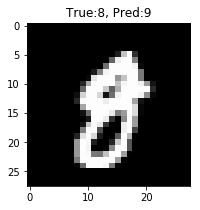

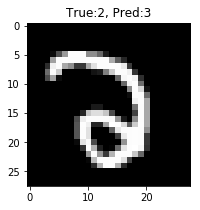

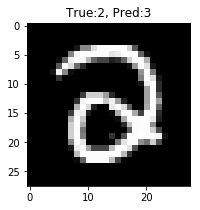

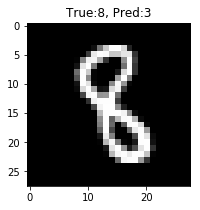

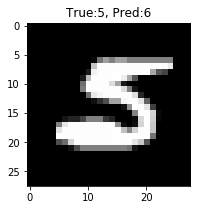

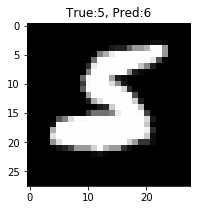

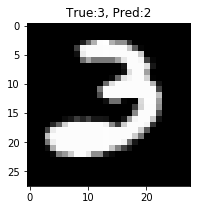

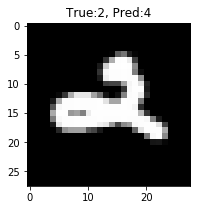

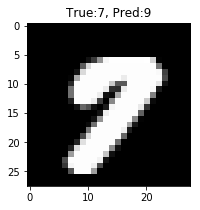

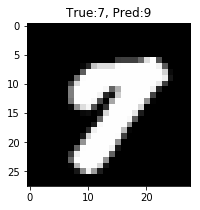

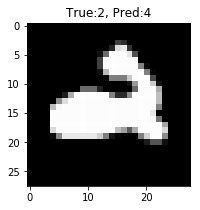

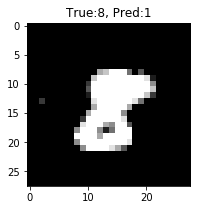

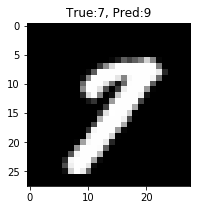

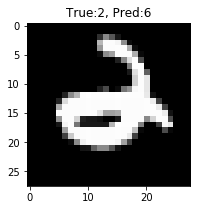

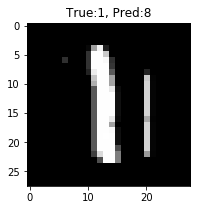

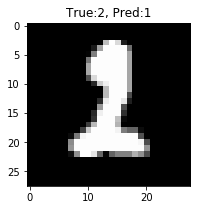

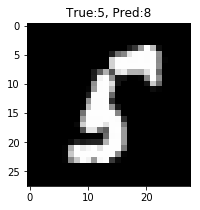

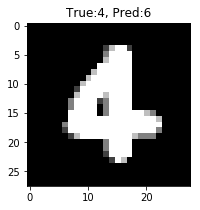

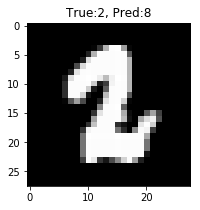

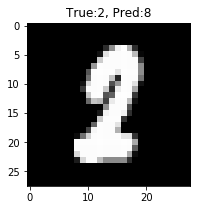

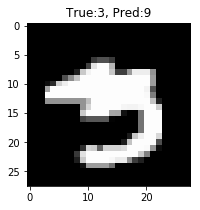

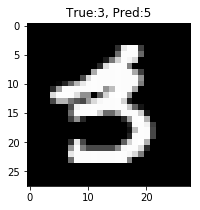

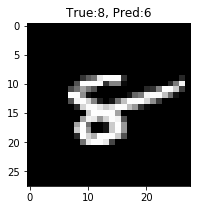

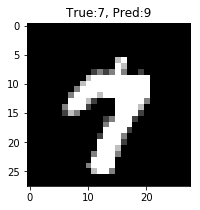

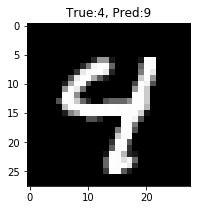

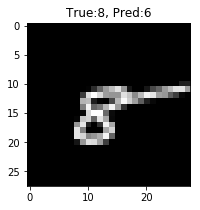

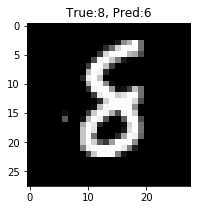

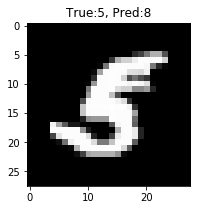

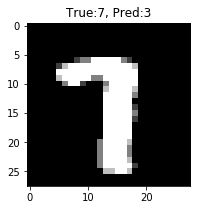

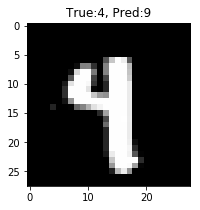

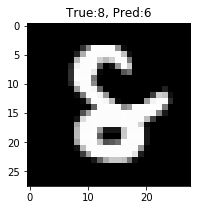

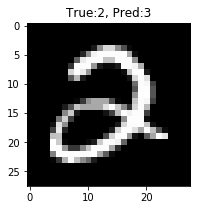

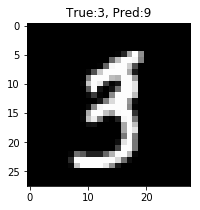

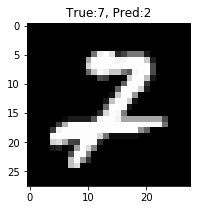

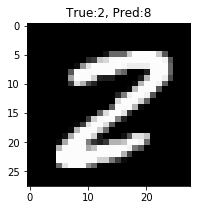

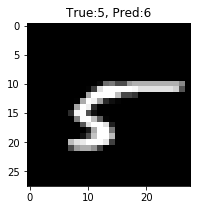

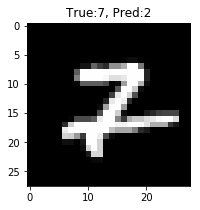

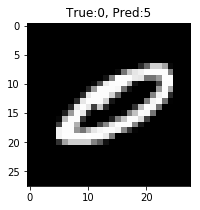

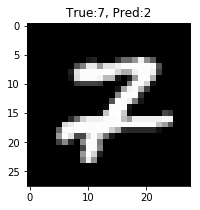

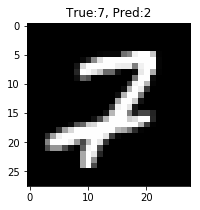

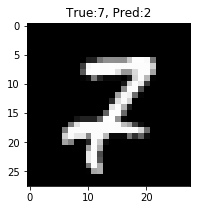

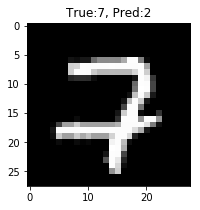

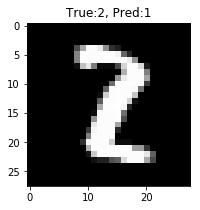

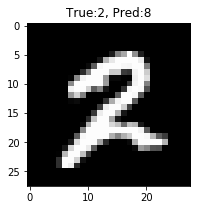

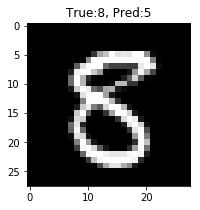

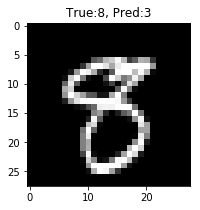

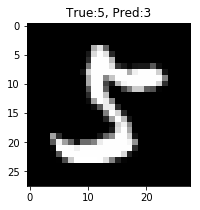

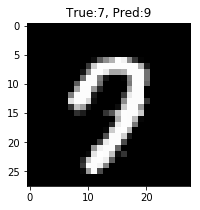

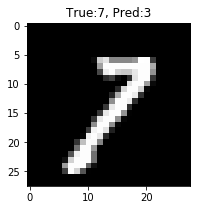

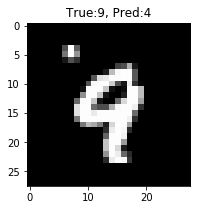

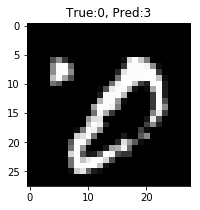

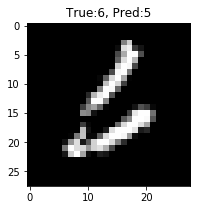

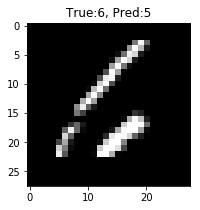

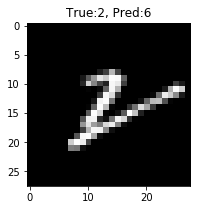

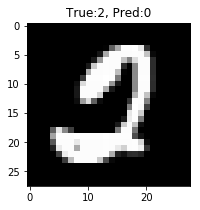

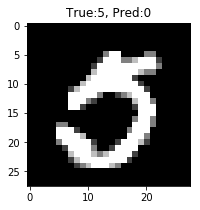

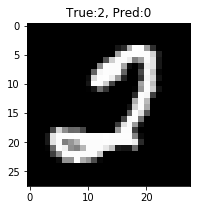

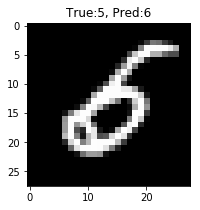

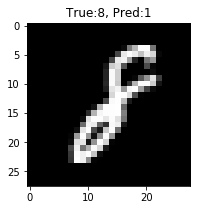

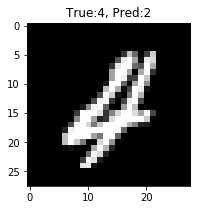

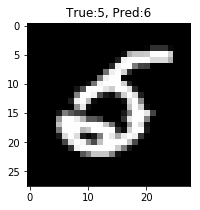

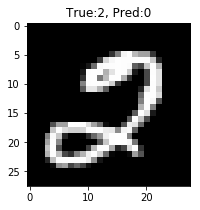

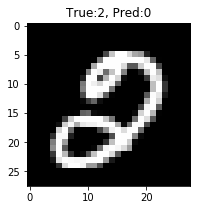

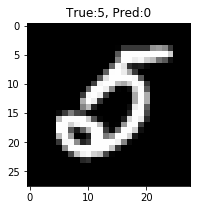

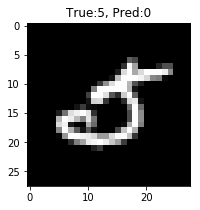

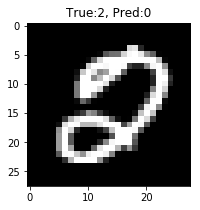

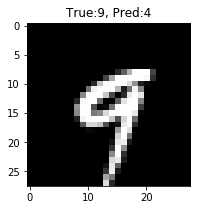

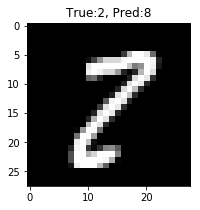

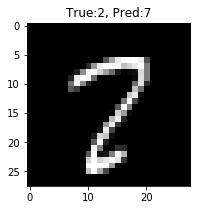

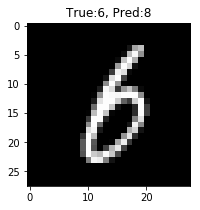

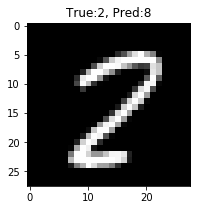

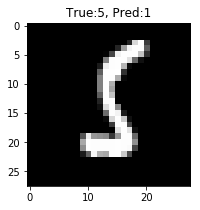

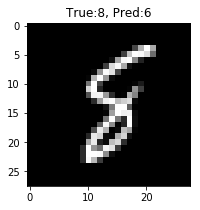

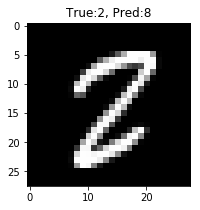

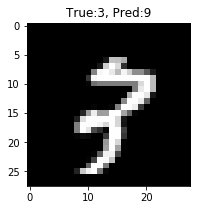

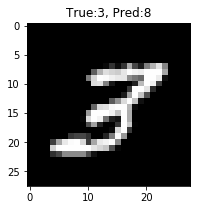

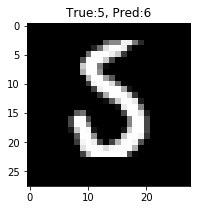

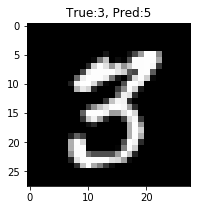

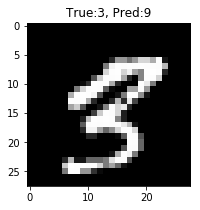

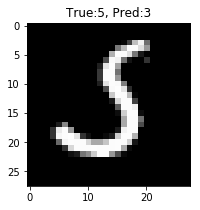

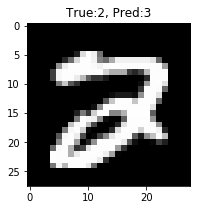

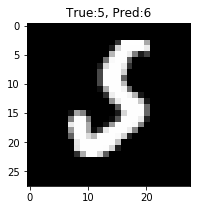

0.9509


In [186]:
# print(mnist_network.query(x_test[0].reshape(28*28,1)).shape)
import matplotlib.pyplot as plt
%matplotlib inline
error_num = 0
for i in range(0,x_test.shape[0]):
    pred = np.argmax(mnist_network.query(x_test[i].reshape(28*28,1)))
    if pred-y_test[i] != 0:
        #print(np.argmax(mnist_network.query(x_test[i].reshape(28*28,1))),y_test[i],sep = ' ')
        error_num = error_num+1
        plt.figure(figsize=(3, 3))
        plt.imshow(x_test[i], cmap='gray')
        plt.title("True:{}, Pred:{}".format(y_test[i], pred))
        
plt.show()
print(1-error_num/x_test.shape[0])